# _R for Data Science_ 1
Wickham, Hadley; Mine Çetinkaya-Rundel; & Garrett Grolemund. _R for Data Science: Import, Tidy, Transform, Visualize, and Model Data_. 1st Ed. O'Reilly. [Home](https://r4ds.had.co.nz/).

---

```{admonition} Revised
08 Jun 2023
```
```{contents}
```

---

## Programming Environment

In [7]:
packages <- c(
  'hexbin',       # library(hexbin)
  'lubridate',    # library(lubridate)
  'maps',         # library(maps)
  'modelr',       # library(modelr)
  'mosaic',       # library(mosaic)
  'mosaicData',   # library(mosaicData)
  'nycflights13', # library(nycflights13)
  'pryr',         # library(pryr)
  'purrr',        # library(purrr)
  'tidyverse',    # library(tidyverse)
  'RcppRoll'      # library(RcppRoll)
)

# Install packages not yet installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages])
}

# Load packages
invisible(lapply(packages, library, character.only = TRUE))

str_c('EXECUTED : ', now())
sessionInfo()
# R.version.string # R.Version()
# .libPaths()
# installed.packages()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.


Attaching package: ‘mosaic’


The following objects are masked from ‘package:dplyr’:

    count, do, tally


The following object is masked from ‘package:Matrix’:

    mean


The following object is masked from ‘package:ggplot2’:

    stat


The following object is masked from ‘package:modelr’:

    resample


The following objects are masked from ‘package:stats’:

    binom.test, cor, cor.test, cov, fivenum, IQR, median, prop.test,
    quantile, sd, t.test, var


The following objects are masked from ‘package:base’:

    max, mean, min, prod, range, samp

[1] "EXECUTED : 2023-06-21 13:37:27.471954"

R version 4.3.0 (2023-04-21)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Ventura 13.3.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] RcppRoll_0.3.0     forcats_1.0.0      stringr_1.5.0      readr_2.1.4       
 [5] tidyr_1.3.0        tibble_3.2.1       tidyverse_2.0.0    purrr_1.0.1       
 [9] pryr_0.1.6         nycflights13_1.0.2 mosaic_1.8.4.2     mosaicData_0.20.3 
[13] ggformula_0.10.4   dplyr_1.1.2        Matrix_1.5-4       ggplot2_3.4.2     
[17] lattice_0.21-8     modelr_0.1.11      maps_3.4.1         lubridate_1.9.2   
[21]

---

## 03 - Data Visualization

In [2]:
head(x = mpg, n = 5)

manufacturer model displ year cyl trans      drv cty hwy fl class  
1 audi         a4    1.8   1999 4   auto(l5)   f   18  29  p  compact
2 audi         a4    1.8   1999 4   manual(m5) f   21  29  p  compact
3 audi         a4    2.0   2008 4   manual(m6) f   20  31  p  compact
4 audi         a4    2.0   2008 4   auto(av)   f   21  30  p  compact
5 audi         a4    2.8   1999 6   auto(l5)   f   16  26  p  compact

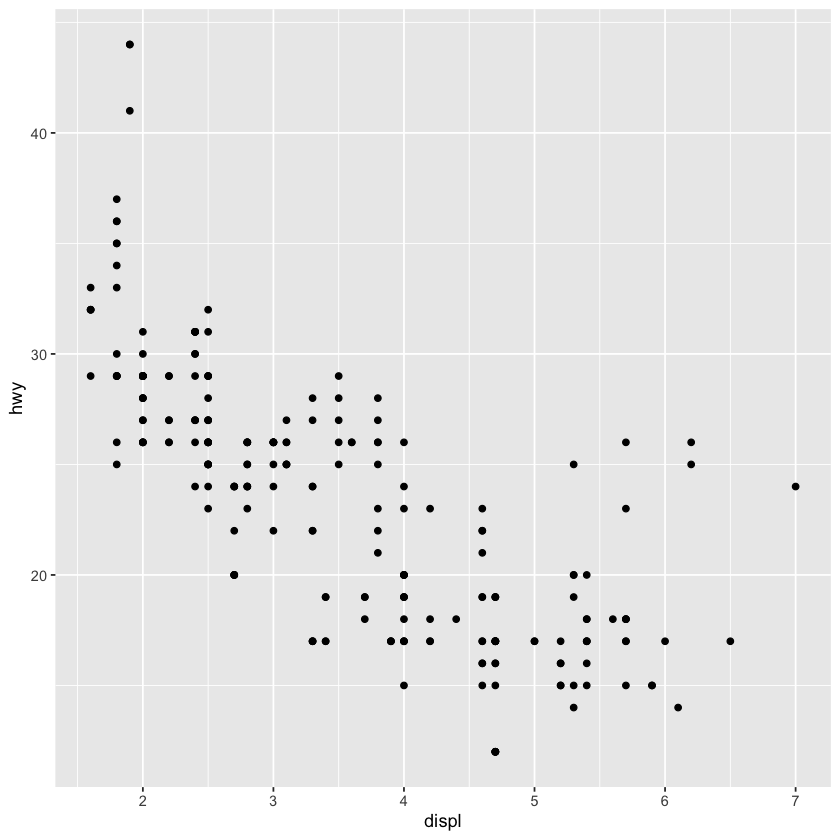

Warning message:
“Using size for a discrete variable is not advised.”


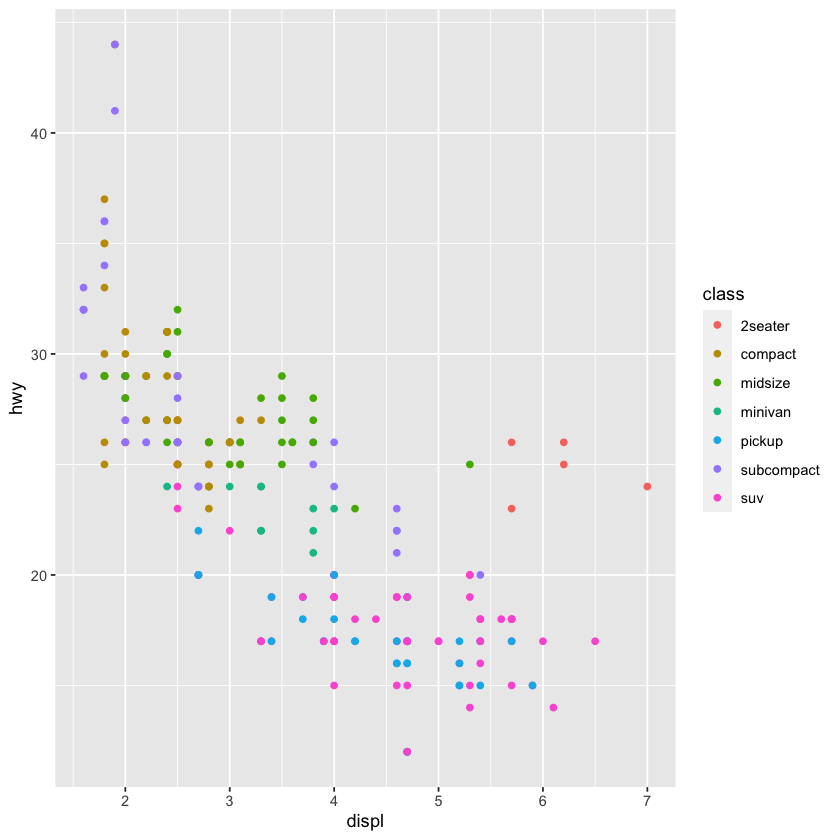

Warning message:
“Using alpha for a discrete variable is not advised.”


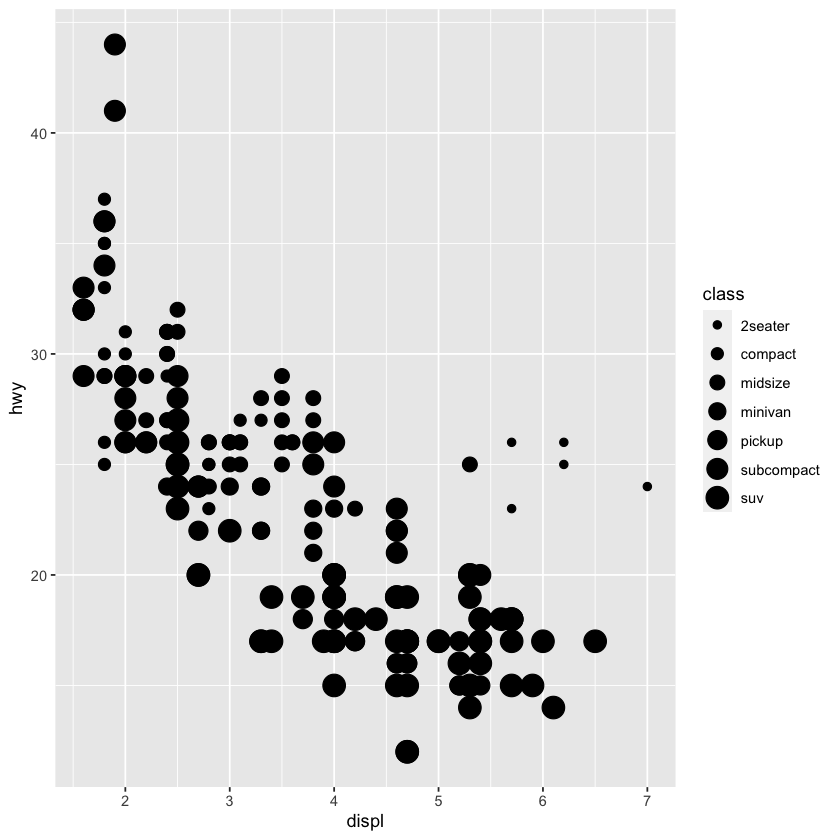

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 62 rows containing missing values (`geom_point()`).”


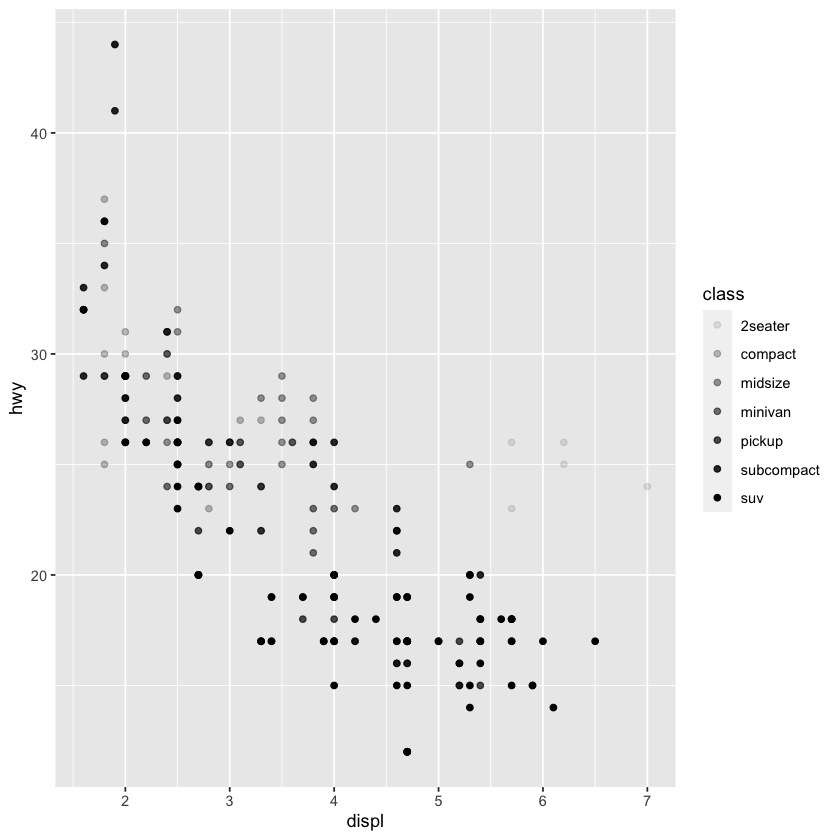

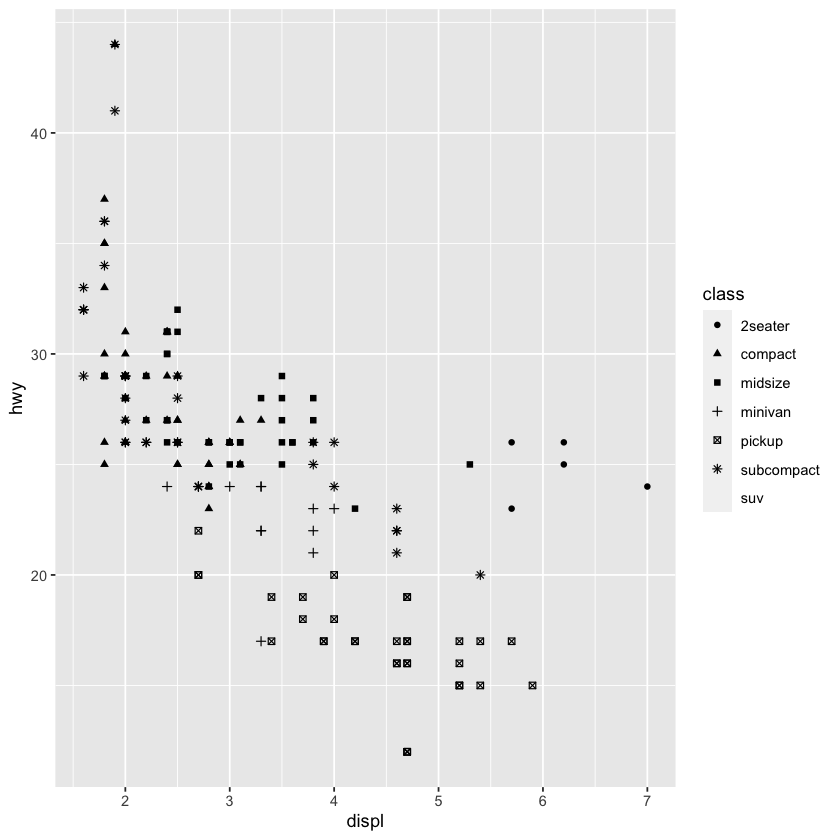

In [4]:
ggplot(data=mpg) +
  geom_point(mapping=aes(x=displ,y=hwy))
ggplot(data=mpg) +
  geom_point(mapping=aes(x=displ,y=hwy,color=class))
ggplot(data=mpg) +
  geom_point(mapping=aes(x=displ,y=hwy,size=class))
ggplot(data=mpg) +
  geom_point(mapping=aes(x=displ,y=hwy,alpha=class))
ggplot(data=mpg) +
  geom_point(mapping=aes(x=displ,y=hwy,shape=class))

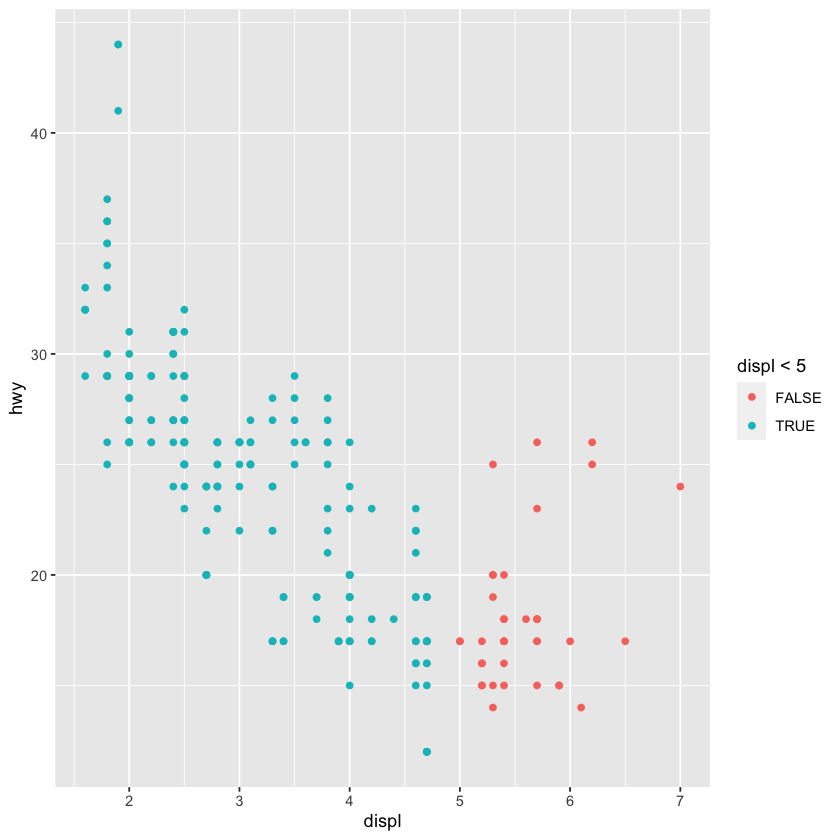

In [6]:
ggplot2::mpg %>%
  ggplot() +
    geom_point(mapping=aes(x=displ, y=hwy, color=displ<5))

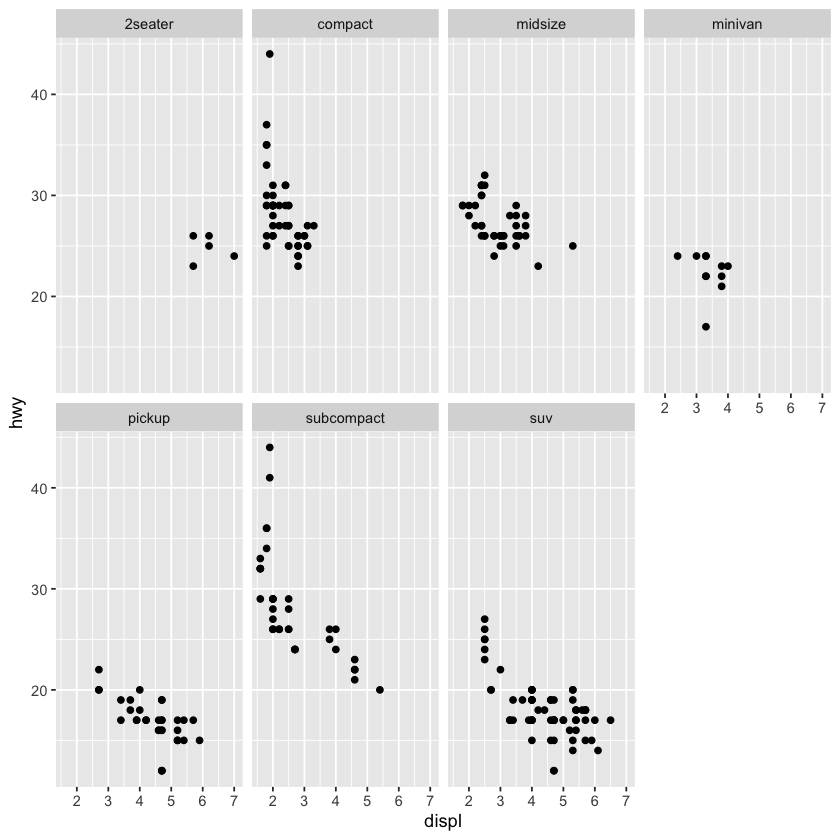

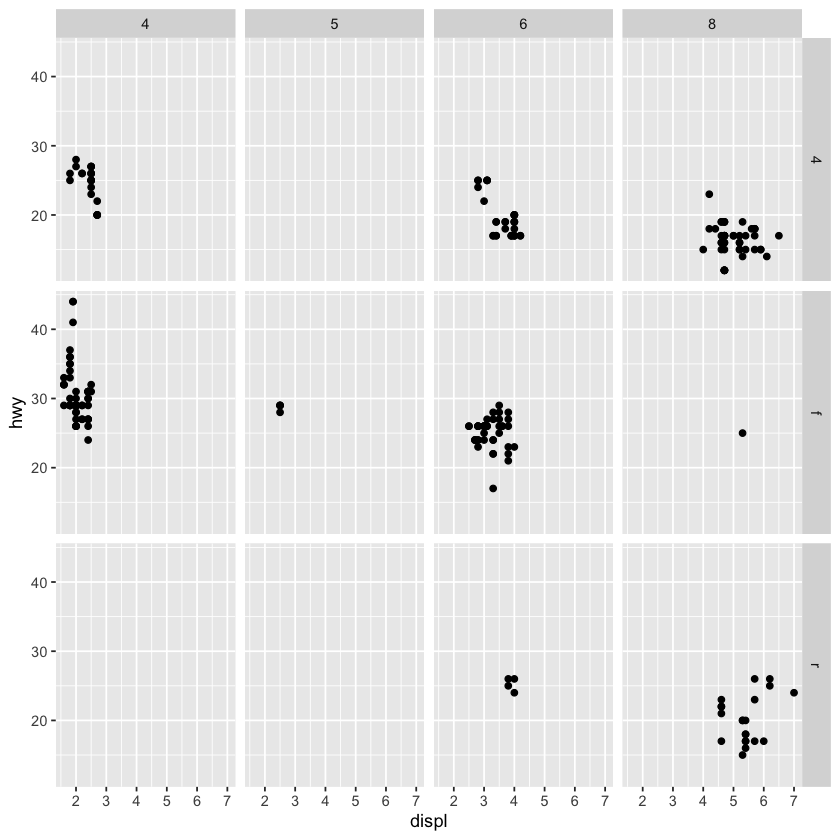

In [7]:
ggplot2::mpg %>%
  ggplot() +
    geom_point(mapping = aes(x = displ, y = hwy)) +
    facet_wrap(~ class, nrow=2)
ggplot2::mpg %>%
  ggplot() +
    geom_point(mapping = aes(x = displ, y = hwy)) +
    facet_grid(drv ~ cyl)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


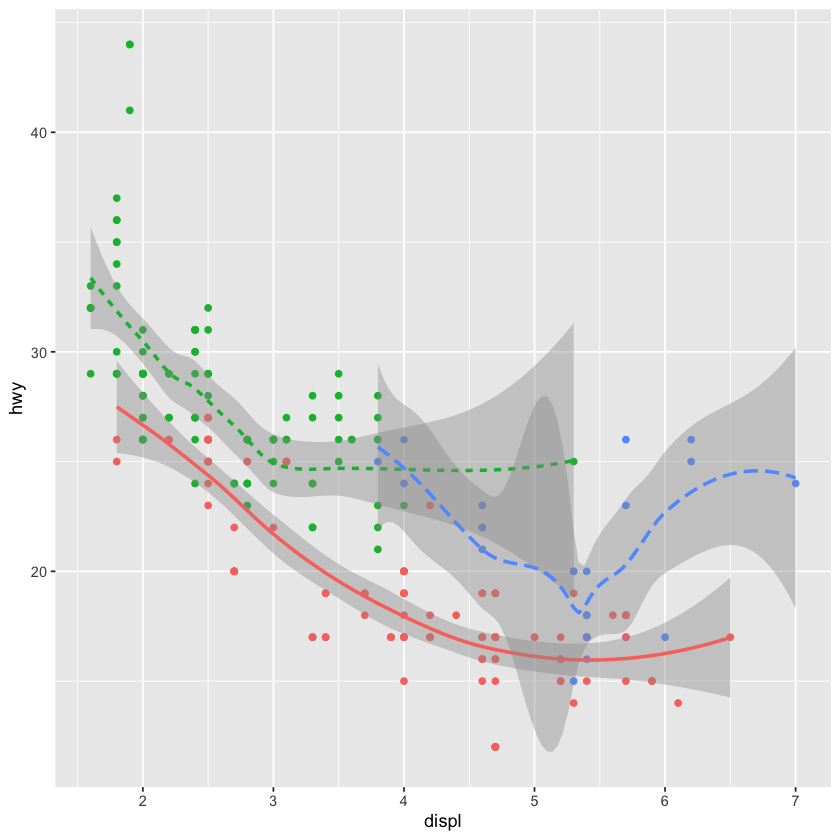

In [8]:
ggplot2::mpg %>%
  ggplot(mapping = aes(x = displ, y = hwy, color = drv)) +
    geom_point (                               show.legend=FALSE) +
    geom_smooth(mapping = aes(linetype = drv), show.legend=FALSE)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


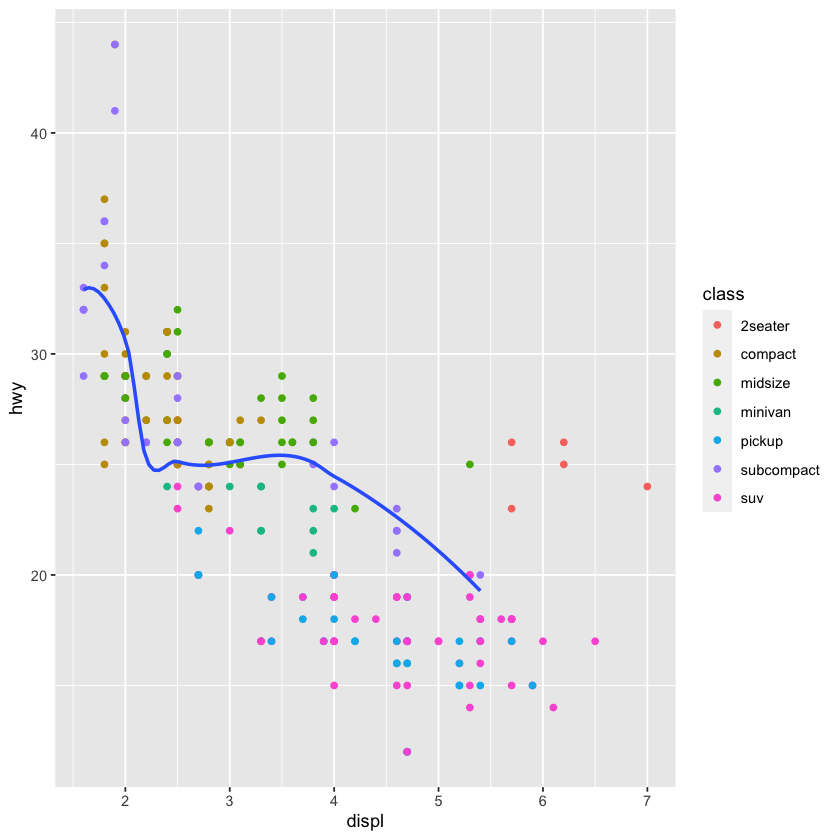

In [9]:
ggplot2::mpg %>%
  ggplot(mapping = aes(x = displ, y = hwy)) +
    geom_point(mapping = aes(color = class)) +
    geom_smooth(data = filter(mpg, class == 'subcompact'), se=FALSE)

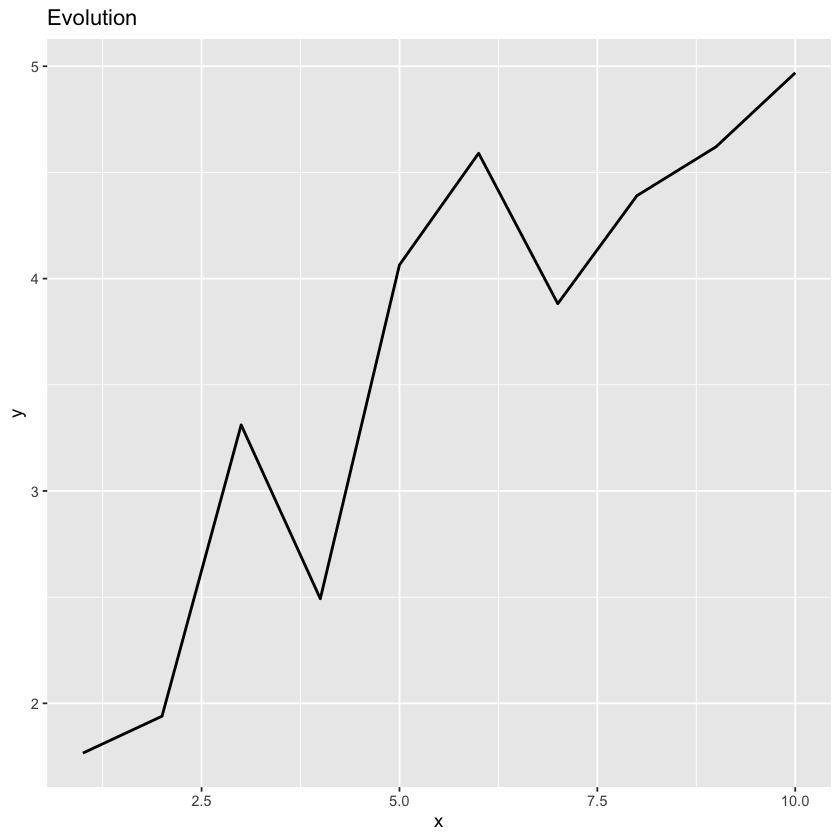

In [27]:
# LINE PLOT
x  <- 1:10
y  <- cumsum(rnorm(10))
df <- data.frame(x, y)
ggplot(df, mapping = aes(x = x, y = y)) +
  geom_line(size=0.8) +
  ggtitle('Evolution')

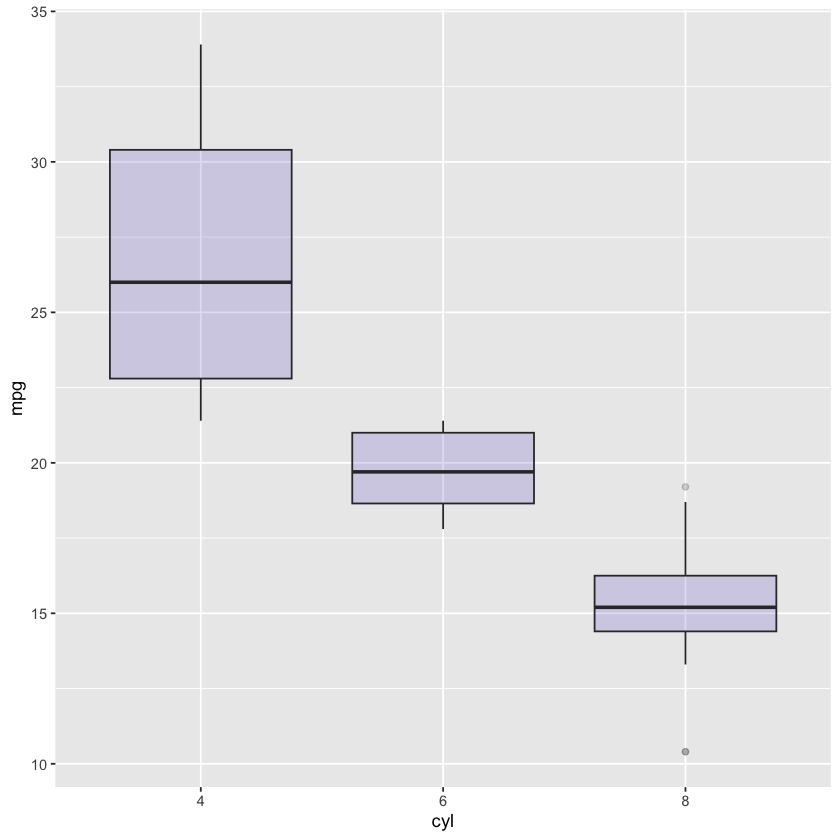

In [30]:
# BOX PLOT
mtcars %>%
  ggplot(mapping = aes(x = as.factor(cyl), y = mpg)) +
    geom_boxplot(fill = 'slateblue', alpha = 0.2) +
    xlab('cyl')

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


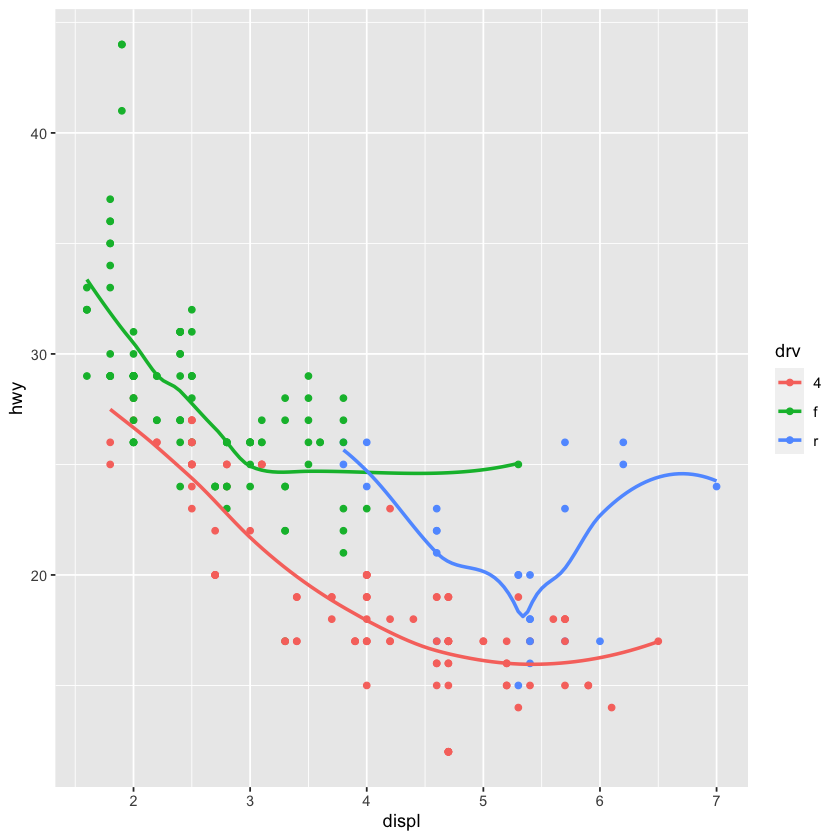

In [31]:
ggplot(data    = mpg,
       mapping = aes(x     = displ,
                     y     = hwy,
                     color = drv)) +
  geom_point() +
  geom_smooth(se=FALSE)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


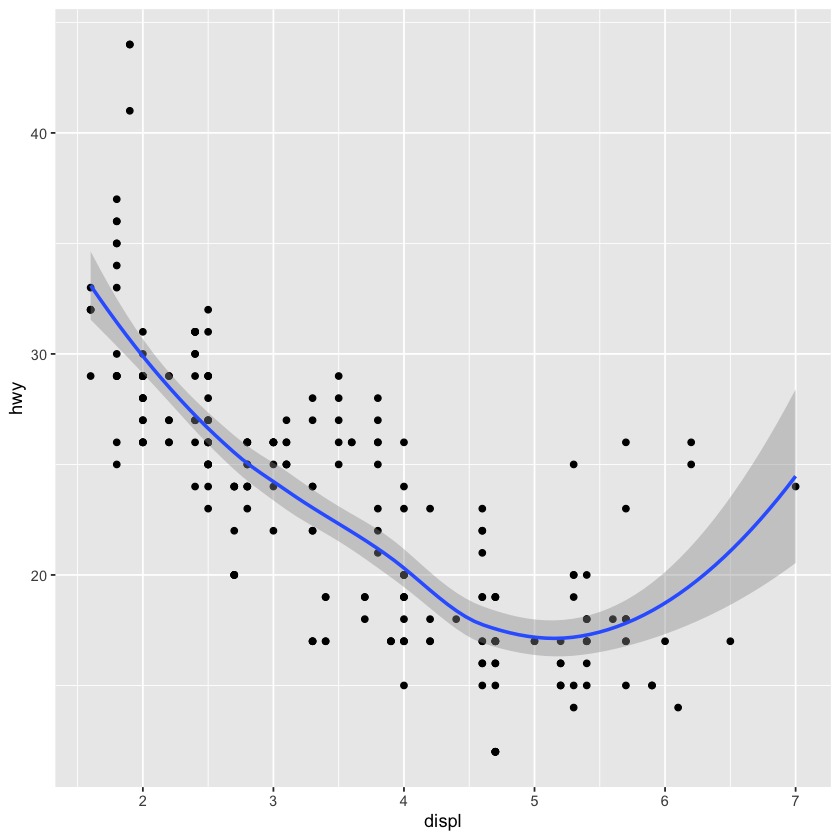

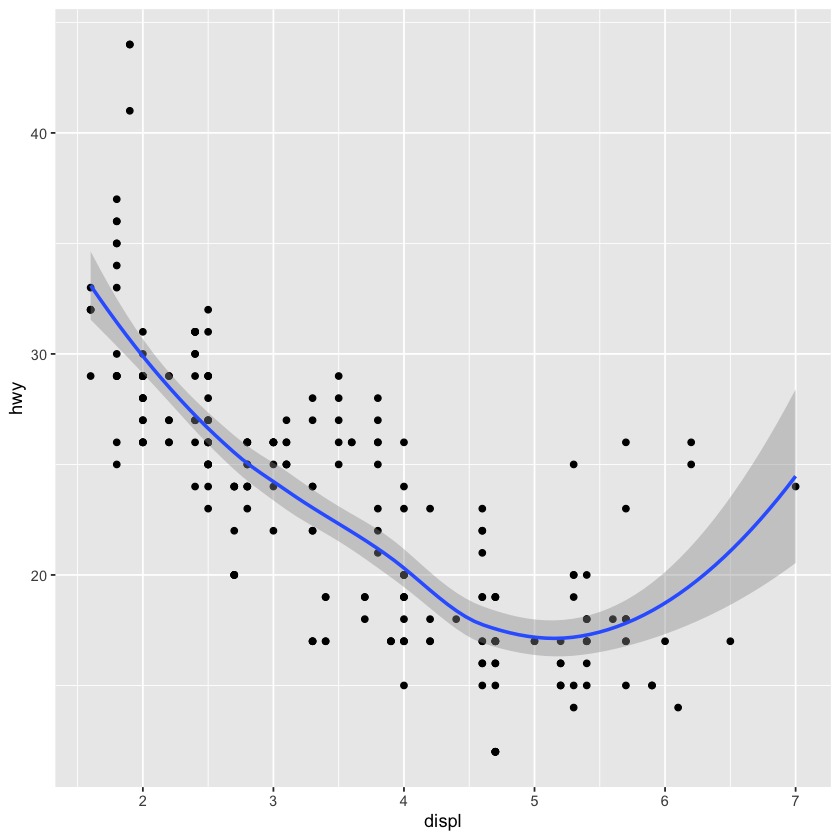

In [35]:
ggplot(data    = mpg,
       mapping = aes(x = displ,
                     y = hwy)) +
  geom_point () +
  geom_smooth()

ggplot() +
  geom_point (data    = mpg,
              mapping = aes(x = displ,
                            y = hwy)) +
  geom_smooth(data    = mpg,
              mapping = aes(x = displ,
                            y = hwy))

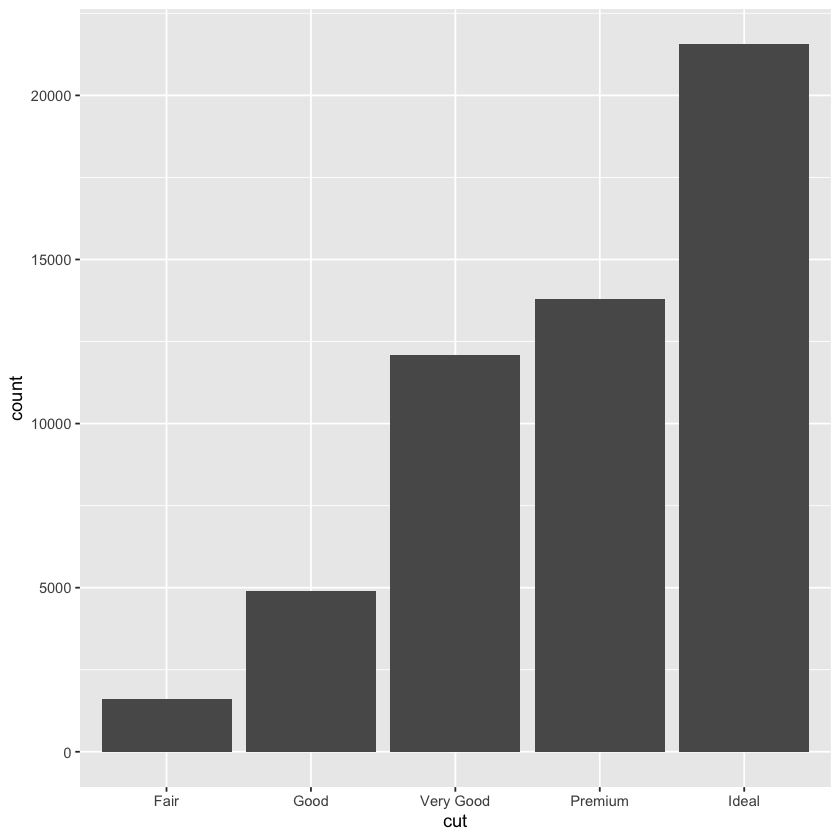

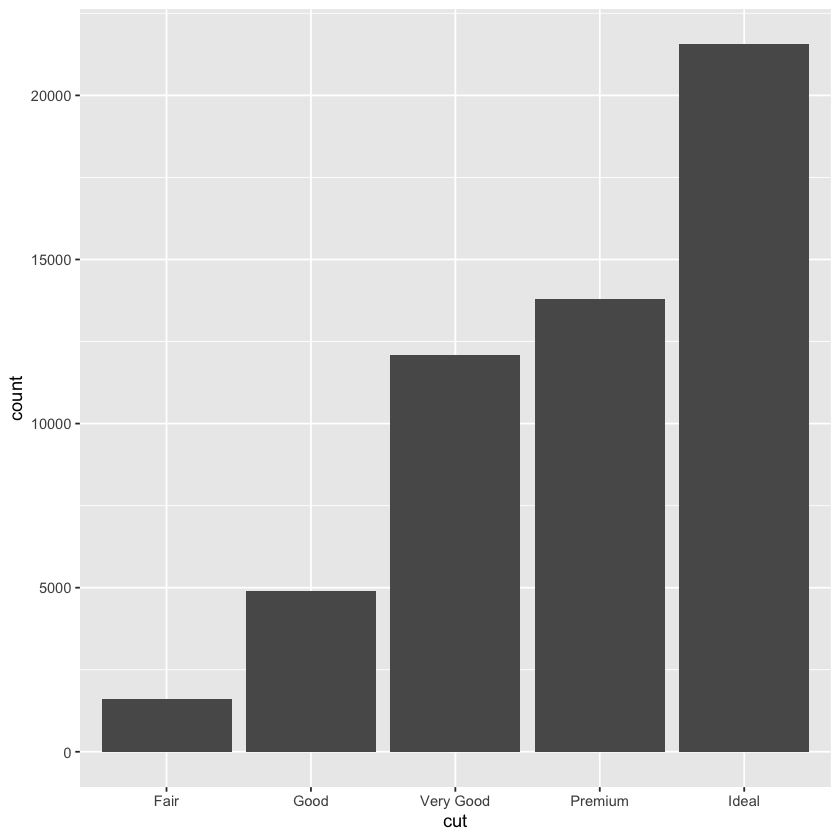

In [38]:
ggplot(data = diamonds) +
  geom_bar  (mapping = aes(x = cut))
ggplot(data = diamonds) +
  stat_count(mapping = aes(x = cut))

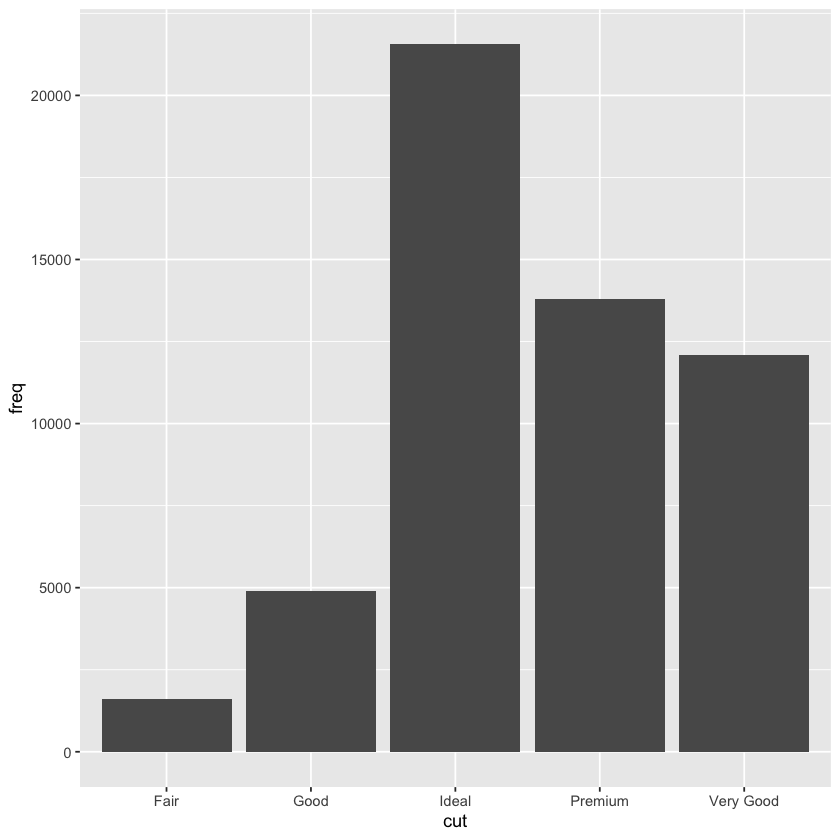

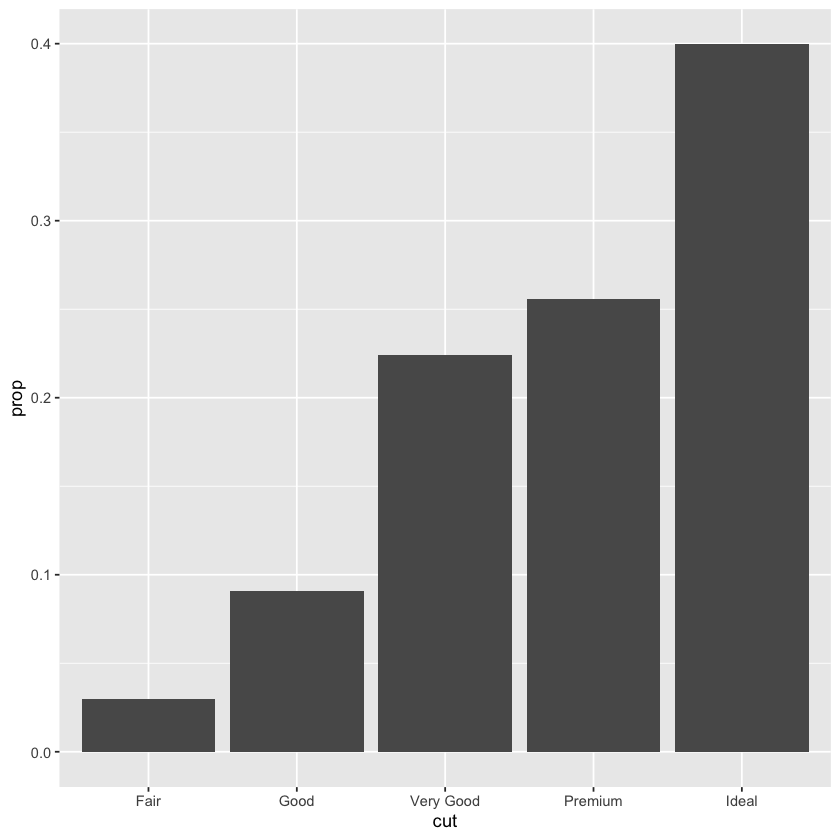

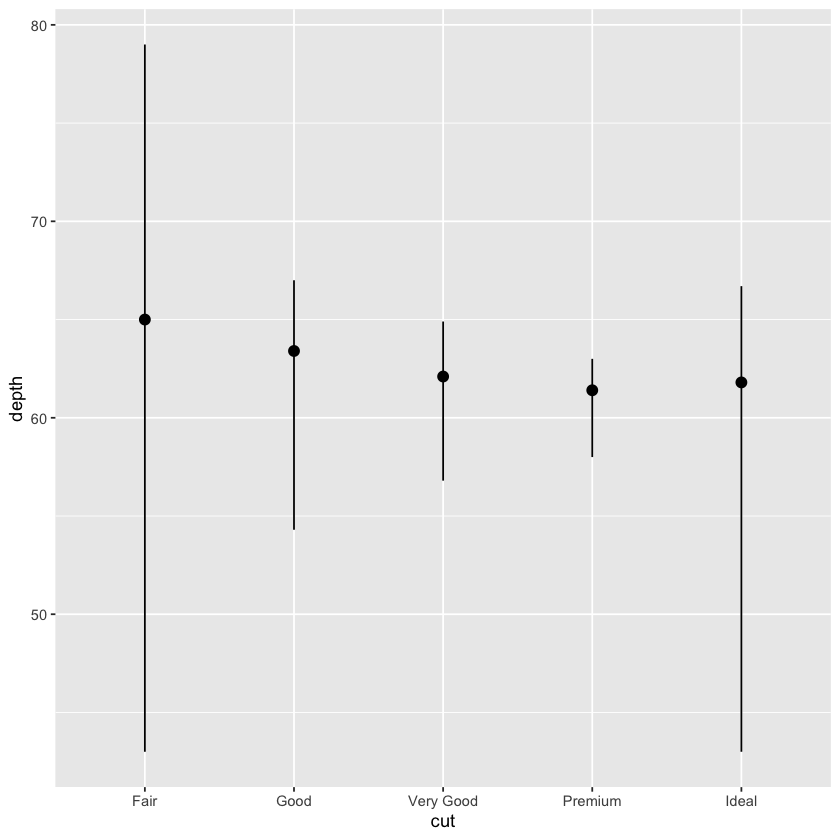

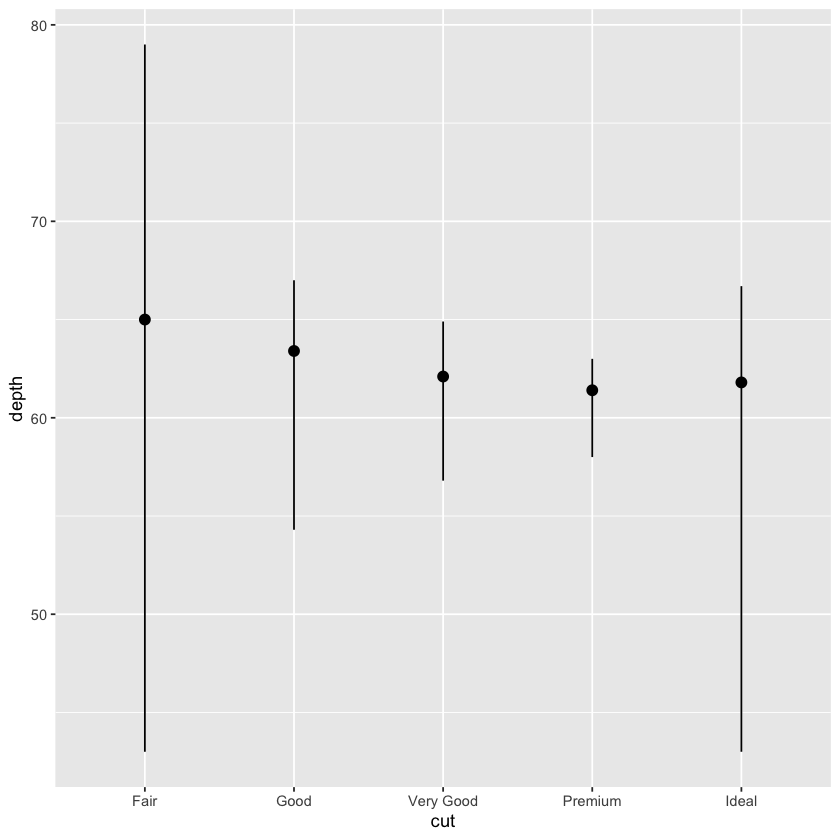

In [49]:
demo <- tribble(
  ~cut,  ~freq,
  'Fair',      1610,
  'Good',      4906,
  'Very Good',12082,
  'Premium',  13791,
  'Ideal',    21551
)
ggplot(data = demo) +
  geom_bar(mapping = aes(x = cut,
                         y = freq),
           stat    = 'identity')

ggplot(data = diamonds) +
  geom_bar(mapping = aes(x     = cut,
                         y     = stat(prop),
                         group = 1))

ggplot(data = diamonds) +
  stat_summary(
    mapping = aes(x = cut, y = depth),
    fun.min = min,
    fun.max = max,
    fun     = median
  )
ggplot(data = diamonds) +
  geom_pointrange(
    mapping = aes(x = cut, y = depth),
    stat    = 'summary',
    fun.min = min,
    fun.max = max,
    fun     = median
  )

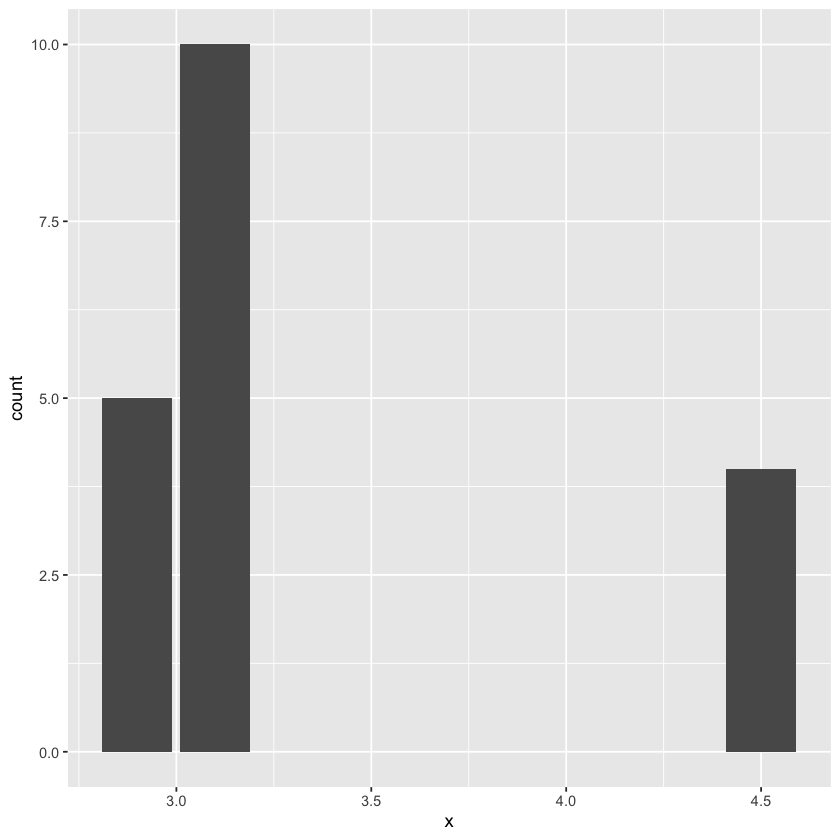

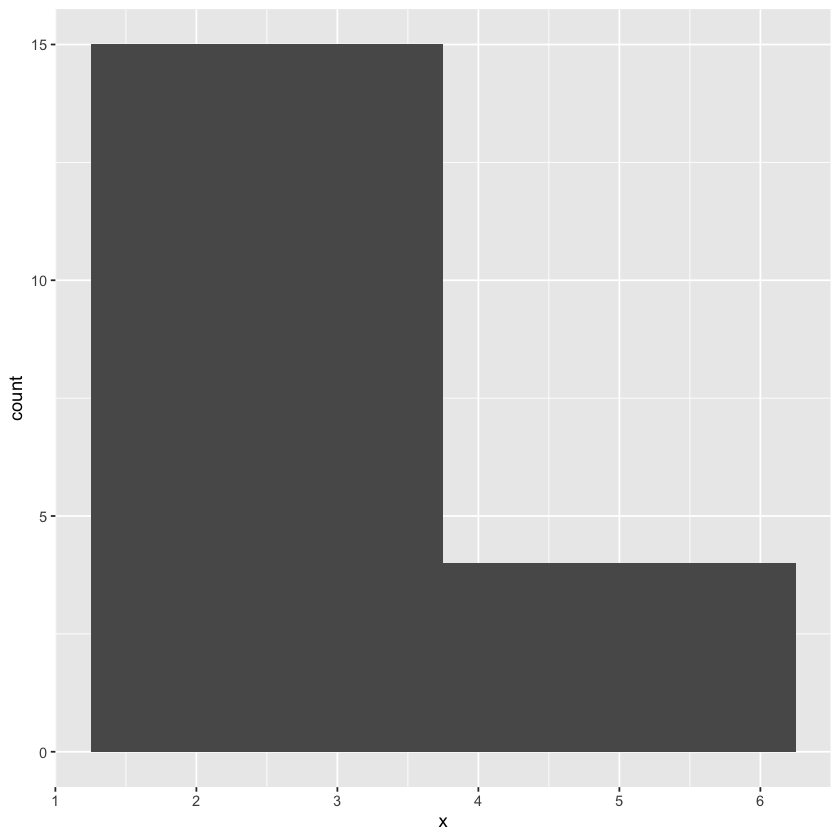

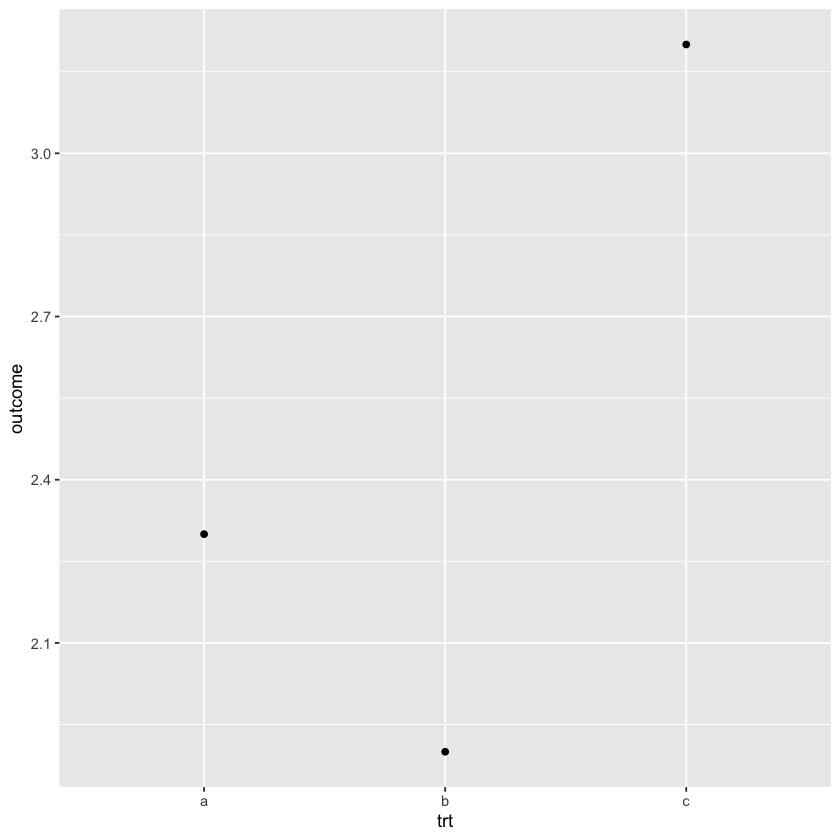

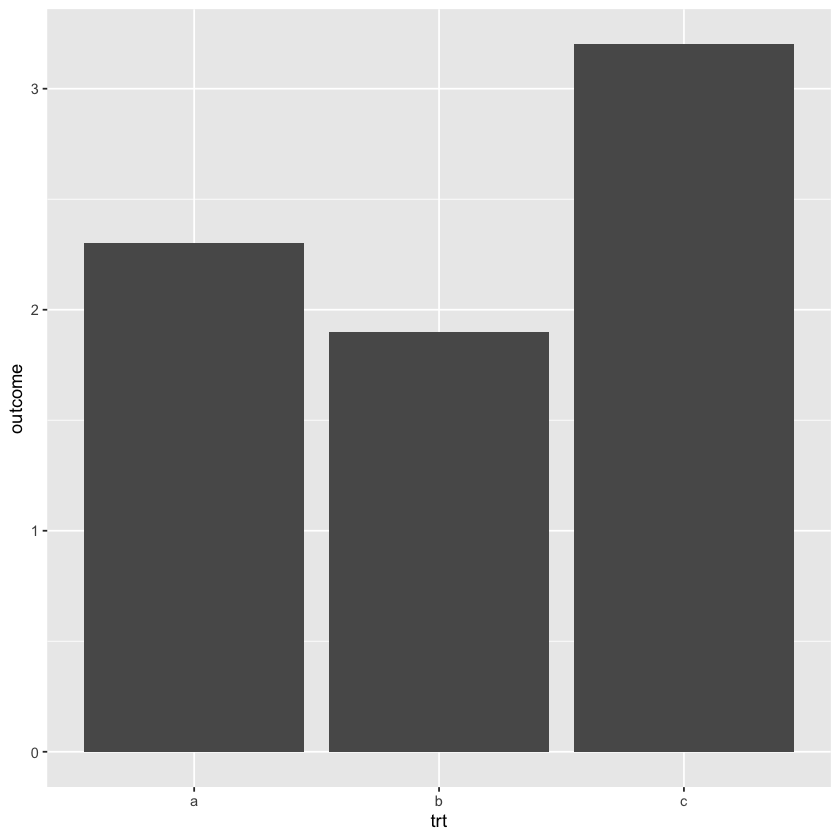

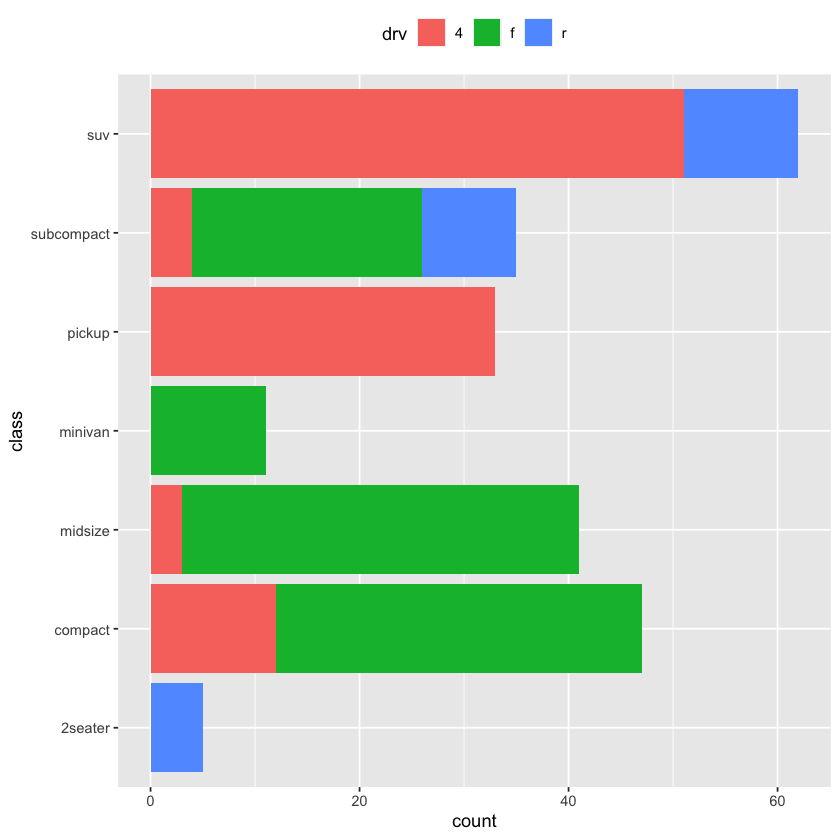

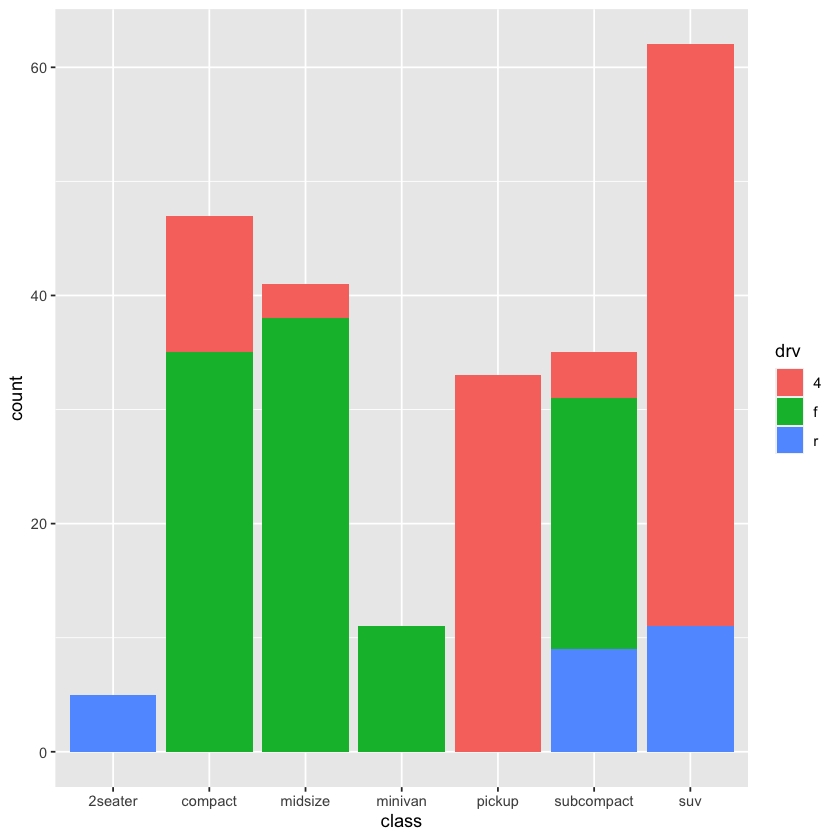

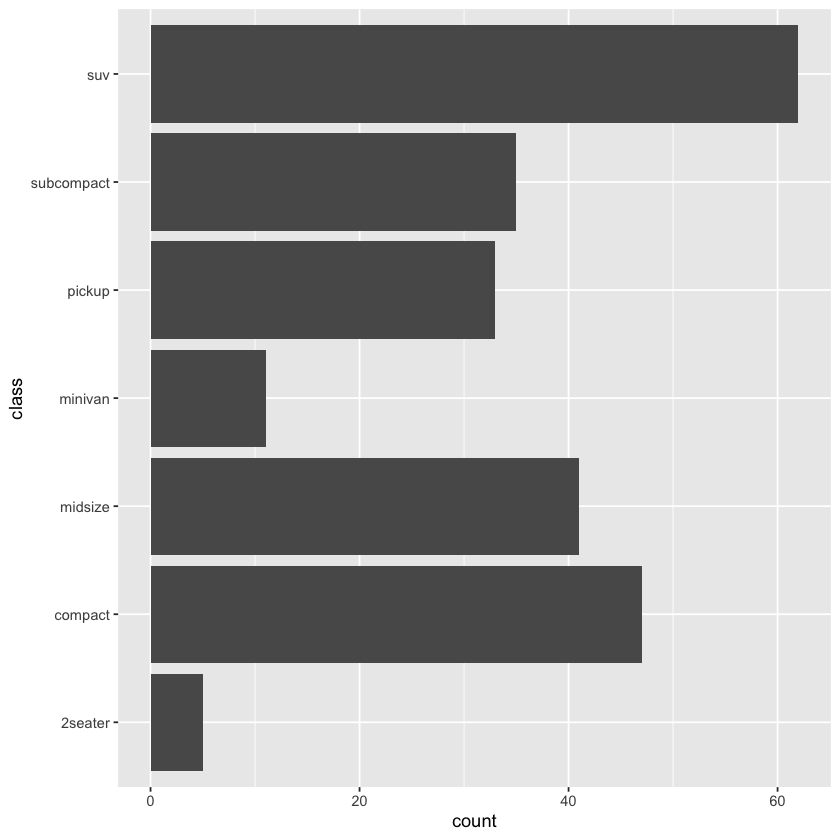

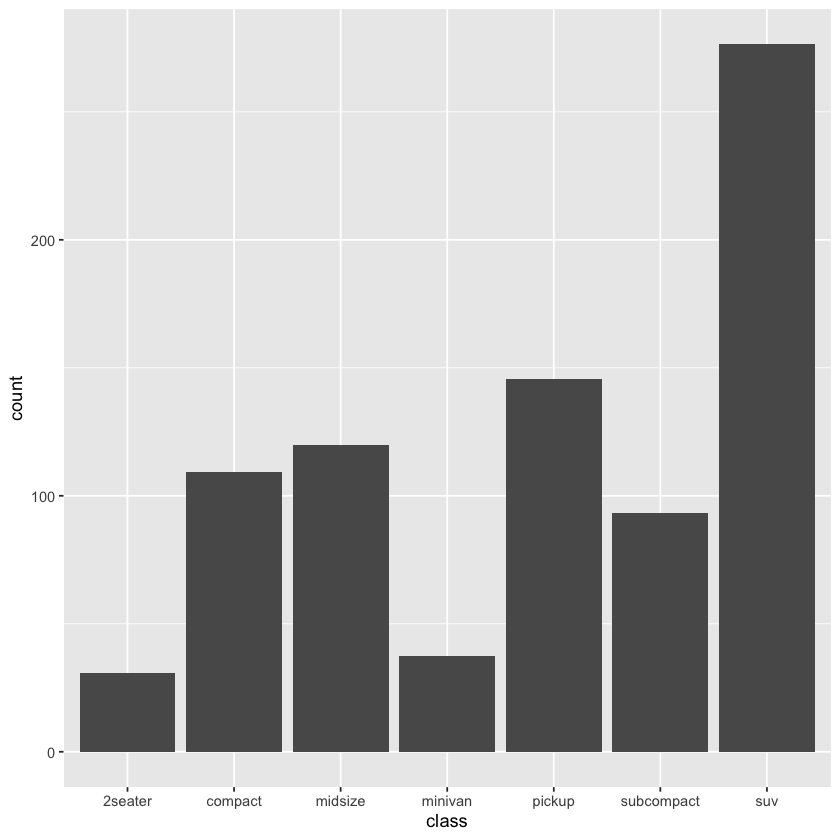

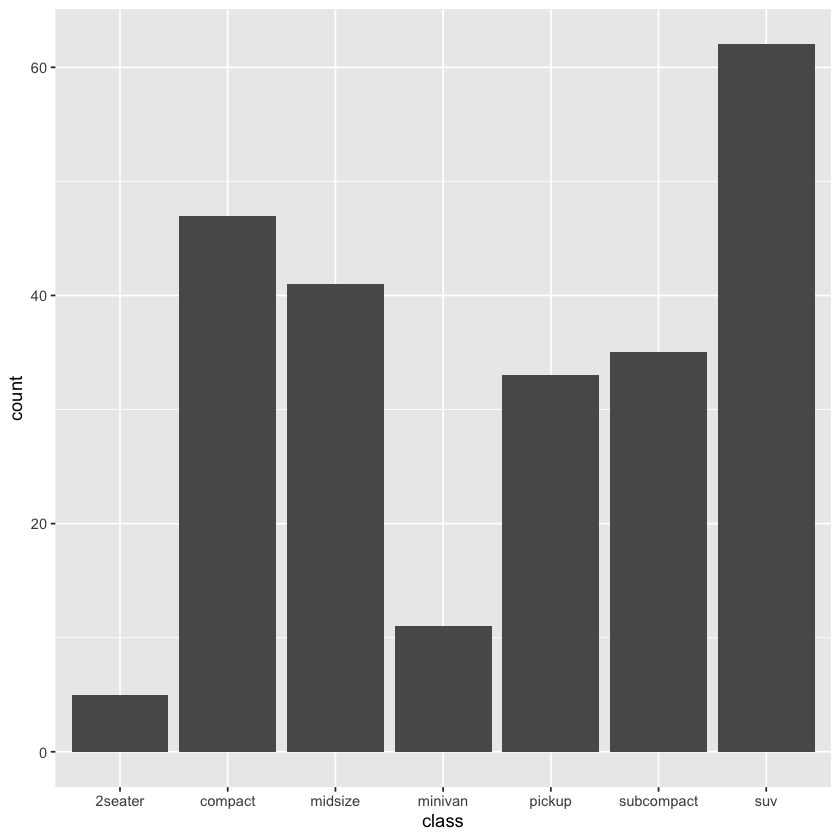

In [64]:
g  <- ggplot(data = mpg, mapping = aes(x = class))

df <- data.frame(x = rep(c(2.9, 3.1, 4.5), c(5, 10, 4)))
ggplot(data = df, mapping = aes(x)) + geom_bar()
ggplot(data = df, mapping = aes(x)) + geom_histogram(binwidth = 2.5)
df <- data.frame(trt = c('a', 'b', 'c'), outcome = c(2.3, 1.9, 3.2))
ggplot(data = df,  mapping = aes(x = trt, y = outcome)) + geom_point()
ggplot(data = df,  mapping = aes(x = trt, y = outcome)) + geom_col()
ggplot(data = mpg, mapping = aes(y = class)) + geom_bar(mapping = aes(fill = drv), position = position_stack(reverse = TRUE)) + theme(legend.position='top')
g + geom_bar(mapping = aes(fill = drv))
ggplot(data = mpg, mapping = aes(y = class)) + geom_bar()
g + geom_bar(mapping = aes(weight = displ))
g + geom_bar()

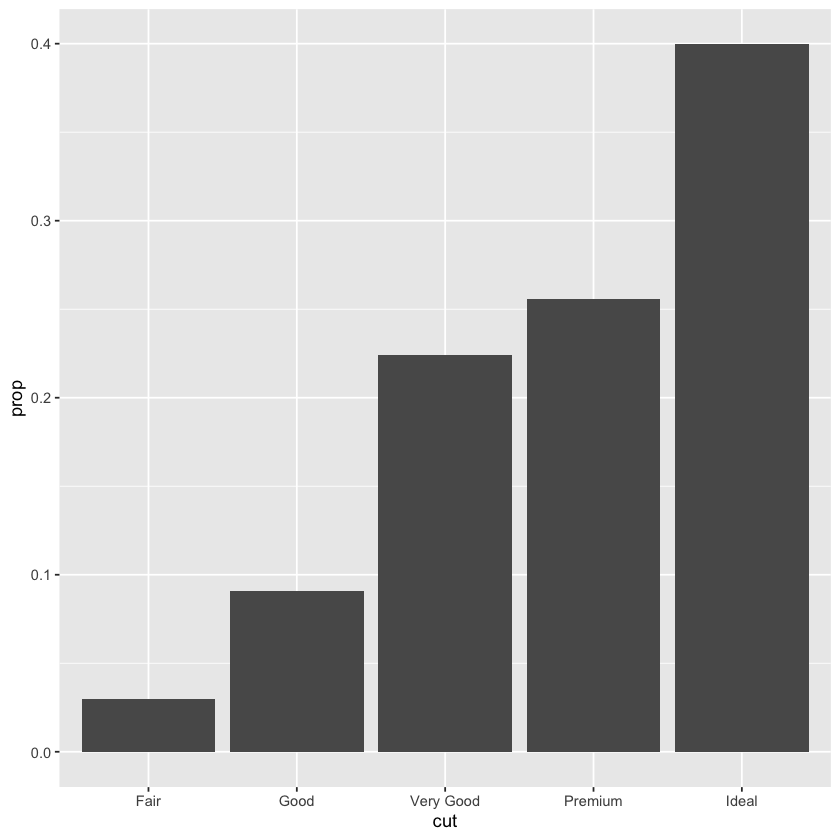

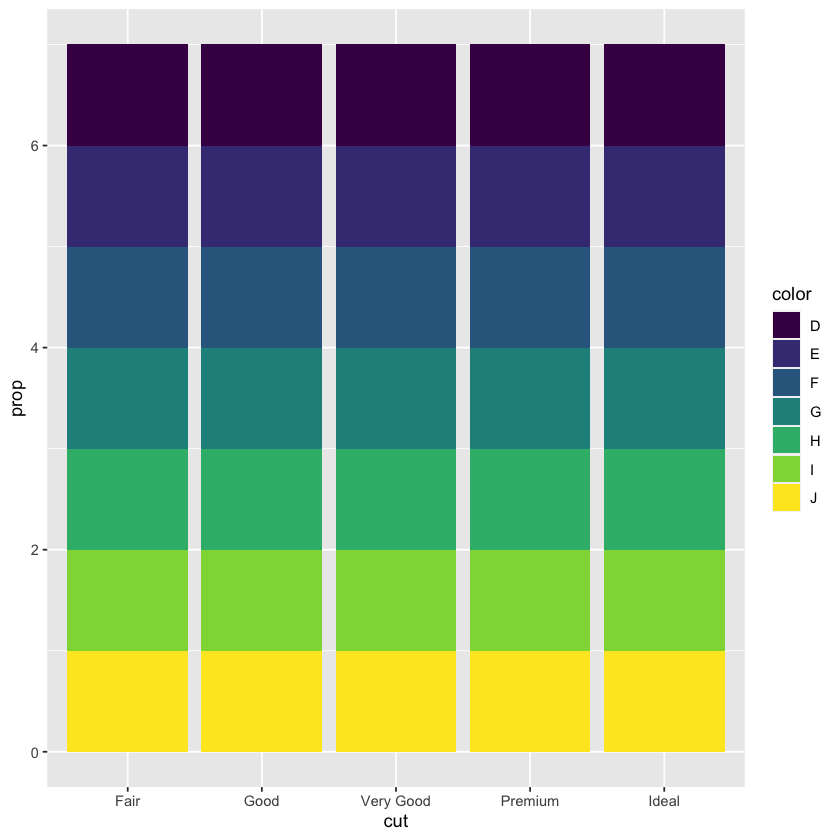

In [78]:
# 3.7.1 [5]

ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, y = after_stat(prop), group = 1))
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, y = after_stat(prop), fill = color))

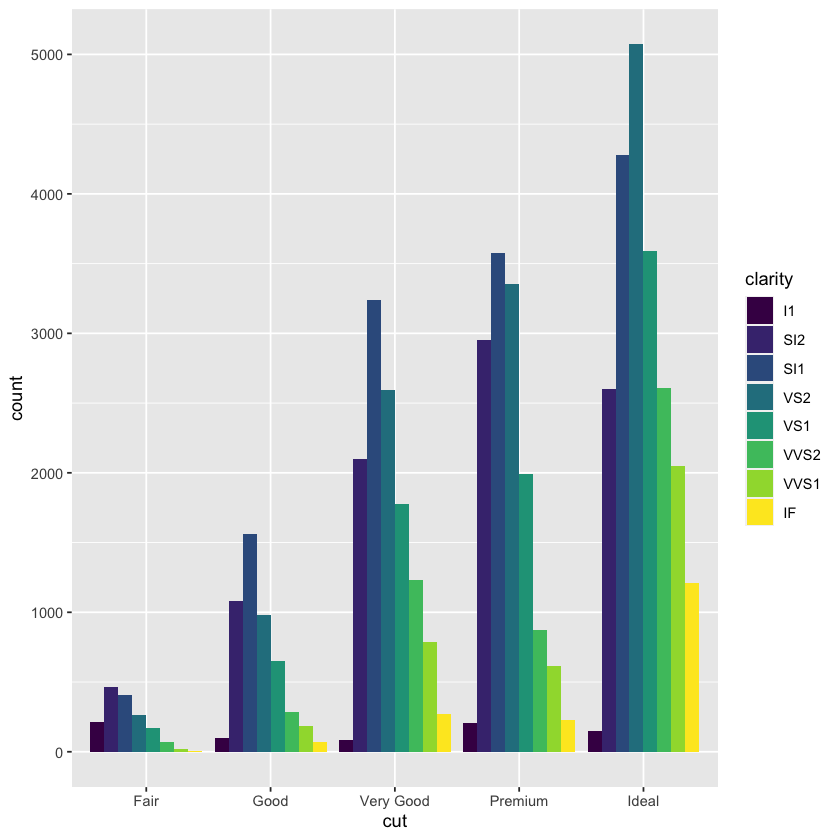

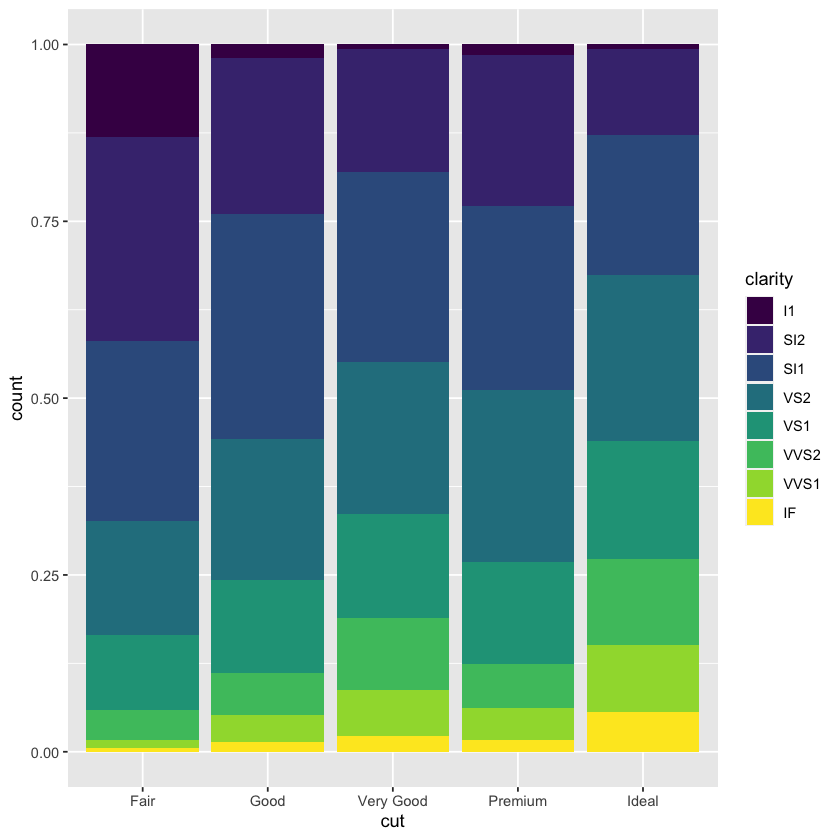

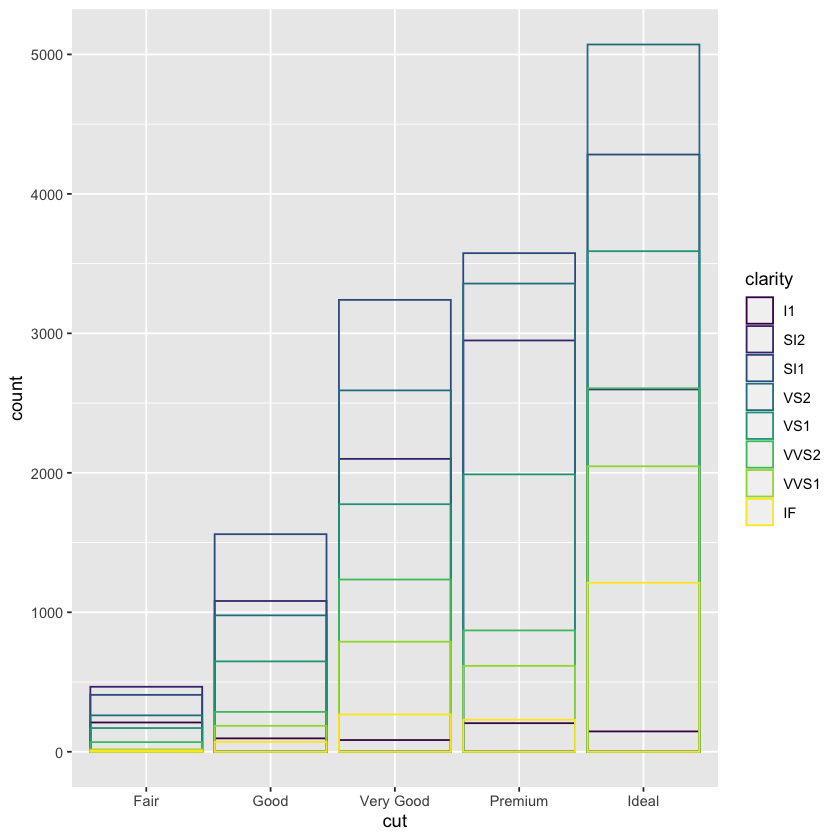

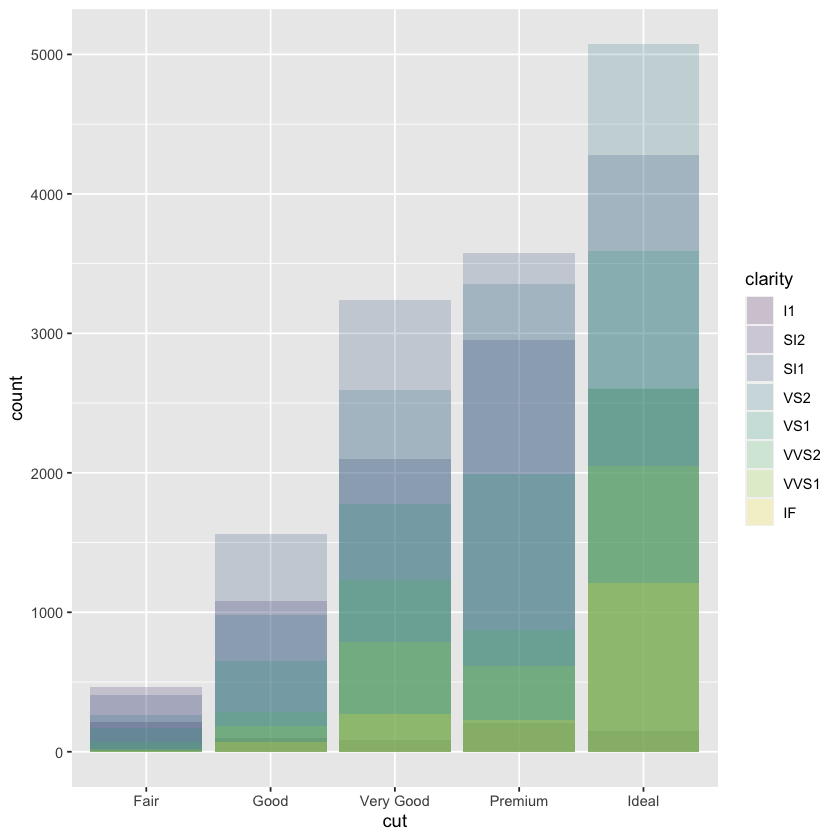

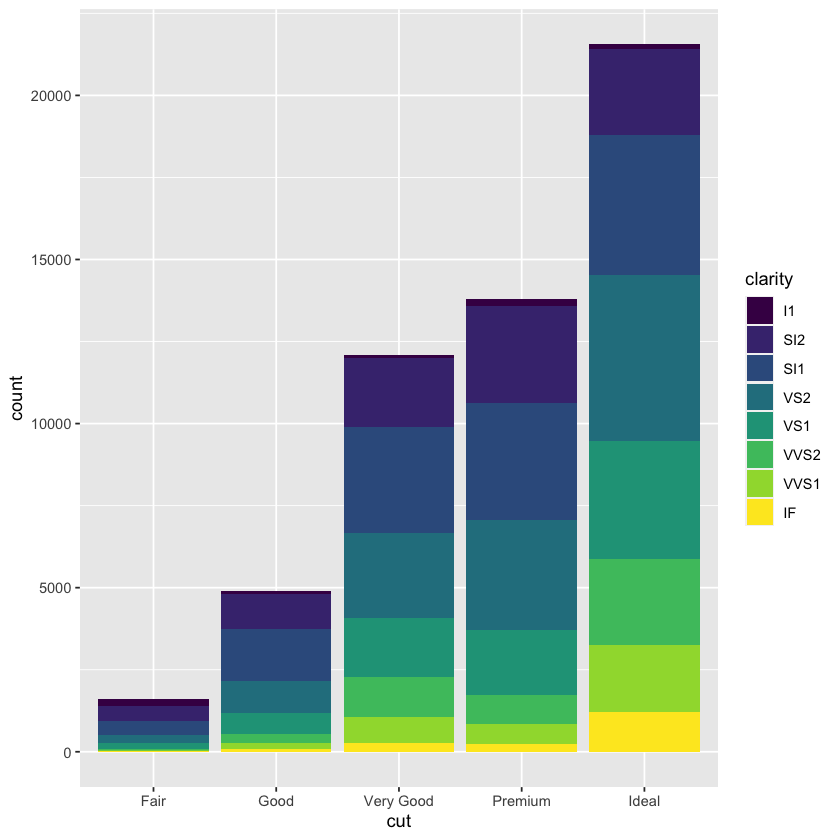

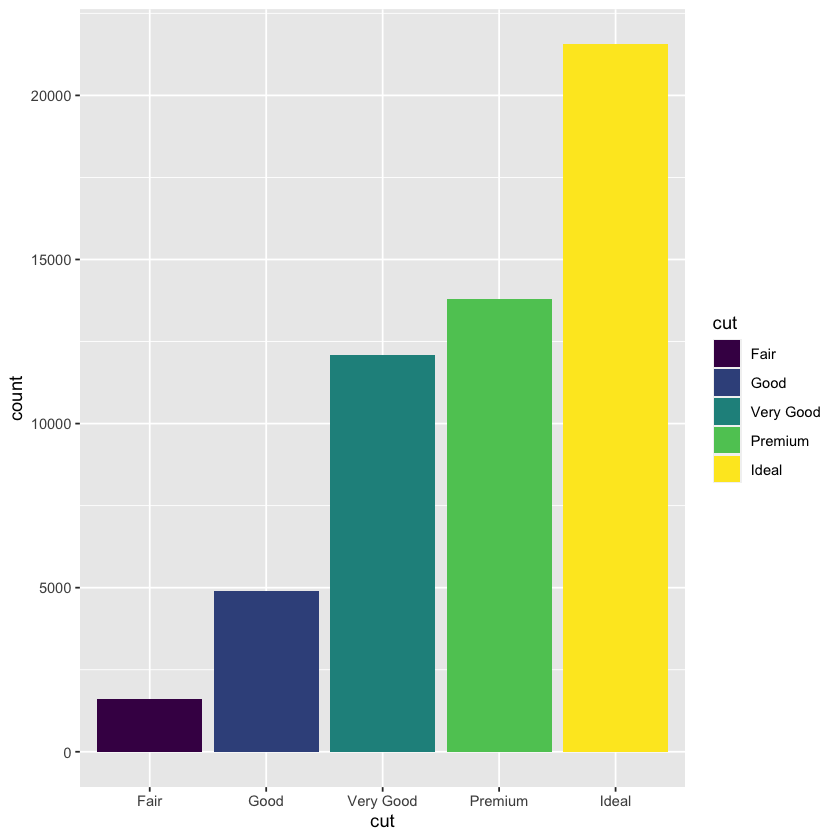

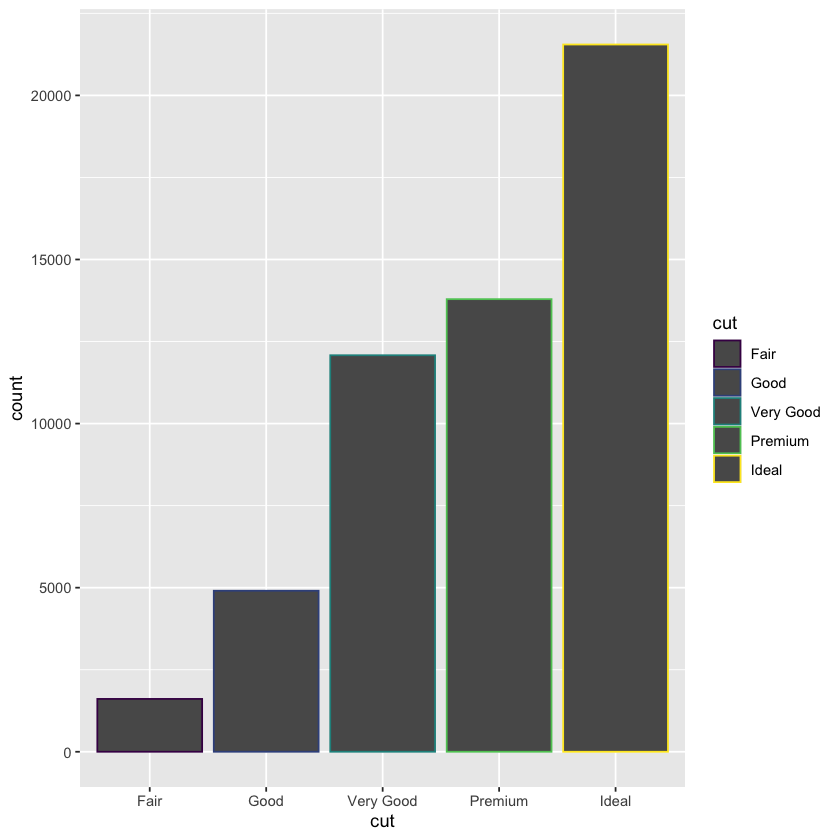

In [86]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = clarity), position = 'dodge')
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = clarity), position = 'fill')
ggplot(data = diamonds, mapping = aes(x = cut, color = clarity)) +
  geom_bar(fill = NA, position = 'identity')
ggplot(data = diamonds, mapping = aes(x = cut, fill = clarity)) +
  geom_bar(alpha = 1/5, position = 'identity')
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = clarity))
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = cut))
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, color = cut))

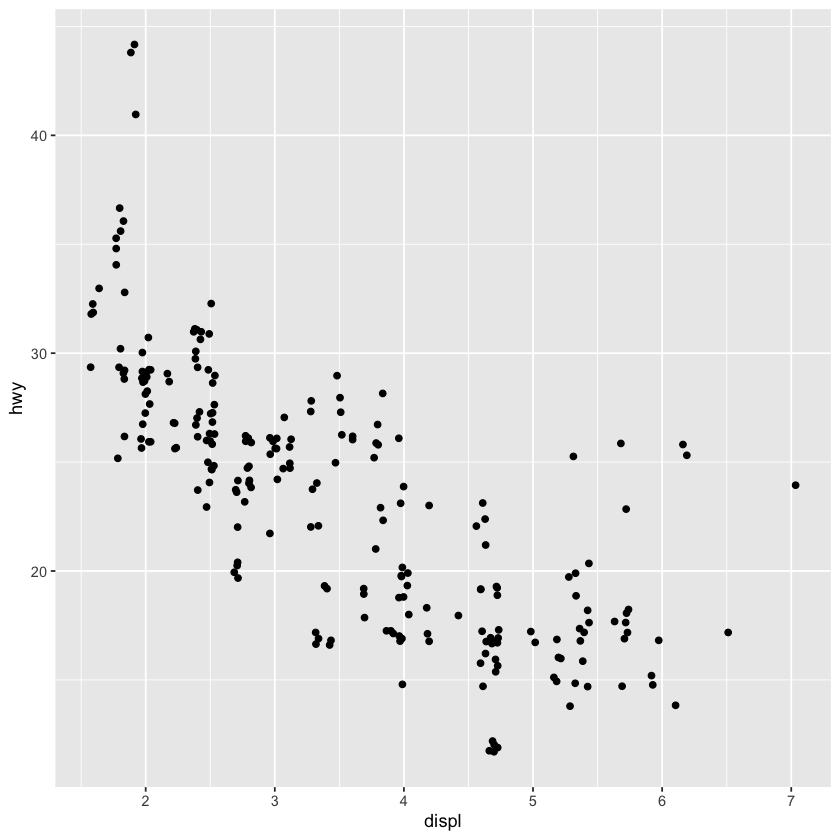

In [87]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy), position = 'jitter')

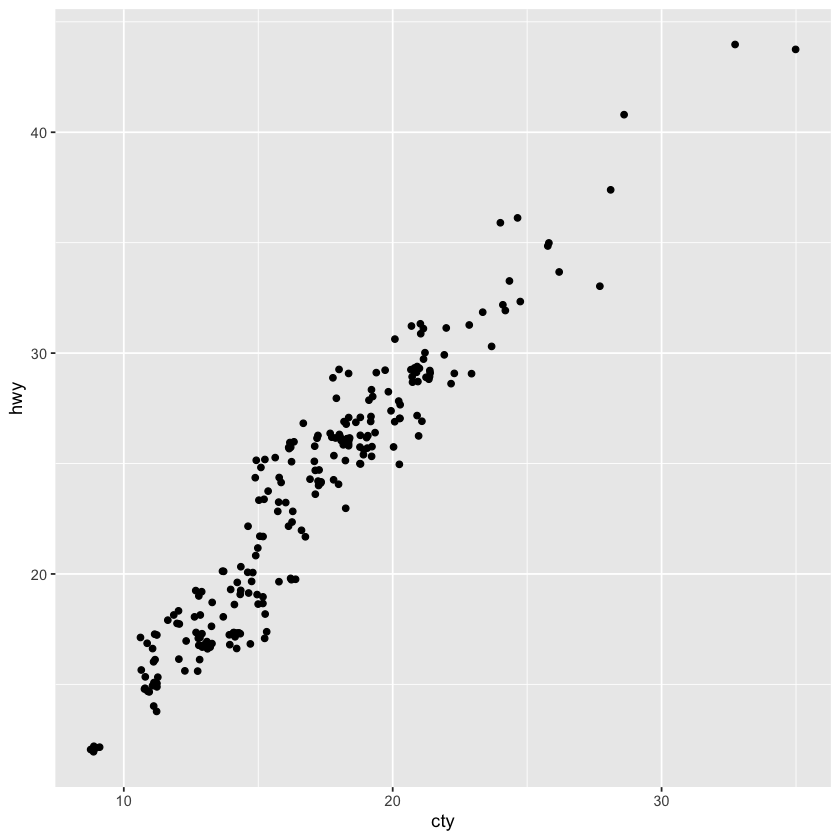

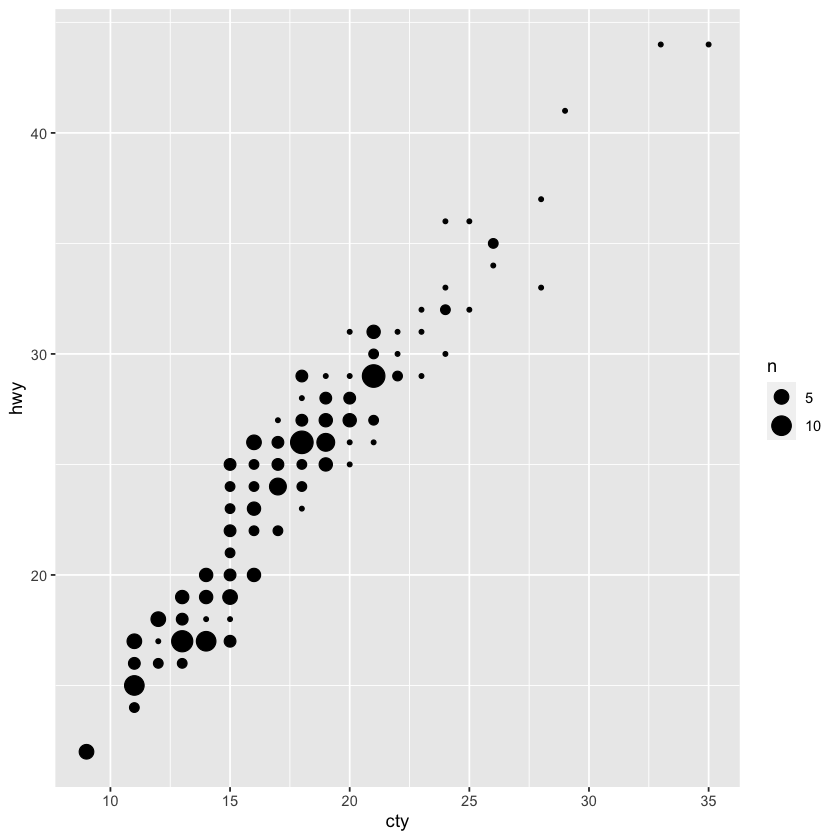

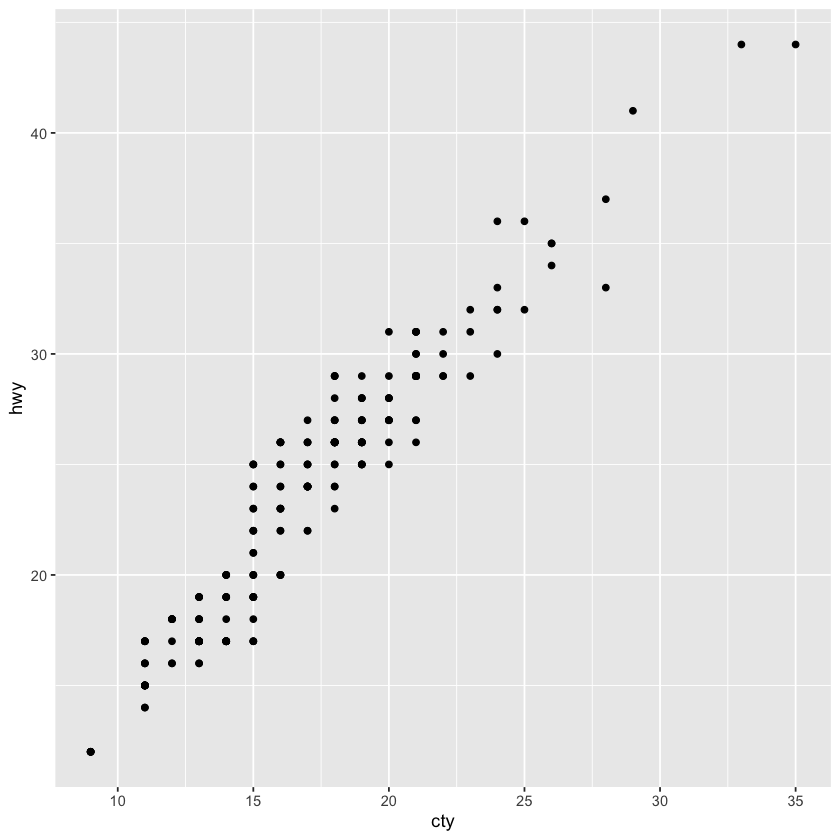

In [91]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) + geom_jitter()
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) + geom_count()
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) + geom_point()

In [96]:
head(mpg)

manufacturer model displ year cyl trans      drv cty hwy fl class  
1 audi         a4    1.8   1999 4   auto(l5)   f   18  29  p  compact
2 audi         a4    1.8   1999 4   manual(m5) f   21  29  p  compact
3 audi         a4    2.0   2008 4   manual(m6) f   20  31  p  compact
4 audi         a4    2.0   2008 4   auto(av)   f   21  30  p  compact
5 audi         a4    2.8   1999 6   auto(l5)   f   16  26  p  compact
6 audi         a4    2.8   1999 6   manual(m5) f   18  26  p  compact

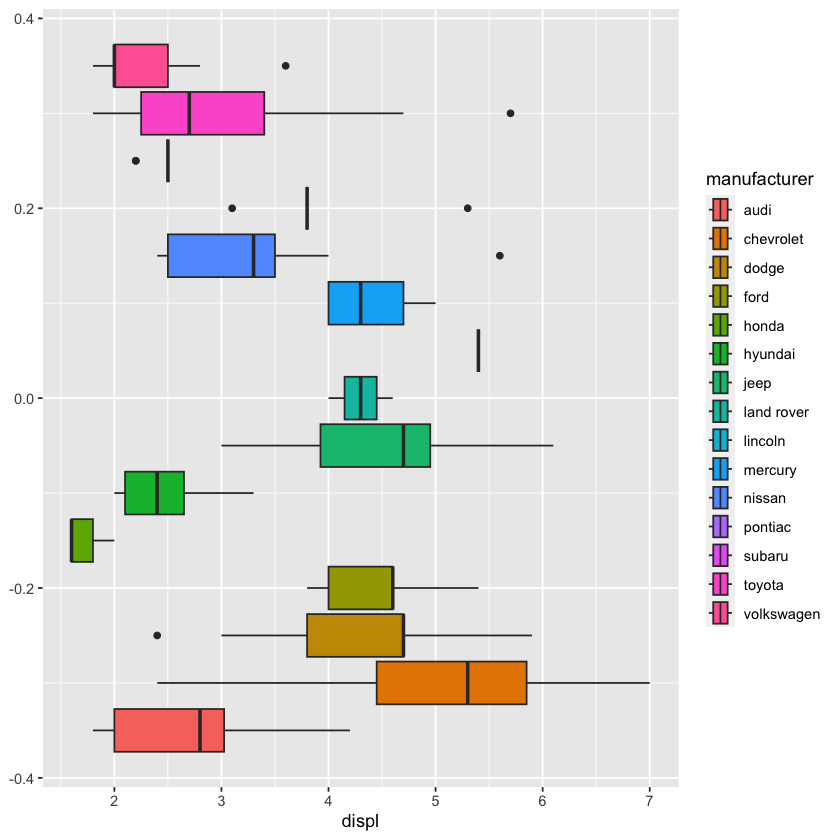

In [105]:
ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = displ, fill = manufacturer))

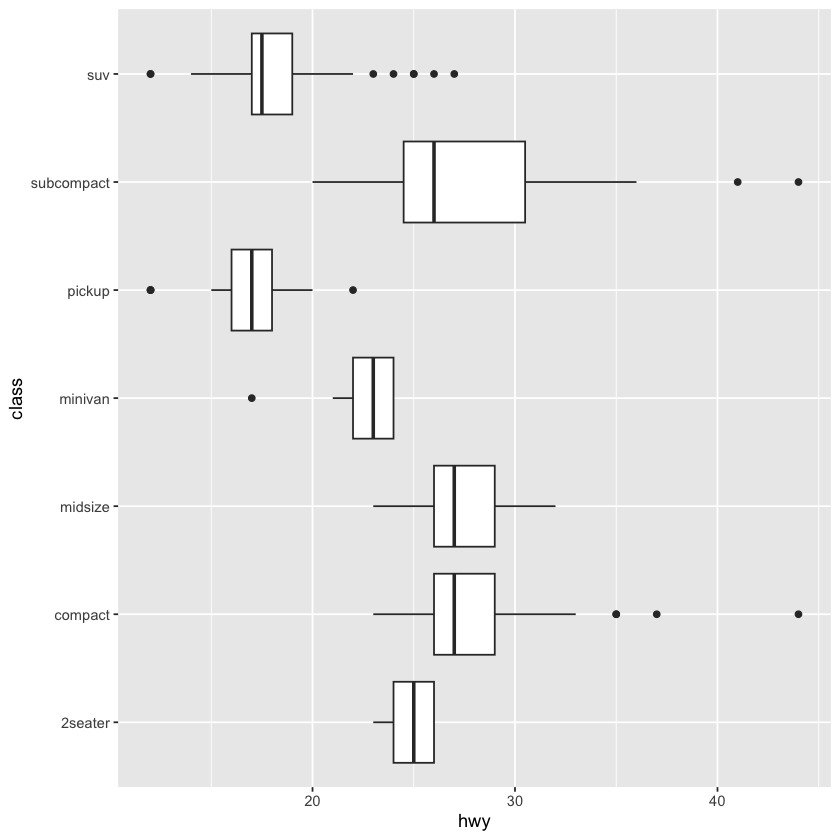

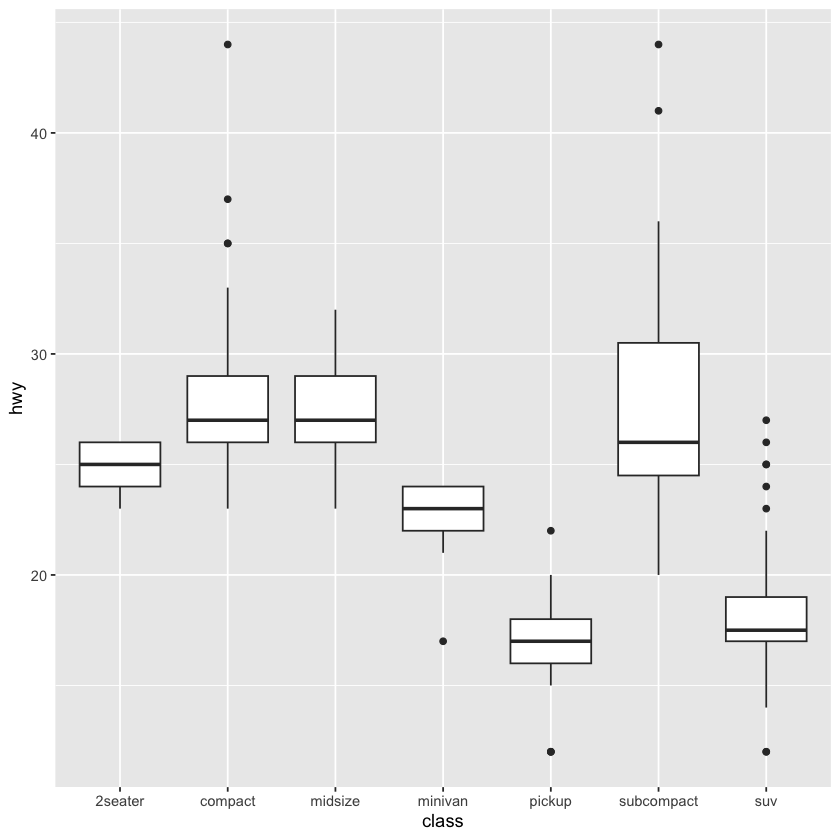

In [107]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + geom_boxplot() + coord_flip()
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + geom_boxplot()

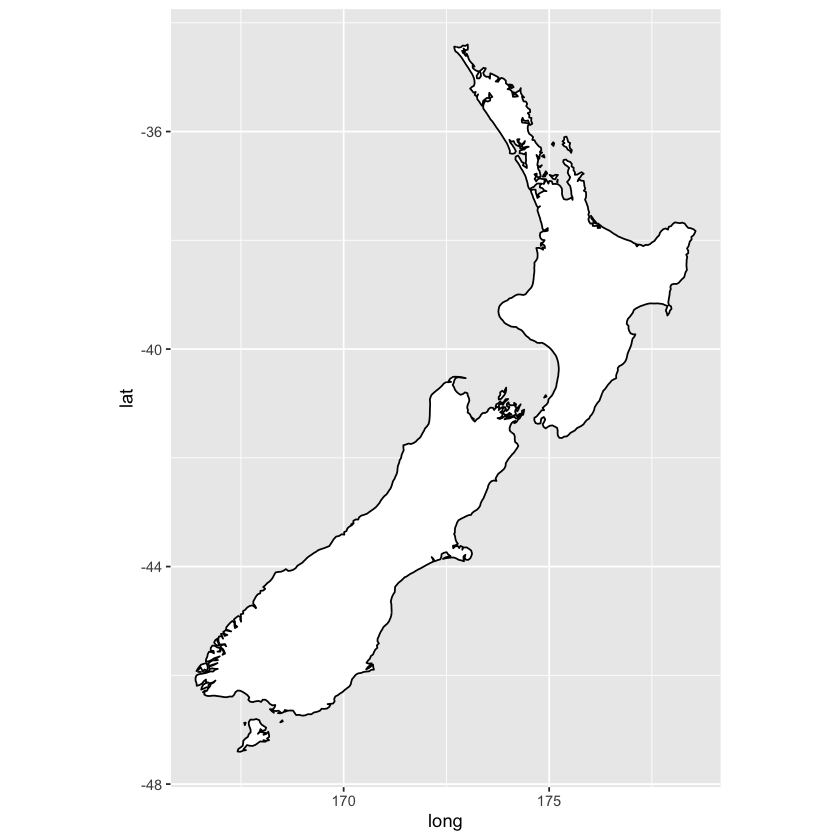

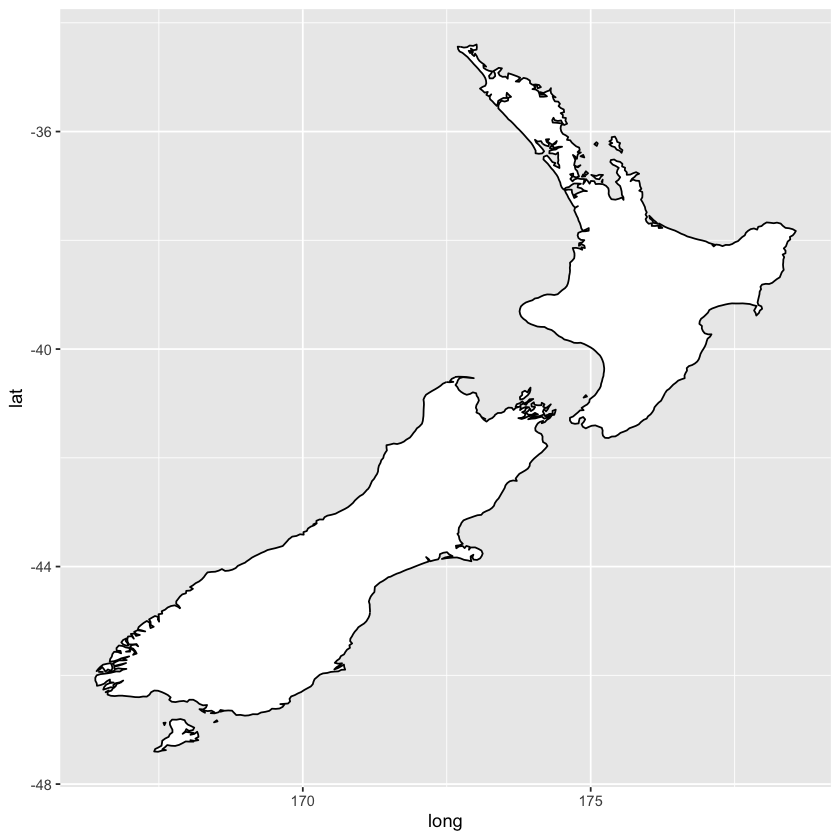

In [112]:
nz <- map_data('nz')
ggplot(data = nz, mapping = aes(x = long, y = lat, group = group)) +
  geom_polygon(fill = 'white', color = 'black') +
  coord_quickmap()
ggplot(data = nz, mapping = aes(x = long, y = lat, group = group)) +
  geom_polygon(fill = 'white', color = 'black')

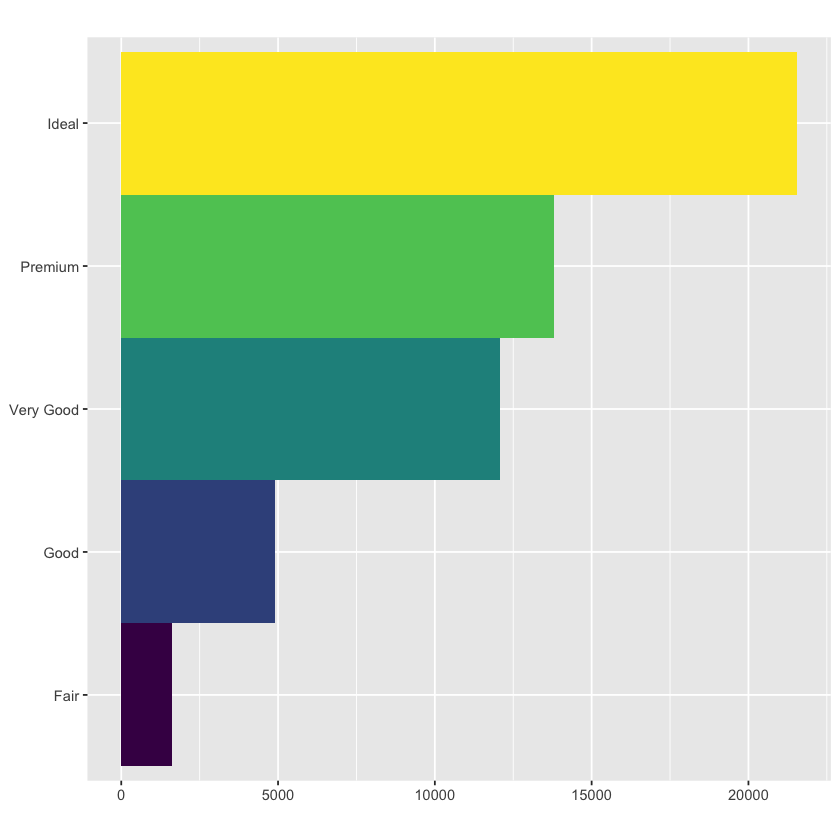

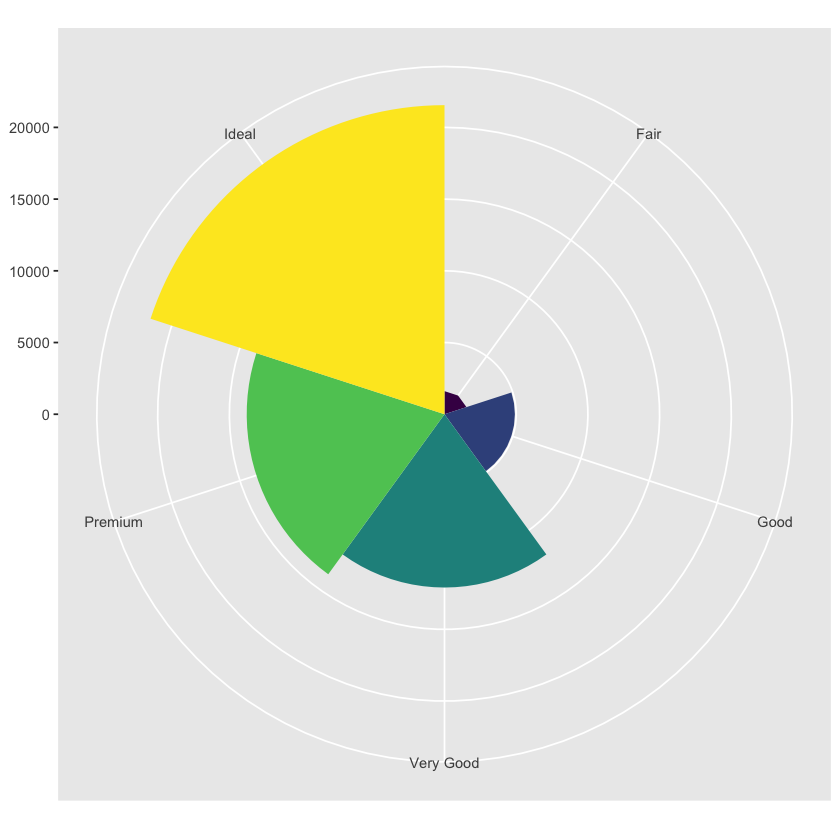

In [116]:
bar <- ggplot(data = diamonds) +
  geom_bar(
    mapping = aes(x = cut, fill = cut),
    show.legend = FALSE,
    width = 1
  ) +
  theme(aspect.ratio = 1) +
  labs(x = NULL, y = NULL)

bar + coord_flip()
bar + coord_polar()


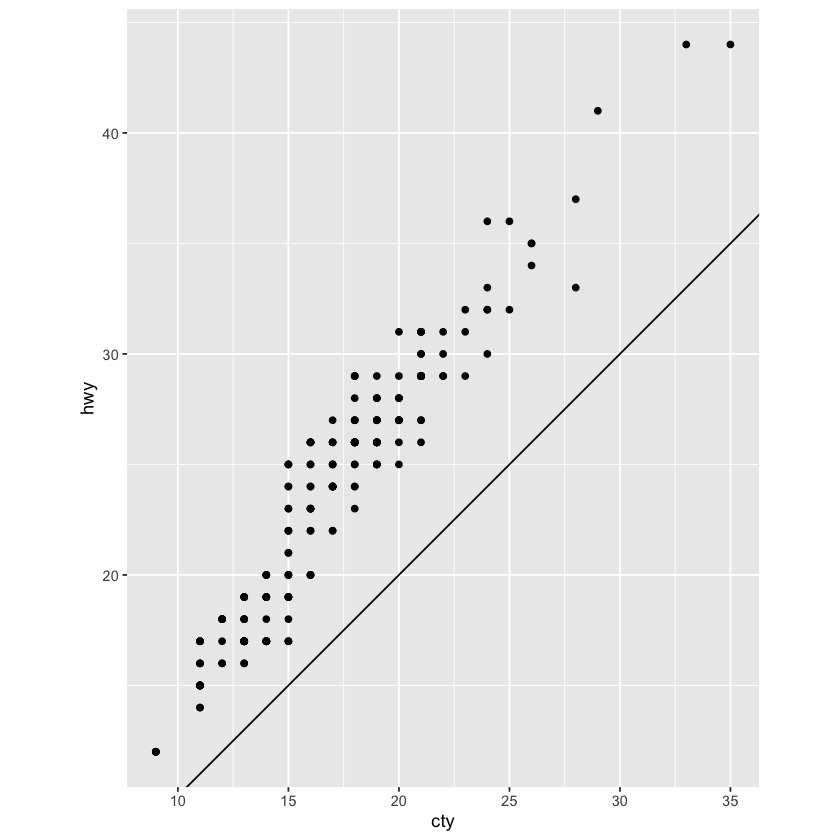

In [118]:
# 3.9.1 [4]

ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_point() +
  geom_abline() +
  coord_fixed()

---

## 04 - Workflow: basics

In [5]:
sin(pi/2)
seq(1,10)
typeof(seq(1,10))
seq(1,10,length.out=5)
1:10

[1] 1

[1]  1  2  3  4  5  6  7  8  9 10

[1] "integer"

[1]  1.00  3.25  5.50  7.75 10.00

[1]  1  2  3  4  5  6  7  8  9 10

---

## 05 - Data Transformation

In [6]:
airlines

carrier name                       
1  9E      Endeavor Air Inc.          
2  AA      American Airlines Inc.     
3  AS      Alaska Airlines Inc.       
4  B6      JetBlue Airways            
5  DL      Delta Air Lines Inc.       
6  EV      ExpressJet Airlines Inc.   
7  F9      Frontier Airlines Inc.     
8  FL      AirTran Airways Corporation
9  HA      Hawaiian Airlines Inc.     
10 MQ      Envoy Air                  
11 OO      SkyWest Airlines Inc.      
12 UA      United Air Lines Inc.      
13 US      US Airways Inc.            
14 VX      Virgin America             
15 WN      Southwest Airlines Co.     
16 YV      Mesa Airlines Inc.

In [7]:
airports

faa name                                 lat      lon        alt  tz dst
1    04G Lansdowne Airport                    41.13047  -80.61958 1044 -5 A  
2    06A Moton Field Municipal Airport        32.46057  -85.68003  264 -6 A  
3    06C Schaumburg Regional                  41.98934  -88.10124  801 -6 A  
4    06N Randall Airport                      41.43191  -74.39156  523 -5 A  
5    09J Jekyll Island Airport                31.07447  -81.42778   11 -5 A  
6    0A9 Elizabethton Municipal Airport       36.37122  -82.17342 1593 -5 A  
7    0G6 Williams County Airport              41.46731  -84.50678  730 -5 A  
8    0G7 Finger Lakes Regional Airport        42.88356  -76.78123  492 -5 A  
9    0P2 Shoestring Aviation Airfield         39.79482  -76.64719 1000 -5 U  
10   0S9 Jefferson County Intl                48.05381 -122.81064  108 -8 A  
11   0W3 Harford County Airport               39.56684  -76.20240  409 -5 A  
12   10C Galt Field Airport                   42.40289  -88.37511  875 -6 U  
13   17G Port Bucyrus-Crawford County Airport 40.78156  -82.97481 1003 -5 A  
14   19A Jackson County Airport               34.17586  -83.56160  951 -5 U  
15   1A3 Martin Campbell Field Airport        35.01581  -84.34683 1789 -5 A  
16   1B9 Mansfield Municipal                  42.00013  -71.19677  122 -5 A  
17   1C9 Frazier Lake Airpark                 54.01333 -124.76833  152 -8 A  
18   1CS Clow International Airport           41.69597  -88.12923  670 -6 U  
19   1G3 Kent State Airport                   41.15139  -81.41511 1134 -5 A  
20   1G4 Grand Canyon West Airport            35.89990 -113.81567 4813 -7 A  
21   1H2 Effingham Memorial Airport           39.07000  -88.53400  585 -6 A  
22   1OH Fortman Airport                      40.55533  -84.38662  885 -5 U  
23   1RL Point Roberts Airpark                48.97972 -123.07889   10 -8 A  
24   23M Clarke CO                            32.05170  -88.44340  320 -6 A  
25   24C Lowell City Airport                  42.95392  -85.34391  681 -5 A  
26   24J Suwannee County Airport              30.30013  -83.02469  104 -5 A  
27   25D Forest Lake Airport                  45.24775  -92.99439  925 -6 A  
28   29D Grove City Airport                   41.14603  -80.16775 1371 -5 A  
29   2A0 Mark Anton Airport                   35.48625  -84.93108  718 -5 A  
30   2B2 Plum Island Airport                  42.79536  -70.83944   11 -5 A  
⋮    ⋮   ⋮                                    ⋮        ⋮          ⋮    ⋮  ⋮  
1429 X59 Valkaria Municipal                   27.96086  -80.55833   26 -5 A  
1430 XFL Flagler County Airport               29.28210  -81.12120   33 -5 A  
1431 XNA NW Arkansas Regional                 36.28187  -94.30681 1287 -6 A  
1432 XZK Amherst Amtrak Station AMM           42.37500  -72.51139  258 -5 A  
1433 Y51 Municipal Airport                    43.57936  -90.89647 1292 -6 A  
1434 Y72 Bloyer Field                         43.97622  -90.48061  966 -6 A  
1435 YAK Yakutat                              59.30120 -139.39370   33 -9 A  
1436 YIP Willow Run                           42.23793  -83.53041  716 -5 A  
1437 YKM Yakima Air Terminal McAllister Field 46.56820 -120.54400 1095 -8 A  
1438 YKN Chan Gurney                          42.87110  -97.39690 1200 -6 A  
1439 YNG Youngstown Warren Rgnl               41.26074  -80.67910 1196 -5 A  
1440 YUM Yuma Mcas Yuma Intl                  32.65658 -114.60598  216 -7 N  
1441 Z84 Clear                                64.30120 -149.12014  552 -9 A  
1442 ZBP Penn Station                         39.30722  -76.61556   66 -5 A  
1443 ZFV Philadelphia 30th St Station         39.95570  -75.18200    0 -5 A  
1444 ZPH Municipal Airport                    28.22806  -82.15583   90 -5 A  
1445 ZRA Atlantic City Rail Terminal          39.36650  -74.44200    8 -5 A  
1446 ZRD Train Station                        37.53430  -77.42945   26 -5 A  
1447 ZRP Newark Penn Station                  40.73472  -74.16417    0 -5 A  
1448 ZRT Hartford Union Sta

In [8]:
flights

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1      2013 1     1   517      515             2         830      819          
2      2013 1     1   533      529             4         850      830          
3      2013 1     1   542      540             2         923      850          
4      2013 1     1   544      545            -1        1004     1022          
5      2013 1     1   554      600            -6         812      837          
6      2013 1     1   554      558            -4         740      728          
7      2013 1     1   555      600            -5         913      854          
8      2013 1     1   557      600            -3         709      723          
9      2013 1     1   557      600            -3         838      846          
10     2013 1     1   558      600            -2         753      745          
11     2013 1     1   558      600            -2         849      851          
12     2013 1     1   558      600            -2         853      856          
13     2013 1     1   558      600            -2         924      917          
14     2013 1     1   558      600            -2         923      937          
15     2013 1     1   559      600            -1         941      910          
16     2013 1     1   559      559             0         702      706          
17     2013 1     1   559      600            -1         854      902          
18     2013 1     1   600      600             0         851      858          
19     2013 1     1   600      600             0         837      825          
20     2013 1     1   601      600             1         844      850          
21     2013 1     1   602      610            -8         812      820          
22     2013 1     1   602      605            -3         821      805          
23     2013 1     1   606      610            -4         858      910          
24     2013 1     1   606      610            -4         837      845          
25     2013 1     1   607      607             0         858      915          
26     2013 1     1   608      600             8         807      735          
27     2013 1     1   611      600            11         945      931          
28     2013 1     1   613      610             3         925      921          
29     2013 1     1   615      615             0        1039     1100          
30     2013 1     1   615      615             0         833      842          
⋮      ⋮    ⋮     ⋮   ⋮        ⋮              ⋮         ⋮        ⋮             
336747 2013 9     30  2123     2125            -2       2223     2247          
336748 2013 9     30  2127     2129            -2       2314     2323          
336749 2013 9     30  2128     2130            -2       2328     2359          
336750 2013 9     30  2129     2059            30       2230     2232          
336751 2013 9     30  2131     2140            -9       2225     2255          
336752 2013 9     30  2140     2140             0         10       40          
336753 2013 9     30  2142     2129            13       2250     2239          
336754 2013 9     30  2145     2145             0        115      140          
336755 2013 9     30  2147     2137            10         30       27          
336756 2013 9     30  2149     2156            -7       2245     2308          
336757 2013 9     30  2150     2159            -9       2250     2306          
336758 2013 9     30  2159     1845           194       2344     2030          
336759 2013 9     30  2203     2205            -2       2339     2331          
336760 2013 9     30  2207     2140            27       2257     2250          
336761 2013 9     30  2211     2059            72       2339     2242          
336762 2013 9     30  2231     2245           -14       2335     2356          
336763 2013 9     30  2233     2113            80        112       30          
336764 2013 9     30  2235     2001           154         59     2249          
336765 

In [9]:
weather

origin year month day hour temp  dewp  humid wind_dir wind_speed
1     EWR    2013 1     1    1   39.02 26.06 59.37 270      10.35702  
2     EWR    2013 1     1    2   39.02 26.96 61.63 250       8.05546  
3     EWR    2013 1     1    3   39.02 28.04 64.43 240      11.50780  
4     EWR    2013 1     1    4   39.92 28.04 62.21 250      12.65858  
5     EWR    2013 1     1    5   39.02 28.04 64.43 260      12.65858  
6     EWR    2013 1     1    6   37.94 28.04 67.21 240      11.50780  
7     EWR    2013 1     1    7   39.02 28.04 64.43 240      14.96014  
8     EWR    2013 1     1    8   39.92 28.04 62.21 250      10.35702  
9     EWR    2013 1     1    9   39.92 28.04 62.21 260      14.96014  
10    EWR    2013 1     1   10   41.00 28.04 59.65 260      13.80936  
11    EWR    2013 1     1   11   41.00 26.96 57.06 260      14.96014  
12    EWR    2013 1     1   13   39.20 28.40 69.67 330      16.11092  
13    EWR    2013 1     1   14   39.02 24.08 54.68 280      13.80936  
14    EWR    2013 1     1   15   37.94 24.08 57.04 290       9.20624  
15    EWR    2013 1     1   16   37.04 19.94 49.62 300      13.80936  
16    EWR    2013 1     1   17   35.96 19.04 49.83 330      11.50780  
17    EWR    2013 1     1   18   33.98 15.08 45.43 310      12.65858  
18    EWR    2013 1     1   19   33.08 12.92 42.84 320      10.35702  
19    EWR    2013 1     1   20   32.00 15.08 49.19 310      14.96014  
20    EWR    2013 1     1   21   30.02 12.92 48.48 320      18.41248  
21    EWR    2013 1     1   22   28.94 12.02 48.69 320      18.41248  
22    EWR    2013 1     1   23   28.04 10.94 48.15 310      16.11092  
23    EWR    2013 1     2    0   26.96 10.94 50.34 310      14.96014  
24    EWR    2013 1     2    1   26.06 10.94 52.25 330      12.65858  
25    EWR    2013 1     2    2   24.98 10.94 54.65 330      13.80936  
26    EWR    2013 1     2    3   24.08  8.96 51.93 320      14.96014  
27    EWR    2013 1     2    4   24.08  8.96 51.93 330      12.65858  
28    EWR    2013 1     2    5   24.08  8.96 51.93 330       6.90468  
29    EWR    2013 1     2    6   24.08  8.96 51.93 310       3.45234  
30    EWR    2013 1     2    7   24.98 10.04 52.50 300       6.90468  
⋮     ⋮      ⋮    ⋮     ⋮   ⋮    ⋮     ⋮     ⋮     ⋮        ⋮         
26086 LGA    2013 12    29  13   42.80 37.94 88.76  70      12.65858  
26087 LGA    2013 12    29  14   41.00 37.94 93.19  60      18.41248  
26088 LGA    2013 12    29  15   41.00 39.02 92.59  40      13.80936  
26089 LGA    2013 12    29  16   41.00 37.94 88.76 350       8.05546  
26090 LGA    2013 12    29  17   44.06 41.00 93.24 350      20.71404  
26091 LGA    2013 12    29  18   42.08 39.02 88.81 330      14.96014  
26092 LGA    2013 12    29  19   42.80 37.94 85.13 320      17.26170  
26093 LGA    2013 12    29  20   42.08 37.94 86.89 320      19.56326  
26094 LGA    2013 12    29  21   42.80 37.40 82.17 320      16.11092  
26095 LGA    2013 12    29  22   42.98 37.04 79.38 300       9.20624  
26096 LGA    2013 12    29  23   42.98 35.06 73.39 310      17.26170  
26097 LGA    2013 12    30   0   42.08 33.98 72.78 320      11.50780  
26098 LGA    2013 12    30   1   42.08 33.98 72.78 250       9.20624  
26099 LGA    2013 12    30   2   41.00 33.98 75.88 240       8.05546  
26100 LGA    2013 12    30   3   42.98 33.98 70.30 270       9.20624  
26101 LGA    2013 12    30   4   41.00 33.08 73.19   0       0.00000  
26102 LGA    2013 12    30   5   42.98 33.08 67.81 250      10.35702  
26103 LGA    2013 12    30   6   42.98 33.98 70.30 230       6.90468  
26104 LGA    2013 12    30   7   44.06 35.06 70.42 240      11.50780  
26105 LGA    2013 12    30   8   44.06 33.98 67.45 260      11.50780  
26106 LGA    2013 12    30   9   44.06 33.08 65.07 260      13.80936  
26107 LGA    2013 12    30  10   42.98 33.80 70.28 330      16.11092  
26108 LGA    2013 12    30  11   41.00 28.40 62.21 340      13.80936  
26109 LGA    2013 12    30  12   37.94 23.00 54.51 330      21.86482  
26110 LGA    2013 12    30  13

In [10]:
flights %>%
  count(month)

month n    
1   1    27004
2   2    24951
3   3    28834
4   4    28330
5   5    28796
6   6    28243
7   7    29425
8   8    29327
9   9    27574
10 10    28889
11 11    27268
12 12    28135

In [11]:
vars <- c('year','month','day','dep_delay','arr_delay')
flights %>%
  #filter(arr_delay >= 2)                             # 1.1. Find all flights that had an arrival delay of two or more hours
  #filter(dest %in% c('IAH','HOU'))                   # 1.2. Find all flights that flew to Houston (IAH or HOU)
  #filter(carrier %in% c('AA','DL','UA'))             # 1.3. Find all flights that were operated by United, American, or Delta
  #filter(month %in% c(7,8,9))                        # 1.4. Find all flights that departed in summer (July, August, and September)
  #filter(arr_delay > 120 & dep_delay <= 0)           # 1.5. Find all flights that arrived more than two hours late, but didn't leave late.
  #filter(dep_delay >= 60 & arr_delay < dep_delay-30) # 1.6. Find all flights that were delayed by at least an hour, but made up over 30 minutes in flight.
  #filter(dep_time >= 1 & dep_time <= 600)            # 1.7. Find all flights that departed between midnight and 6am (inclusive).
  #filter(between(dep_time, 1, 600))                  # 2.
  #filter(is.na(dep_time))                            # 3.
  #arrange(desc(is.na(dep_delay)))                    # 5.3.1 [1] How could you use arrange() to sort all missing values to the start? (Hint: use is.na())
  #arrange(desc(dep_delay))                           # 5.3.1 [2] Sort flights to find the most delayed flights. Find the flights that left earliest.
  #arrange(desc(distance/air_time))                   # 5.3.1 [3] Sort flights to find the fastest (highest speed) flights.
  #arrange(desc(distance))                            # 5.3.1 [4] Which flights travelled the farthest? Which travelled the shortest?
  #select(year,month,day)                             # Select columns by name
  #select(year:day)                                   # Select all columns between year and day (inclusive)
  #select(-(year:day))                                # Select all columns except those from year to day (inclusive)
  #rename(tail_num = tailnum)
  #select(time_hour, air_time, everything())          # Move a handful of variables to the start of the data frame.
  #select(dep_delay,dep_delay,dep_delay,arr_delay)    # 5.4.1 [2] What happens if you include the name of a variable multiple times in a select() call?
  #select(any_of(vars))                               # 5.4.1 [3] What does the any_of() function do? Why might it be helpful in conjunction with vector `vars`?
  select(contains('TIME'))                           # 5.4.1 [4] Does the result of running this code surprise you? How do the select helpers deal with case by default? How can you change that default?

dep_time sched_dep_time arr_time sched_arr_time air_time
1      517      515             830      819           227     
2      533      529             850      830           227     
3      542      540             923      850           160     
4      544      545            1004     1022           183     
5      554      600             812      837           116     
6      554      558             740      728           150     
7      555      600             913      854           158     
8      557      600             709      723            53     
9      557      600             838      846           140     
10     558      600             753      745           138     
11     558      600             849      851           149     
12     558      600             853      856           158     
13     558      600             924      917           345     
14     558      600             923      937           361     
15     559      600             941      910           257     
16     559      559             702      706            44     
17     559      600             854      902           337     
18     600      600             851      858           152     
19     600      600             837      825           134     
20     601      600             844      850           147     
21     602      610             812      820           170     
22     602      605             821      805           105     
23     606      610             858      910           152     
24     606      610             837      845           128     
25     607      607             858      915           157     
26     608      600             807      735           139     
27     611      600             945      931           366     
28     613      610             925      921           175     
29     615      615            1039     1100           182     
30     615      615             833      842           120     
⋮      ⋮        ⋮              ⋮        ⋮              ⋮       
336747 2123     2125           2223     2247            45     
336748 2127     2129           2314     2323            72     
336749 2128     2130           2328     2359           213     
336750 2129     2059           2230     2232            45     
336751 2131     2140           2225     2255            36     
336752 2140     2140             10       40           298     
336753 2142     2129           2250     2239            47     
336754 2145     2145            115      140           192     
336755 2147     2137             30       27           139     
336756 2149     2156           2245     2308            37     
336757 2150     2159           2250     2306            39     
336758 2159     1845           2344     2030            50     
336759 2203     2205           2339     2331            61     
336760 2207     2140           2257     2250            97     
336761 2211     2059           2339     2242           120     
336762 2231     2245           2335     2356            48     
336763 2233     2113            112       30           318     
336764 2235     2001             59     2249           123     
336765 2237     2245           2345     2353            43     
336766 2240     2245           2334     2351            41     
336767 2240     2250           2347        7            52     
336768 2241     2246           2345        1            47     
336769 2307     2255           2359     2358            33     
336770 2349     2359            325      350           196     
336771   NA     1842             NA     2019            NA     
336772   NA     1455             NA     1634            NA     
336773   NA     2200             NA     2312            NA     
336774   NA     1210             NA     1330            NA     
336775   NA     1159             NA     1344            NA     
336776   NA      840             NA     1020            NA     
       time_hour          
1      2013-

In [12]:
flights_sml <- flights %>%
  select(
    year:day,
    ends_with('delay'),
    distance,
    air_time
  )
flights_sml %>%
  mutate(
    gain          = dep_delay - arr_delay,
    hours         = air_time / 60,
    gain_per_hour = gain / hours,
    speed         = distance / air_time * 60
  )
flights %>%
  transmute(
    gain          = dep_delay - arr_delay,
    hours         = air_time / 60,
    gain_per_hour = gain / hours
  )

year month day dep_delay arr_delay distance air_time gain hours    
1      2013 1     1    2         11       1400     227       -9  3.7833333
2      2013 1     1    4         20       1416     227      -16  3.7833333
3      2013 1     1    2         33       1089     160      -31  2.6666667
4      2013 1     1   -1        -18       1576     183       17  3.0500000
5      2013 1     1   -6        -25        762     116       19  1.9333333
6      2013 1     1   -4         12        719     150      -16  2.5000000
7      2013 1     1   -5         19       1065     158      -24  2.6333333
8      2013 1     1   -3        -14        229      53       11  0.8833333
9      2013 1     1   -3         -8        944     140        5  2.3333333
10     2013 1     1   -2          8        733     138      -10  2.3000000
11     2013 1     1   -2         -2       1028     149        0  2.4833333
12     2013 1     1   -2         -3       1005     158        1  2.6333333
13     2013 1     1   -2          7       2475     345       -9  5.7500000
14     2013 1     1   -2        -14       2565     361       12  6.0166667
15     2013 1     1   -1         31       1389     257      -32  4.2833333
16     2013 1     1    0         -4        187      44        4  0.7333333
17     2013 1     1   -1         -8       2227     337        7  5.6166667
18     2013 1     1    0         -7       1076     152        7  2.5333333
19     2013 1     1    0         12        762     134      -12  2.2333333
20     2013 1     1    1         -6       1023     147        7  2.4500000
21     2013 1     1   -8         -8       1020     170        0  2.8333333
22     2013 1     1   -3         16        502     105      -19  1.7500000
23     2013 1     1   -4        -12       1085     152        8  2.5333333
24     2013 1     1   -4         -8        760     128        4  2.1333333
25     2013 1     1    0        -17       1085     157       17  2.6166667
26     2013 1     1    8         32        719     139      -24  2.3166667
27     2013 1     1   11         14       2586     366       -3  6.1000000
28     2013 1     1    3          4       1074     175       -1  2.9166667
29     2013 1     1    0        -21       1598     182       21  3.0333333
30     2013 1     1    0         -9        746     120        9  2.0000000
⋮      ⋮    ⋮     ⋮   ⋮         ⋮         ⋮        ⋮        ⋮    ⋮        
336747 2013 9     30   -2       -24        305      45       22  0.7500000
336748 2013 9     30   -2        -9        529      72        7  1.2000000
336749 2013 9     30   -2       -31       1626     213       29  3.5500000
336750 2013 9     30   30        -2        292      45       32  0.7500000
336751 2013 9     30   -9       -30        213      36       21  0.6000000
336752 2013 9     30    0       -30       2475     298       30  4.9666667
336753 2013 9     30   13        11        284      47        2  0.7833333
336754 2013 9     30    0       -25       1598     192       25  3.2000000
336755 2013 9     30   10         3       1076     139        7  2.3166667
336756 2013 9     30   -7       -23        200      37       16  0.6166667
336757 2013 9     30   -9       -16        209      39        7  0.6500000
336758 2013 9     30  194       194        301      50        0  0.8333333
336759 2013 9     30   -2         8        378      61      -10  1.0166667
336760 2013 9     30   27         7        764      97       20  1.6166667
336761 2013 9     30   72        57        872     120       15  2.0000000
336762 2013 9     30  -14       -21        273      48        7  0.8000000
336763 2013 9     30   80        42       2565     318       38  5.3000000
336764 2013 9     30  154       130        944     123       24  2.0500000
336765 2013 9     30   -8        -8        266      43        0  0.7166667
336766 2013 9     30   -5       -17        209      41       12  0.6833333
336767 2013 9     30  -10       -20        301      52       10  0.8666667
336768 2013 9     30   -5       

gain hours     gain_per_hour
1       -9  3.7833333  -2.3788546  
2      -16  3.7833333  -4.2290749  
3      -31  2.6666667 -11.6250000  
4       17  3.0500000   5.5737705  
5       19  1.9333333   9.8275862  
6      -16  2.5000000  -6.4000000  
7      -24  2.6333333  -9.1139241  
8       11  0.8833333  12.4528302  
9        5  2.3333333   2.1428571  
10     -10  2.3000000  -4.3478261  
11       0  2.4833333   0.0000000  
12       1  2.6333333   0.3797468  
13      -9  5.7500000  -1.5652174  
14      12  6.0166667   1.9944598  
15     -32  4.2833333  -7.4708171  
16       4  0.7333333   5.4545455  
17       7  5.6166667   1.2462908  
18       7  2.5333333   2.7631579  
19     -12  2.2333333  -5.3731343  
20       7  2.4500000   2.8571429  
21       0  2.8333333   0.0000000  
22     -19  1.7500000 -10.8571429  
23       8  2.5333333   3.1578947  
24       4  2.1333333   1.8750000  
25      17  2.6166667   6.4968153  
26     -24  2.3166667 -10.3597122  
27      -3  6.1000000  -0.4918033  
28      -1  2.9166667  -0.3428571  
29      21  3.0333333   6.9230769  
30       9  2.0000000   4.5000000  
⋮      ⋮    ⋮         ⋮            
336747  22  0.7500000 29.333333    
336748   7  1.2000000  5.833333    
336749  29  3.5500000  8.169014    
336750  32  0.7500000 42.666667    
336751  21  0.6000000 35.000000    
336752  30  4.9666667  6.040268    
336753   2  0.7833333  2.553191    
336754  25  3.2000000  7.812500    
336755   7  2.3166667  3.021583    
336756  16  0.6166667 25.945946    
336757   7  0.6500000 10.769231    
336758   0  0.8333333  0.000000    
336759 -10  1.0166667 -9.836066    
336760  20  1.6166667 12.371134    
336761  15  2.0000000  7.500000    
336762   7  0.8000000  8.750000    
336763  38  5.3000000  7.169811    
336764  24  2.0500000 11.707317    
336765   0  0.7166667  0.000000    
336766  12  0.6833333 17.560976    
336767  10  0.8666667 11.538462    
336768  11  0.7833333 14.042553    
336769  11  0.5500000 20.000000    
336770  15  3.2666667  4.591837    
336771  NA         NA        NA    
336772  NA         NA        NA    
336773  NA         NA        NA    
336774  NA         NA        NA    
336775  NA         NA        NA    
336776  NA         NA        NA

In [13]:
flights %>% head(2)

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 1     1   517      515            2         830      819           
2 2013 1     1   533      529            4         850      830           
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1 11        UA      1545   N14228  EWR    IAH  227      1400     5    15    
2 20        UA      1714   N24211  LGA    IAH  227      1416     5    29    
  time_hour          
1 2013-01-01 05:00:00
2 2013-01-01 05:00:00

In [14]:
flights %>%
  transmute(
             dep_time,
    hour   = dep_time %/% 100,
    minute = dep_time %% 100
  )

dep_time hour minute
1      517      5    17    
2      533      5    33    
3      542      5    42    
4      544      5    44    
5      554      5    54    
6      554      5    54    
7      555      5    55    
8      557      5    57    
9      557      5    57    
10     558      5    58    
11     558      5    58    
12     558      5    58    
13     558      5    58    
14     558      5    58    
15     559      5    59    
16     559      5    59    
17     559      5    59    
18     600      6     0    
19     600      6     0    
20     601      6     1    
21     602      6     2    
22     602      6     2    
23     606      6     6    
24     606      6     6    
25     607      6     7    
26     608      6     8    
27     611      6    11    
28     613      6    13    
29     615      6    15    
30     615      6    15    
⋮      ⋮        ⋮    ⋮     
336747 2123     21   23    
336748 2127     21   27    
336749 2128     21   28    
336750 2129     21   29    
336751 2131     21   31    
336752 2140     21   40    
336753 2142     21   42    
336754 2145     21   45    
336755 2147     21   47    
336756 2149     21   49    
336757 2150     21   50    
336758 2159     21   59    
336759 2203     22    3    
336760 2207     22    7    
336761 2211     22   11    
336762 2231     22   31    
336763 2233     22   33    
336764 2235     22   35    
336765 2237     22   37    
336766 2240     22   40    
336767 2240     22   40    
336768 2241     22   41    
336769 2307     23    7    
336770 2349     23   49    
336771   NA     NA   NA    
336772   NA     NA   NA    
336773   NA     NA   NA    
336774   NA     NA   NA    
336775   NA     NA   NA    
336776   NA     NA   NA

In [15]:
(x <- 1:10)
lag(x)
lead(x)
cumsum(x)
cumprod(x)
cummin(x)
cummax(x)
cummean(x)

[1]  1  2  3  4  5  6  7  8  9 10

[1] NA  1  2  3  4  5  6  7  8  9

[1]  2  3  4  5  6  7  8  9 10 NA

[1]  1  3  6 10 15 21 28 36 45 55

[1]       1       2       6      24     120     720    5040   40320  362880
[10] 3628800

[1] 1 1 1 1 1 1 1 1 1 1

[1]  1  2  3  4  5  6  7  8  9 10

[1] 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5

In [16]:
y <- c(1,2,2,NA,3,4)
min_rank(y)
min_rank(desc(y))
row_number(y)
dense_rank(y)
percent_rank(y)
cume_dist(y)

[1]  1  2  2 NA  4  5

[1]  5  3  3 NA  2  1

[1]  1  2  3 NA  4  5

[1]  1  2  2 NA  3  4

[1] 0.00 0.25 0.25   NA 0.75 1.00

[1] 0.2 0.6 0.6  NA 0.8 1.0

In [17]:
# 5.5.2 [1] Currently `dep_time` and `sched_dep_time` are convenient to look at, but hard to compute with because they're not really continuous numbers. Convert them to a more convenient representation of number of minutes since midnight.

flights %>%
  transmute(
                         sched_dep_time,
    sched_dep_time_min = sched_dep_time %/% 100 * 60 + sched_dep_time %% 100,
                               dep_time,
          dep_time_min =       dep_time %/% 100 * 60 +       dep_time %% 100
  )

sched_dep_time sched_dep_time_min dep_time dep_time_min
1      515            315                517      317         
2      529            329                533      333         
3      540            340                542      342         
4      545            345                544      344         
5      600            360                554      354         
6      558            358                554      354         
7      600            360                555      355         
8      600            360                557      357         
9      600            360                557      357         
10     600            360                558      358         
11     600            360                558      358         
12     600            360                558      358         
13     600            360                558      358         
14     600            360                558      358         
15     600            360                559      359         
16     559            359                559      359         
17     600            360                559      359         
18     600            360                600      360         
19     600            360                600      360         
20     600            360                601      361         
21     610            370                602      362         
22     605            365                602      362         
23     610            370                606      366         
24     610            370                606      366         
25     607            367                607      367         
26     600            360                608      368         
27     600            360                611      371         
28     610            370                613      373         
29     615            375                615      375         
30     615            375                615      375         
⋮      ⋮              ⋮                  ⋮        ⋮           
336747 2125           1285               2123     1283        
336748 2129           1289               2127     1287        
336749 2130           1290               2128     1288        
336750 2059           1259               2129     1289        
336751 2140           1300               2131     1291        
336752 2140           1300               2140     1300        
336753 2129           1289               2142     1302        
336754 2145           1305               2145     1305        
336755 2137           1297               2147     1307        
336756 2156           1316               2149     1309        
336757 2159           1319               2150     1310        
336758 1845           1125               2159     1319        
336759 2205           1325               2203     1323        
336760 2140           1300               2207     1327        
336761 2059           1259               2211     1331        
336762 2245           1365               2231     1351        
336763 2113           1273               2233     1353        
336764 2001           1201               2235     1355        
336765 2245           1365               2237     1357        
336766 2245           1365               2240     1360        
336767 2250           1370               2240     1360        
336768 2246           1366               2241     1361        
336769 2255           1375               2307     1387        
336770 2359           1439               2349     1429        
336771 1842           1122                 NA       NA        
336772 1455            895                 NA       NA        
336773 2200           1320                 NA       NA        
336774 1210            730                 NA       NA        
336775 1159            719                 NA       NA        
336776  840            520                 NA       NA

In [18]:
# 5.5.2 [2] Compare `air_time` with `arr_time - dep_time`. What do you expect to see? What do you see? What do you need to do to fix it?

flights %>%
  transmute(
    air_time,
    dep_time_min = dep_time %/% 100 * 60 + dep_time %% 100,
    arr_time_min = arr_time %/% 100 * 60 + arr_time %% 100,
    air_time_min = arr_time_min - dep_time_min,
    TZdelta      = air_time_min - air_time
  )

air_time dep_time_min arr_time_min air_time_min TZdelta
1      227      317          510          193           -34   
2      227      333          530          197           -30   
3      160      342          563          221            61   
4      183      344          604          260            77   
5      116      354          492          138            22   
6      150      354          460          106           -44   
7      158      355          553          198            40   
8       53      357          429           72            19   
9      140      357          518          161            21   
10     138      358          473          115           -23   
11     149      358          529          171            22   
12     158      358          533          175            17   
13     345      358          564          206          -139   
14     361      358          563          205          -156   
15     257      359          581          222           -35   
16      44      359          422           63            19   
17     337      359          534          175          -162   
18     152      360          531          171            19   
19     134      360          517          157            23   
20     147      361          524          163            16   
21     170      362          492          130           -40   
22     105      362          501          139            34   
23     152      366          538          172            20   
24     128      366          517          151            23   
25     157      367          538          171            14   
26     139      368          487          119           -20   
27     366      371          585          214          -152   
28     175      373          565          192            17   
29     182      375          639          264            82   
30     120      375          513          138            18   
⋮      ⋮        ⋮            ⋮            ⋮            ⋮      
336747  45      1283         1343            60           15  
336748  72      1287         1394           107           35  
336749 213      1288         1408           120          -93  
336750  45      1289         1350            61           16  
336751  36      1291         1345            54           18  
336752 298      1300           10         -1290        -1588  
336753  47      1302         1370            68           21  
336754 192      1305           75         -1230        -1422  
336755 139      1307           30         -1277        -1416  
336756  37      1309         1365            56           19  
336757  39      1310         1370            60           21  
336758  50      1319         1424           105           55  
336759  61      1323         1419            96           35  
336760  97      1327         1377            50          -47  
336761 120      1331         1419            88          -32  
336762  48      1351         1415            64           16  
336763 318      1353           72         -1281        -1599  
336764 123      1355           59         -1296        -1419  
336765  43      1357         1425            68           25  
336766  41      1360         1414            54           13  
336767  52      1360         1427            67           15  
336768  47      1361         1425            64           17  
336769  33      1387         1439            52           19  
336770 196      1429          205         -1224        -1420  
336771  NA        NA           NA            NA           NA  
336772  NA        NA           NA            NA           NA  
336773  NA        NA           NA            NA           NA  
336774  NA        NA           NA            NA           NA  
336775  NA        NA           NA            NA           NA  
336776  NA        NA           NA            NA           NA

In [21]:
# 5.5.2 [3] Compare `dep_time`, `sched_dep_time`, and `dep_delay`. How would you expect those three numbers to be related?

flights %>%
  transmute(
          dep_time_min =       dep_time %/% 100 * 60 +       dep_time %% 100,
    sched_dep_time_min = sched_dep_time %/% 100 * 60 + sched_dep_time %% 100,
    dep_time_min - sched_dep_time_min,
    dep_delay
  )

dep_time_min sched_dep_time_min dep_time_min - sched_dep_time_min
1      317          315                 2                               
2      333          329                 4                               
3      342          340                 2                               
4      344          345                -1                               
5      354          360                -6                               
6      354          358                -4                               
7      355          360                -5                               
8      357          360                -3                               
9      357          360                -3                               
10     358          360                -2                               
11     358          360                -2                               
12     358          360                -2                               
13     358          360                -2                               
14     358          360                -2                               
15     359          360                -1                               
16     359          359                 0                               
17     359          360                -1                               
18     360          360                 0                               
19     360          360                 0                               
20     361          360                 1                               
21     362          370                -8                               
22     362          365                -3                               
23     366          370                -4                               
24     366          370                -4                               
25     367          367                 0                               
26     368          360                 8                               
27     371          360                11                               
28     373          370                 3                               
29     375          375                 0                               
30     375          375                 0                               
⋮      ⋮            ⋮                  ⋮                                
336747 1283         1285                -2                              
336748 1287         1289                -2                              
336749 1288         1290                -2                              
336750 1289         1259                30                              
336751 1291         1300                -9                              
336752 1300         1300                 0                              
336753 1302         1289                13                              
336754 1305         1305                 0                              
336755 1307         1297                10                              
336756 1309         1316                -7                              
336757 1310         1319                -9                              
336758 1319         1125               194                              
336759 1323         1325                -2                              
336760 1327         1300                27                              
336761 1331         1259                72                              
336762 1351         1365               -14                              
336763 1353         1273                80                              
336764 1355         1201               154                              
336765 1357         1365                -8                              
336766 1360         1365                -5                              
336767 1360         1370               -10                              
336768 1361         1366                -5                              
336769 1387         1375                12                       

In [79]:
# 5.5.2 [4] Find the 10 most delayed flights using a ranking function. How do you want to handle ties? Carefully read the documentation for min_rank().

flights %>%
  mutate(
    dep_delay_rank = min_rank(desc(dep_delay))
  ) %>%
    arrange(desc(dep_delay)) %>%
      select(dep_delay, dep_delay_rank, everything()) %>%
        head(10)

dep_delay dep_delay_rank year month day dep_time sched_dep_time arr_time
1  1301       1             2013  1     9   641      900           1242    
2  1137       2             2013  6    15  1432     1935           1607    
3  1126       3             2013  1    10  1121     1635           1239    
4  1014       4             2013  9    20  1139     1845           1457    
5  1005       5             2013  7    22   845     1600           1044    
6   960       6             2013  4    10  1100     1900           1342    
7   911       7             2013  3    17  2321      810            135    
8   899       8             2013  6    27   959     1900           1236    
9   898       9             2013  7    22  2257      759            121    
10  896      10             2013 12     5   756     1700           1058    
   sched_arr_time arr_delay carrier flight tailnum origin dest air_time
1  1530           1272      HA        51   N384HA  JFK    HNL  640     
2  2120           1127      MQ      3535   N504MQ  JFK    CMH   74     
3  1810           1109      MQ      3695   N517MQ  EWR    ORD  111     
4  2210           1007      AA       177   N338AA  JFK    SFO  354     
5  1815            989      MQ      3075   N665MQ  JFK    CVG   96     
6  2211            931      DL      2391   N959DL  JFK    TPA  139     
7  1020            915      DL      2119   N927DA  LGA    MSP  167     
8  2226            850      DL      2007   N3762Y  JFK    PDX  313     
9  1026            895      DL      2047   N6716C  LGA    ATL  109     
10 2020            878      AA       172   N5DMAA  EWR    MIA  149     
   distance hour minute time_hour          
1  4983      9    0     2013-01-09 09:00:00
2   483     19   35     2013-06-15 19:00:00
3   719     16   35     2013-01-10 16:00:00
4  2586     18   45     2013-09-20 18:00:00
5   589     16    0     2013-07-22 16:00:00
6  1005     19    0     2013-04-10 19:00:00
7  1020      8   10     2013-03-17 08:00:00
8  2454     19    0     2013-06-27 19:00:00
9   762      7   59     2013-07-22 07:00:00
10 1085     17    0     2013-12-05 17:00:00

In [80]:
# 5.5.2 [5] What does `1:3 + 1:10` return? Why?

1:3 + 1:10

Warning message in 1:3 + 1:10:
“longer object length is not a multiple of shorter object length”


[1]  2  4  6  5  7  9  8 10 12 11

---

## 07 - Exploratory Data Analysis

cut       n    
1 Fair       1610
2 Good       4906
3 Very Good 12082
4 Premium   13791
5 Ideal     21551

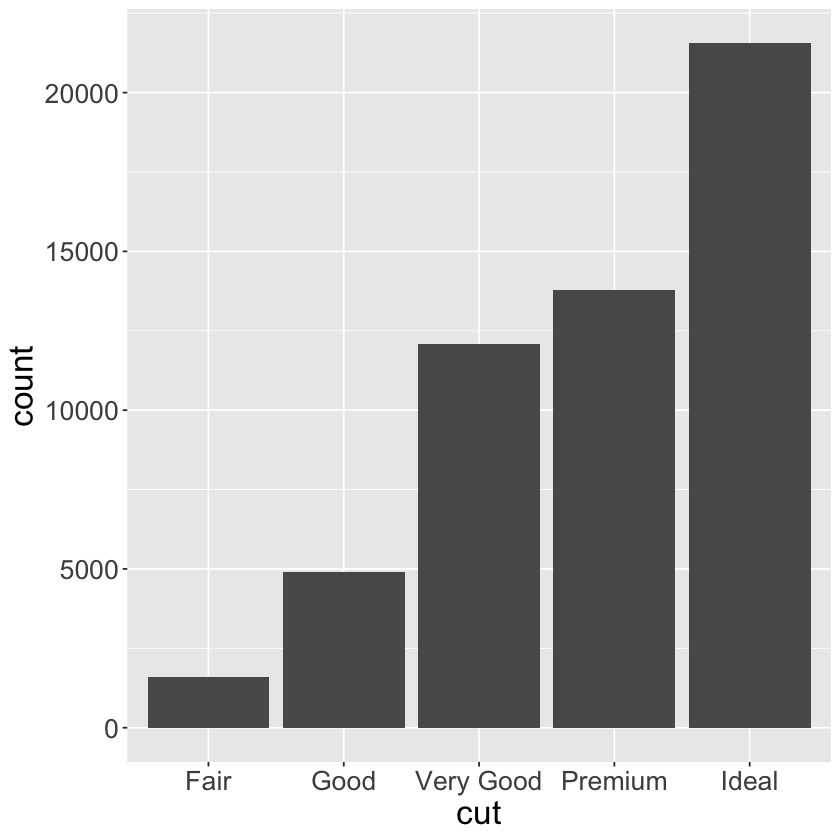

In [3]:
diamonds %>%
  count(cut)

ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut)) +
  theme(text = element_text(size = 20))

cut_width(x = carat, width = 0.5) n    
1  [-0.25,0.25]                        785
2  (0.25,0.75]                       29498
3  (0.75,1.25]                       15977
4  (1.25,1.75]                        5313
5  (1.75,2.25]                        2002
6  (2.25,2.75]                         322
7  (2.75,3.25]                          32
8  (3.25,3.75]                           5
9  (3.75,4.25]                           4
10 (4.25,4.75]                           1
11 (4.75,5.25]                           1

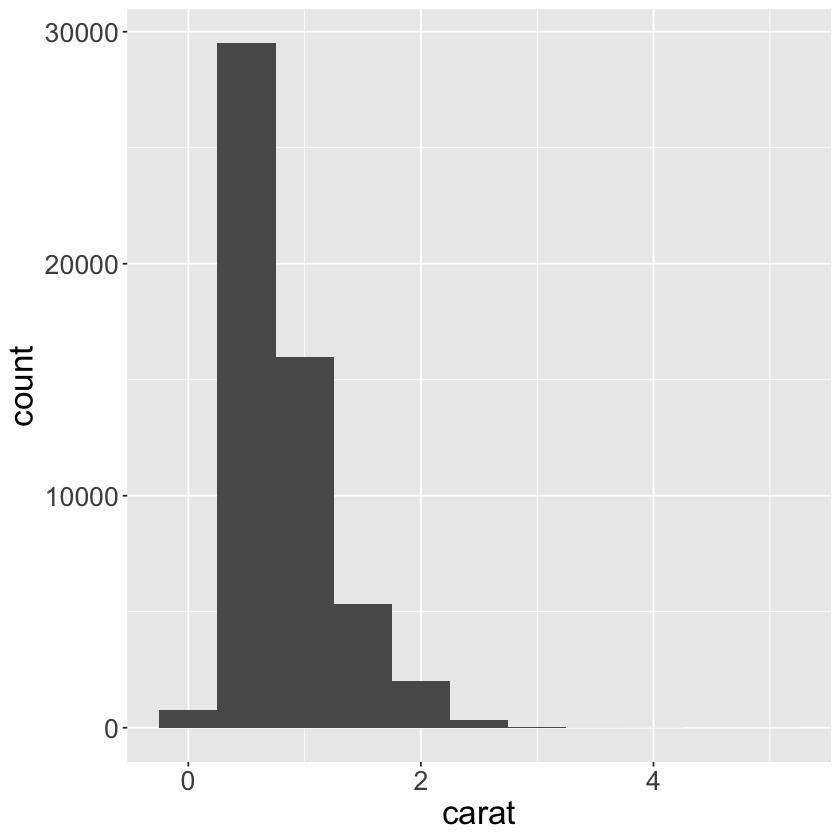

In [4]:
diamonds %>%
  count(cut_width(x = carat, width = 0.5))

ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = carat), binwidth = 0.5) +
  theme(text = element_text(size = 20))

cut_width(x = carat, width = 0.1) n    
1  [0.15,0.25]                         785
2  (0.25,0.35]                       10273
3  (0.35,0.45]                        6231
4  (0.45,0.55]                        5417
5  (0.55,0.65]                        2328
6  (0.65,0.75]                        5249
7  (0.75,0.85]                        1725
8  (0.85,0.95]                        2656
9  (0.95,1.05]                        6258
10 (1.05,1.15]                        2687
11 (1.15,1.25]                        2651
12 (1.25,1.35]                        1063
13 (1.35,1.45]                         325
14 (1.45,1.55]                        2556
15 (1.55,1.65]                         738
16 (1.65,1.75]                         631
17 (1.75,1.85]                         140
18 (1.85,1.95]                          57
19 (1.95,2.05]                        1173
20 (2.05,2.15]                         407
21 (2.15,2.25]                         225
22 (2.25,2.35]                         135
23 (2.35,2.45]                          69
24 (2.45,2.55]                          81
25 (2.55,2.65]                          21
26 (2.65,2.75]                          16
27 (2.75,2.85]                           3

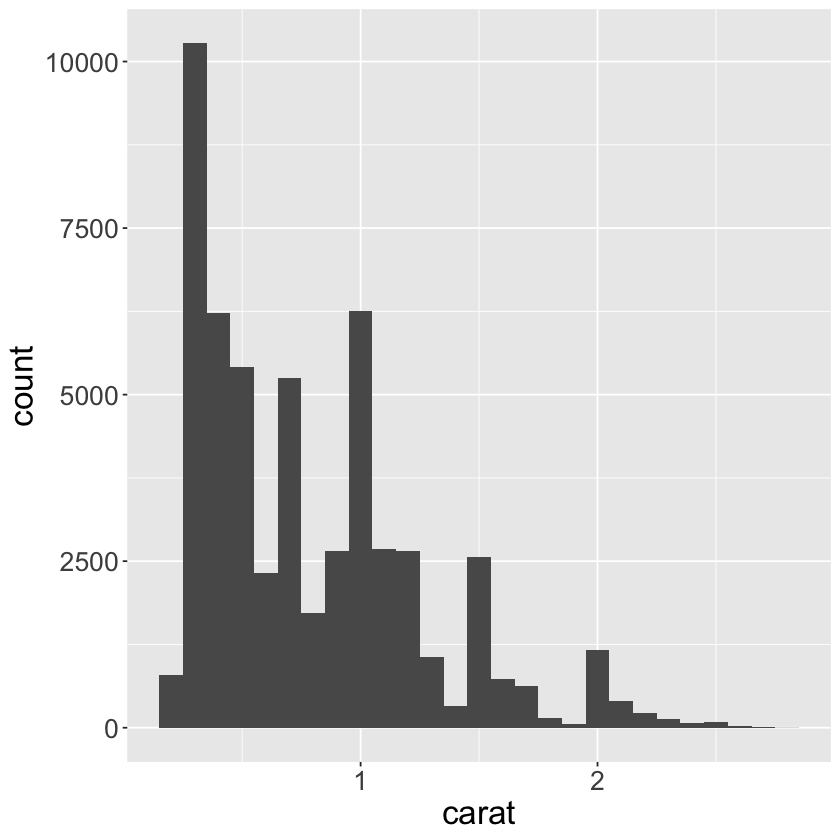

In [5]:
smaller <-
  diamonds %>%
    filter(carat < 3)

smaller %>%
  count(cut_width(x = carat, width = 0.1))

ggplot(data = smaller) +
  geom_histogram(mapping = aes(x = carat), binwidth = 0.1) +
  theme(text = element_text(size = 20))

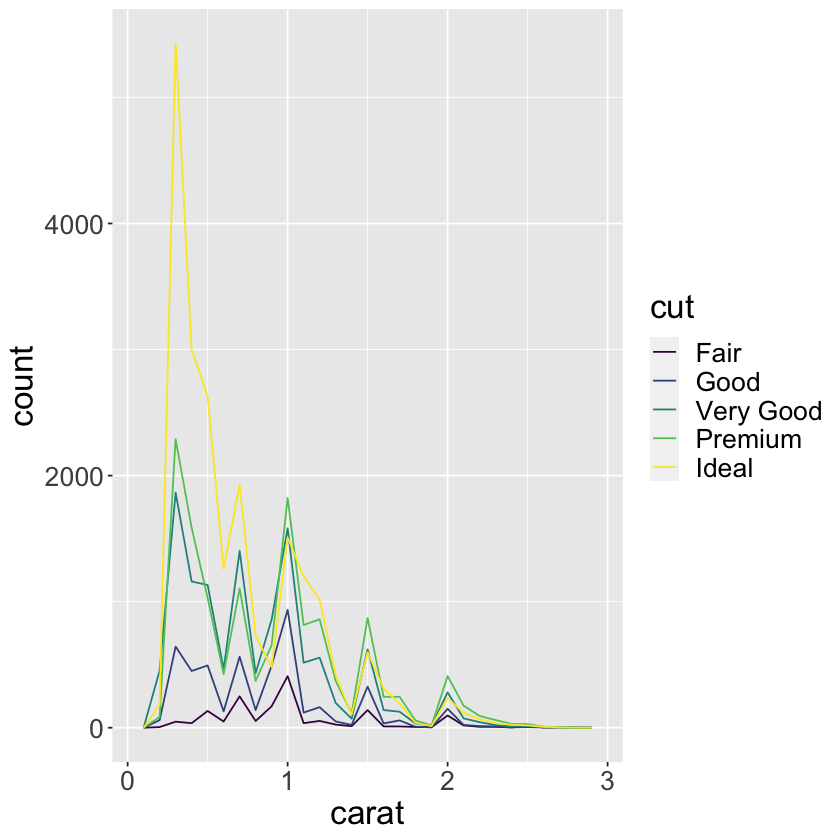

In [6]:
ggplot(data = smaller, mapping = aes(x = carat, color = cut)) +
  geom_freqpoly(binwidth = 0.1) +
  theme(text = element_text(size = 20))

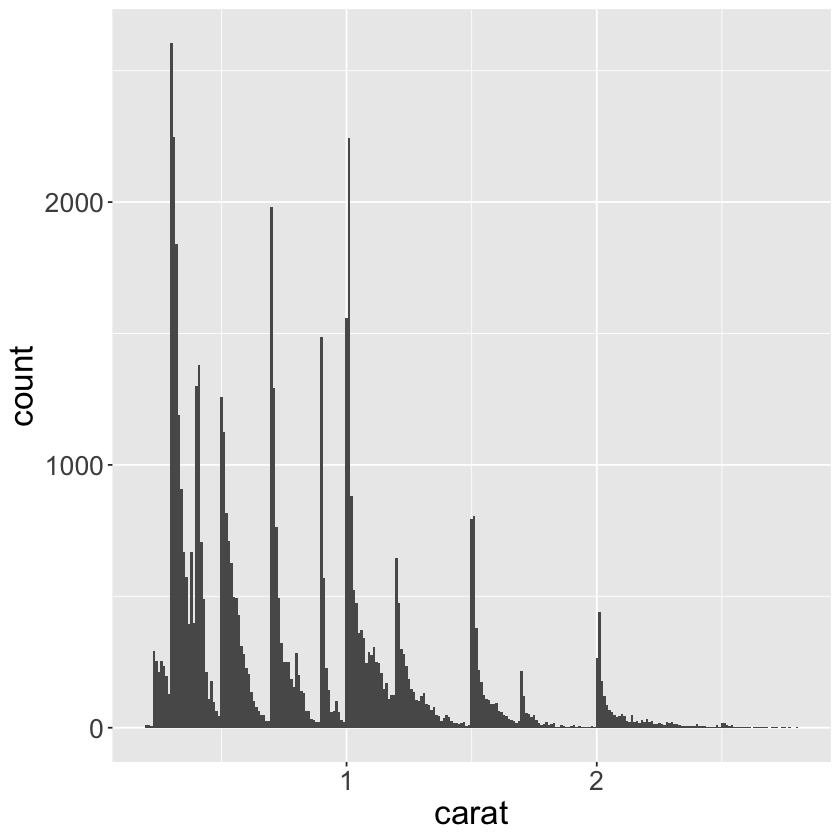

In [7]:
ggplot(data = smaller, mapping = aes(x = carat)) +
  geom_histogram(binwidth = 0.01) +
  theme(text = element_text(size = 20))

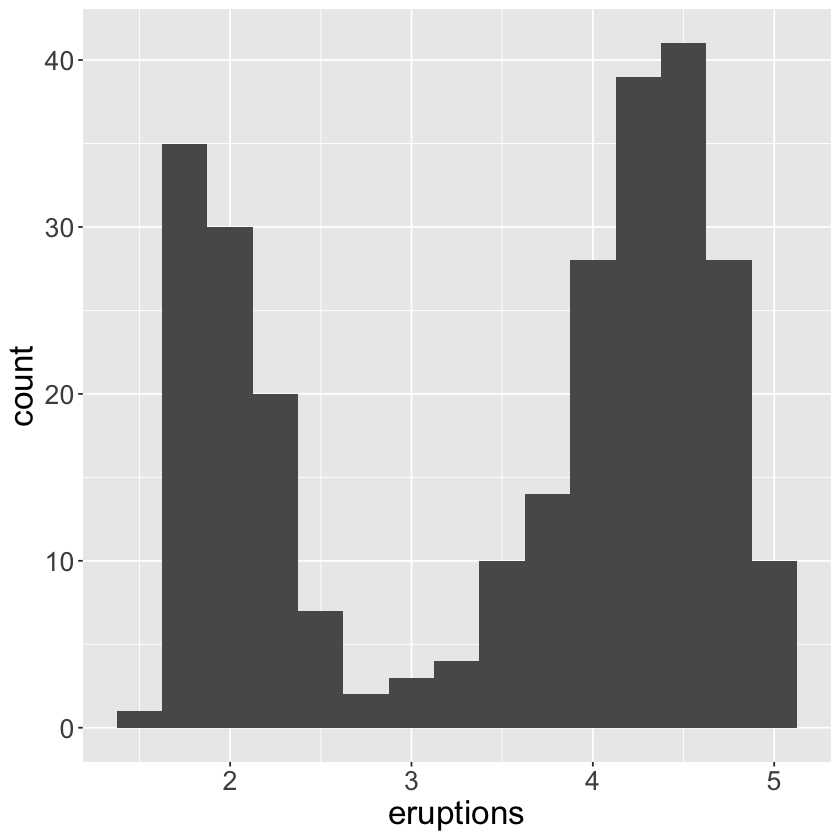

In [8]:
ggplot(data = faithful, mapping = aes(x = eruptions)) +
  geom_histogram(binwidth = 0.25) +
  theme(text = element_text(size = 20))

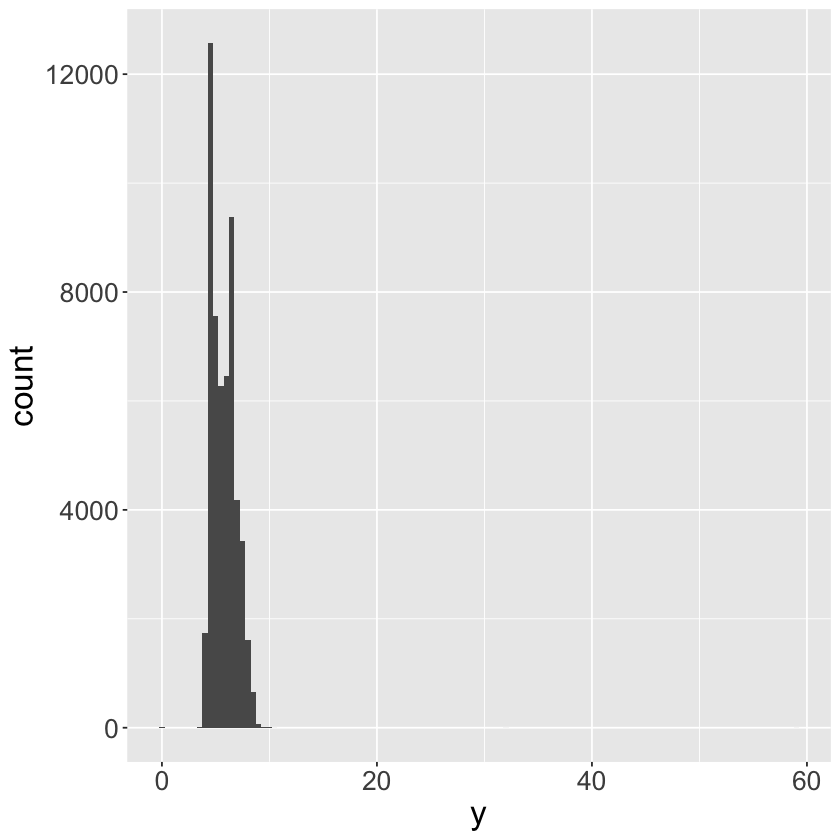

In [9]:
ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = y), binwidth = 0.5) +
  theme(text = element_text(size = 20))

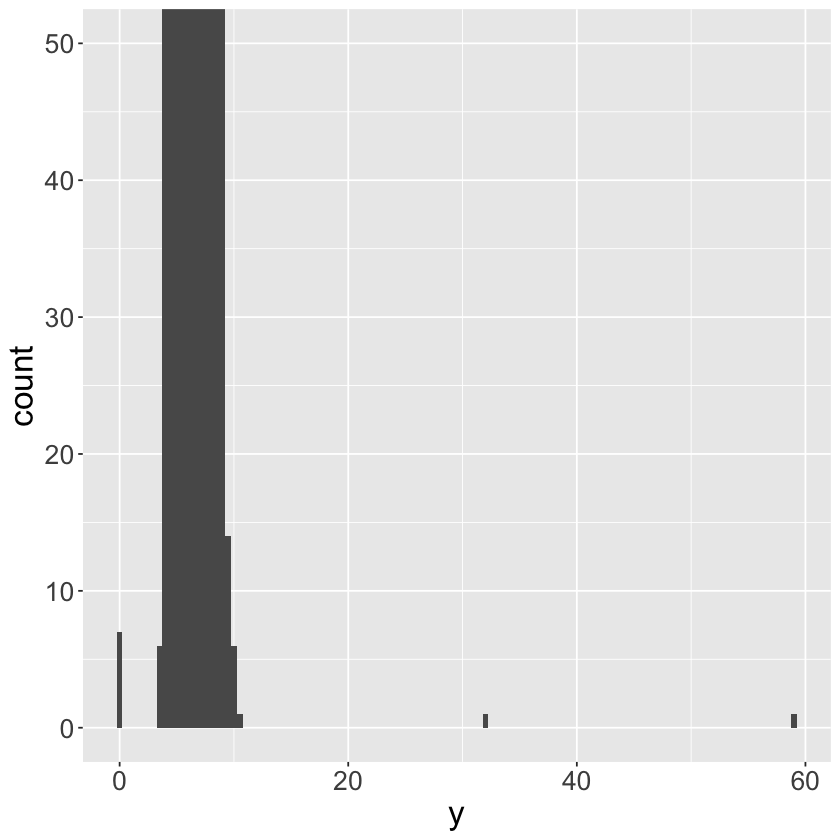

In [10]:
ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = y), binwidth = 0.5) +
  coord_cartesian(ylim = c(0, 50)) +
  theme(text = element_text(size = 20))

In [11]:
unusual <-
  diamonds %>%
    filter(y < 3 | y > 20) %>%
    select(price, x, y, z) %>%
    arrange(y)
unusual

price x    y    z   
1  5139 0.00  0.0 0.00
2  6381 0.00  0.0 0.00
3 12800 0.00  0.0 0.00
4 15686 0.00  0.0 0.00
5 18034 0.00  0.0 0.00
6  2130 0.00  0.0 0.00
7  2130 0.00  0.0 0.00
8  2075 5.15 31.8 5.12
9 12210 8.09 58.9 8.06

### 7.4 - Missing values

#### Drop the unusual values

In [12]:
diamonds2 <-
  diamonds %>%
    filter(between(x = y, left = 3, right = 20))
head(x = diamonds2)

carat cut       color clarity depth table price x    y    z   
1 0.23  Ideal     E     SI2     61.5  55    326   3.95 3.98 2.43
2 0.21  Premium   E     SI1     59.8  61    326   3.89 3.84 2.31
3 0.23  Good      E     VS1     56.9  65    327   4.05 4.07 2.31
4 0.29  Premium   I     VS2     62.4  58    334   4.20 4.23 2.63
5 0.31  Good      J     SI2     63.3  58    335   4.34 4.35 2.75
6 0.24  Very Good J     VVS2    62.8  57    336   3.94 3.96 2.48

#### Replace the unusual values with missing values

In [13]:
diamonds2 <-
  diamonds %>%
    mutate(y = ifelse(test = y < 3 | y > 20, yes = NA, no = y))
head(x = diamonds2)

carat cut       color clarity depth table price x    y    z   
1 0.23  Ideal     E     SI2     61.5  55    326   3.95 3.98 2.43
2 0.21  Premium   E     SI1     59.8  61    326   3.89 3.84 2.31
3 0.23  Good      E     VS1     56.9  65    327   4.05 4.07 2.31
4 0.29  Premium   I     VS2     62.4  58    334   4.20 4.23 2.63
5 0.31  Good      J     SI2     63.3  58    335   4.34 4.35 2.75
6 0.24  Very Good J     VVS2    62.8  57    336   3.94 3.96 2.48

In [14]:
diamonds2 <-
  diamonds %>%
    mutate(y = case_when(y >= 3 & y <= 20 ~ y, .default = NA))
head(x = diamonds2)

carat cut       color clarity depth table price x    y    z   
1 0.23  Ideal     E     SI2     61.5  55    326   3.95 3.98 2.43
2 0.21  Premium   E     SI1     59.8  61    326   3.89 3.84 2.31
3 0.23  Good      E     VS1     56.9  65    327   4.05 4.07 2.31
4 0.29  Premium   I     VS2     62.4  58    334   4.20 4.23 2.63
5 0.31  Good      J     SI2     63.3  58    335   4.34 4.35 2.75
6 0.24  Very Good J     VVS2    62.8  57    336   3.94 3.96 2.48

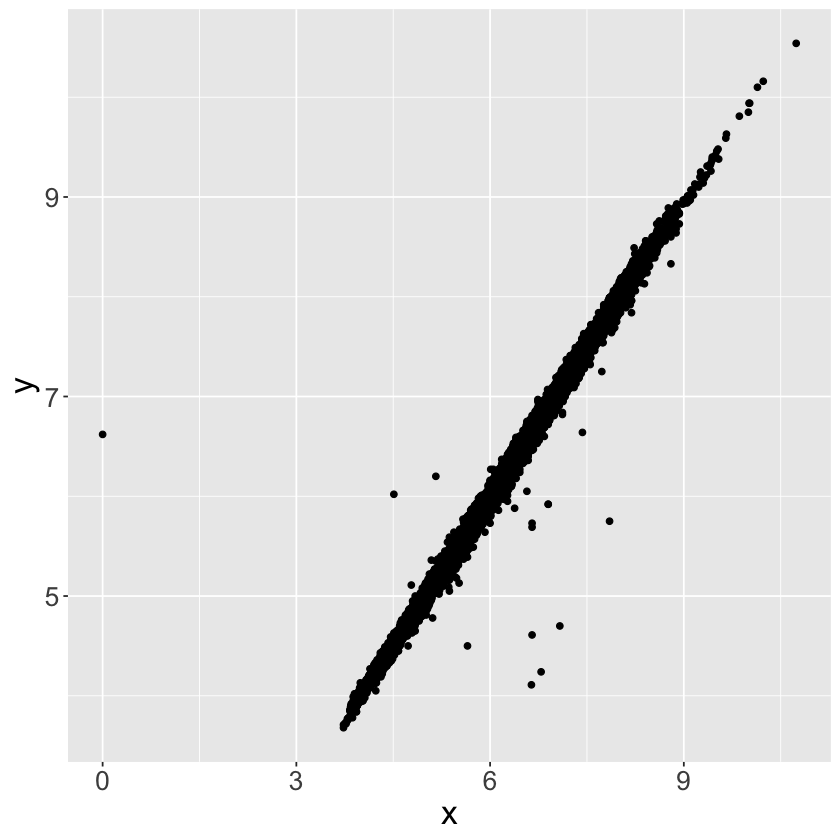

In [15]:
ggplot(data = diamonds2, mapping = aes(x = x, y = y)) +
  geom_point(na.rm = TRUE) +
  theme(text = element_text(size = 20))

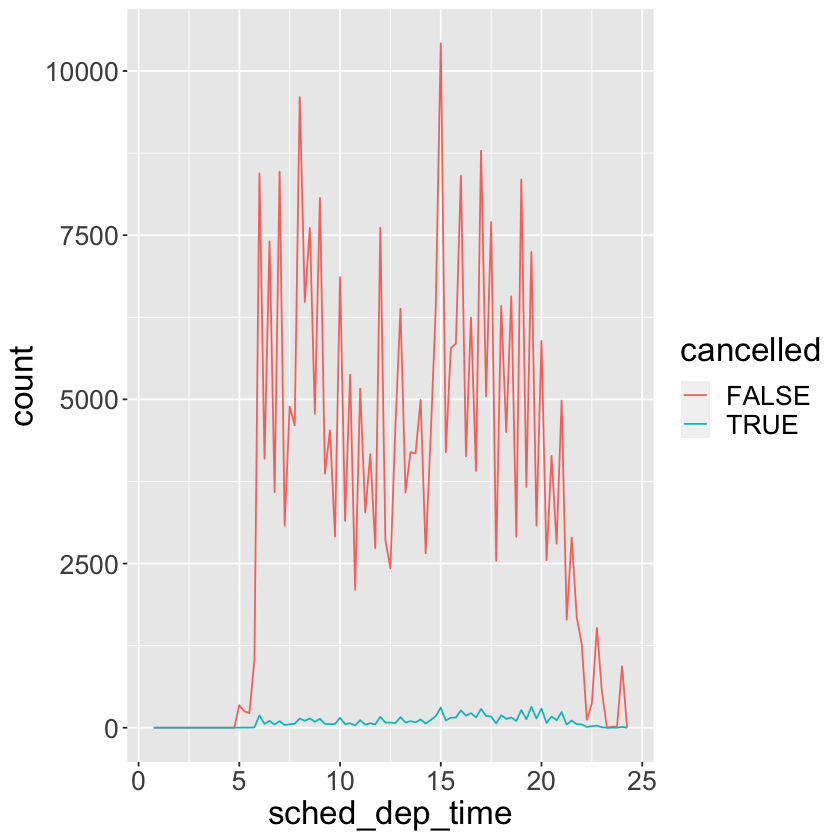

In [16]:
nycflights13::flights %>%
  mutate(
    cancelled      = is.na(dep_time),
    sched_hour     = sched_dep_time %/% 100,
    sched_min      = sched_dep_time %%  100,
    sched_dep_time = sched_hour + sched_min / 60
  ) %>%
    ggplot(mapping = aes(sched_dep_time)) +
      geom_freqpoly(mapping = aes(color = cancelled), binwidth = 1/4) +
      theme(text = element_text(size = 20))

### 7.5 - Covariation

#### 7.5.1 - One categorical variable and one continuous variable

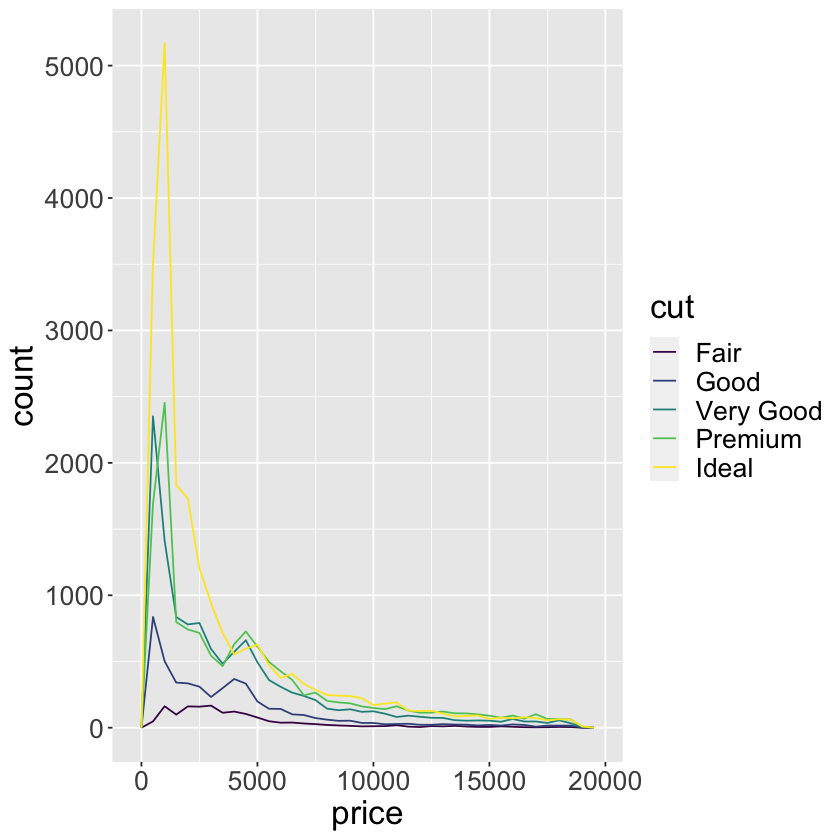

In [17]:
ggplot(data = diamonds, mapping = aes(x = price)) +
  geom_freqpoly(mapping = aes(color = cut), binwidth = 500) +
  theme(text = element_text(size = 20))

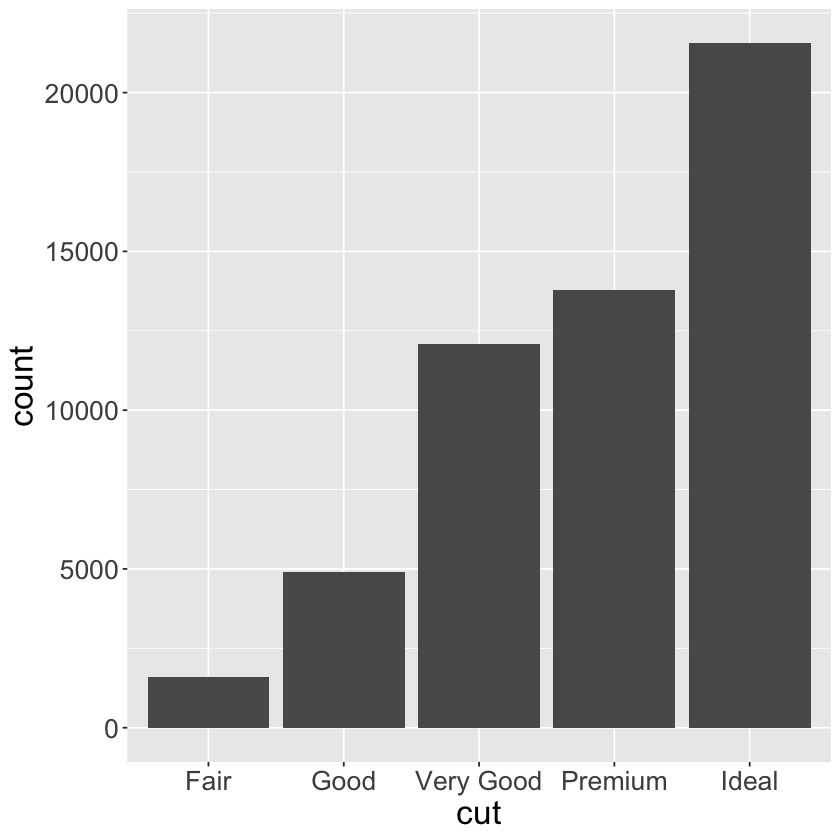

In [18]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut)) +
  theme(text = element_text(size = 20))

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
i Please use `after_stat(density)` instead."


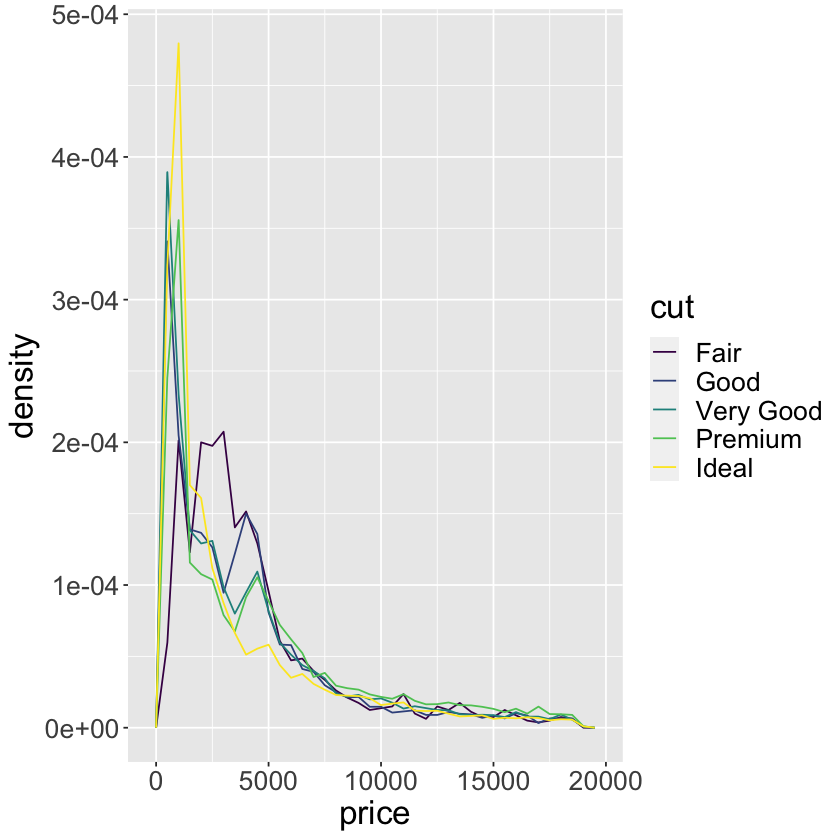

In [19]:
ggplot(data = diamonds, mapping = aes(x = price, y = ..density..)) +
  geom_freqpoly(mapping = aes(color = cut), binwidth = 500) +
  theme(text = element_text(size = 20))

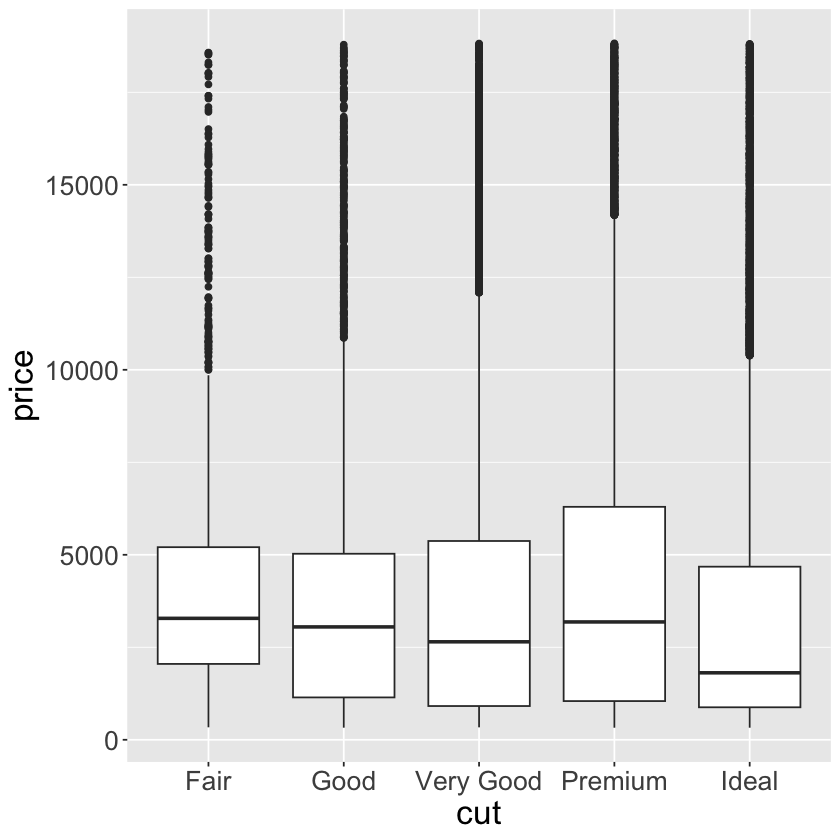

In [20]:
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  geom_boxplot() +
  theme(text = element_text(size = 20))

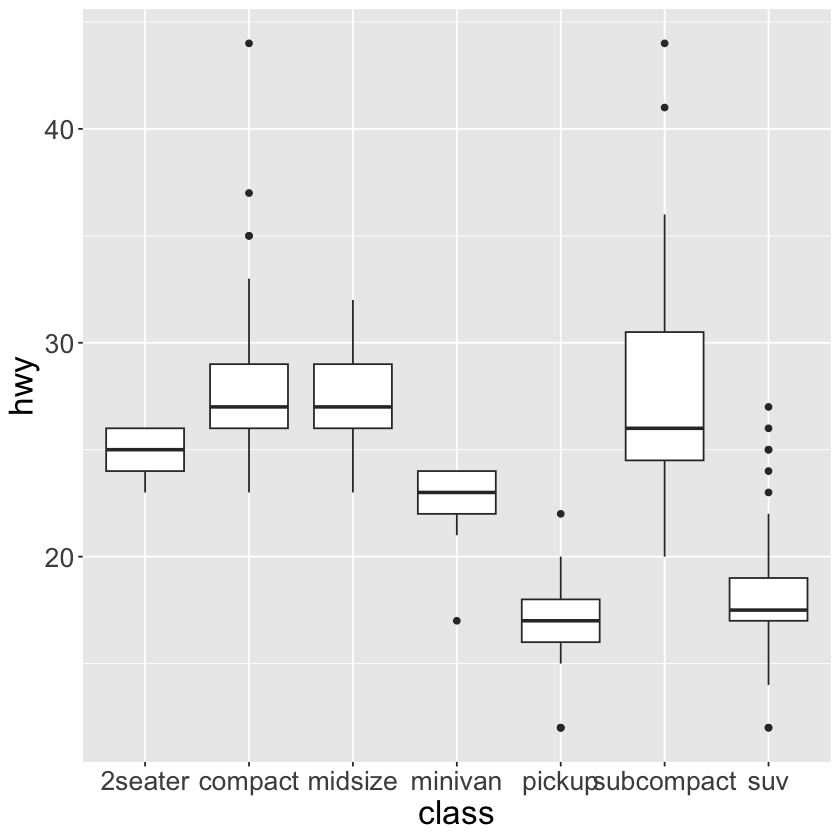

In [21]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_boxplot() +
  theme(text = element_text(size = 20))

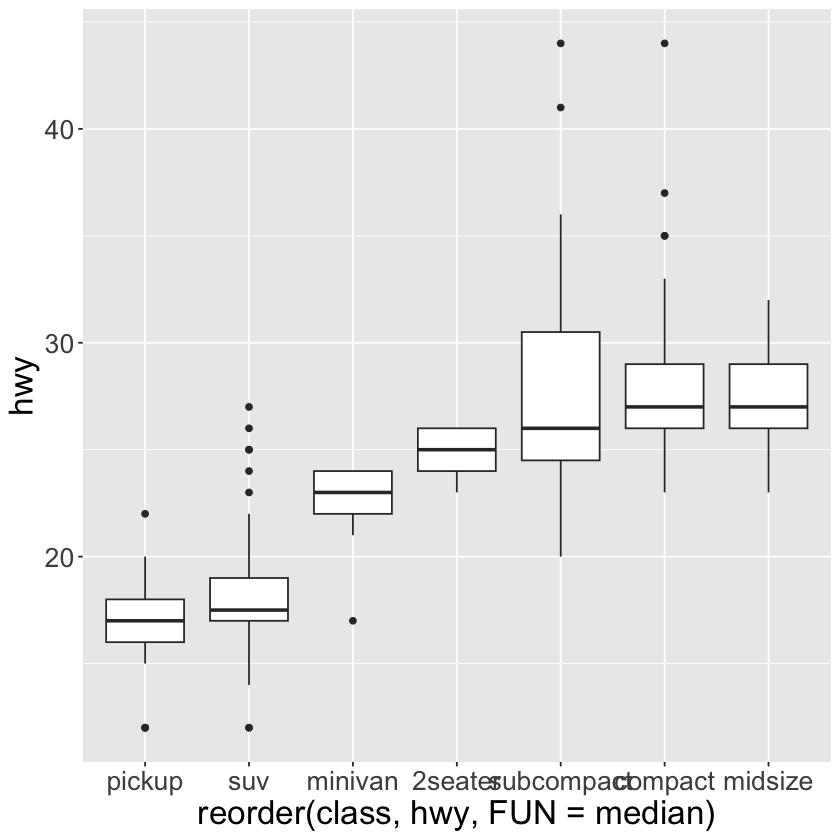

In [22]:
ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = reorder(class, hwy, FUN = median), y = hwy)) +
  theme(text = element_text(size = 20))

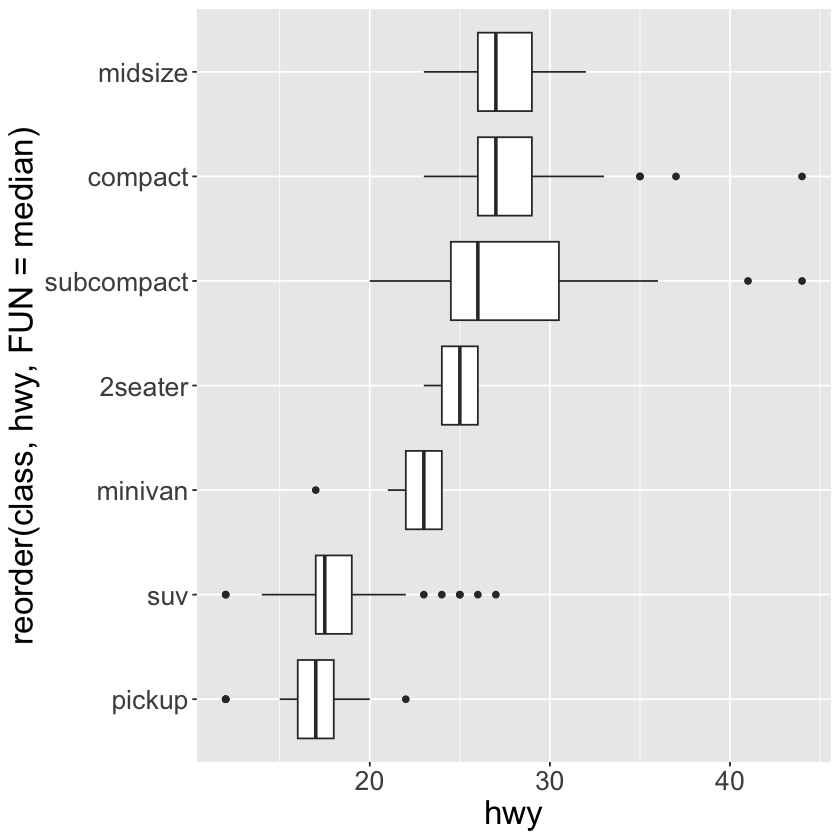

In [23]:
ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = reorder(class, hwy, FUN = median), y = hwy)) +
  coord_flip() +
  theme(text = element_text(size = 20))

#### 7.5.2 - Two categorical variables

color cut       n   
1  D     Fair       163
2  D     Good       662
3  D     Very Good 1513
4  D     Premium   1603
5  D     Ideal     2834
6  E     Fair       224
7  E     Good       933
8  E     Very Good 2400
9  E     Premium   2337
10 E     Ideal     3903
11 F     Fair       312
12 F     Good       909
13 F     Very Good 2164
14 F     Premium   2331
15 F     Ideal     3826
16 G     Fair       314
17 G     Good       871
18 G     Very Good 2299
19 G     Premium   2924
20 G     Ideal     4884
21 H     Fair       303
22 H     Good       702
23 H     Very Good 1824
24 H     Premium   2360
25 H     Ideal     3115
26 I     Fair       175
27 I     Good       522
28 I     Very Good 1204
29 I     Premium   1428
30 I     Ideal     2093
31 J     Fair       119
32 J     Good       307
33 J     Very Good  678
34 J     Premium    808
35 J     Ideal      896

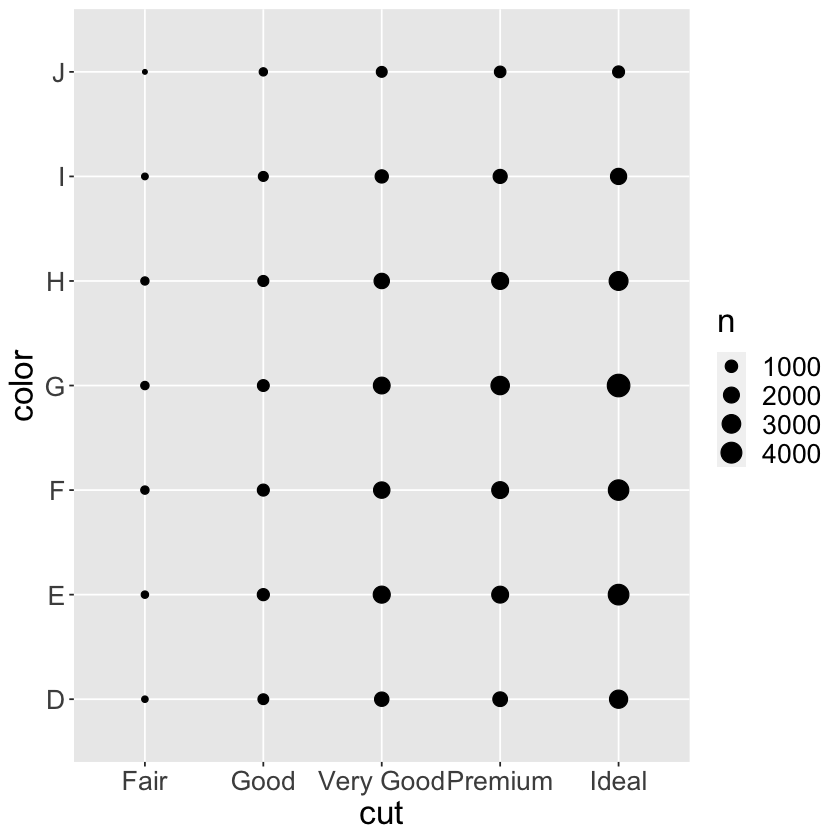

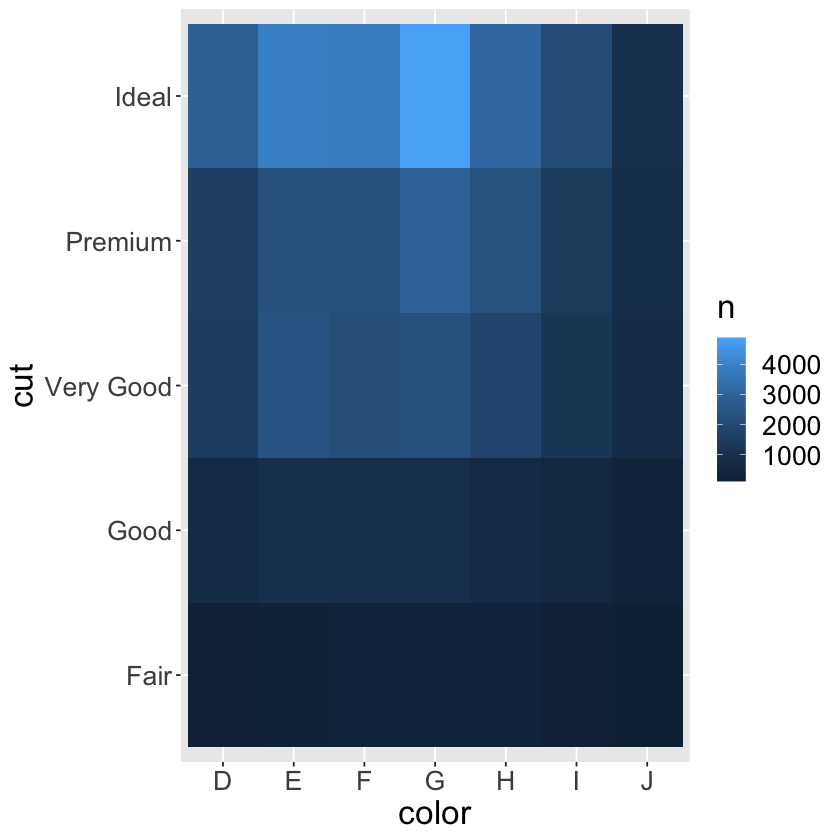

In [24]:
# to visualize the covariation between categorical variables, count the number of observations for each combination
# one way to do this is to rely on the builtin `geom_count()`
# another approach is to compute the count with dplyr, and then visualize with `geom_tile()` and the fill aesthetic
# the size of each circle in the plot displays how many observations occurred at each combination of values
# covariation will appear as a strong correlation between specific x values and specific y values
# if the categorical variables are unordered, use the seriation package to simultaneously reorder the rows and columns in order to more clearly reveal interesting patterns
# for larger plots, try the d3heatmap or heatmaply packages, which create interactive plots

ggplot(data = diamonds) +
  geom_count(mapping = aes(x = cut, y = color)) +
  theme(text = element_text(size = 20))

diamonds %>%
  count(color, cut)

diamonds %>%
  count(color, cut) %>%
  ggplot(mapping = aes(x = color, y = cut)) +
    geom_tile(mapping = aes(fill = n)) +
    theme(text = element_text(size = 20))

#### 7.5.3 - Two continuous variables

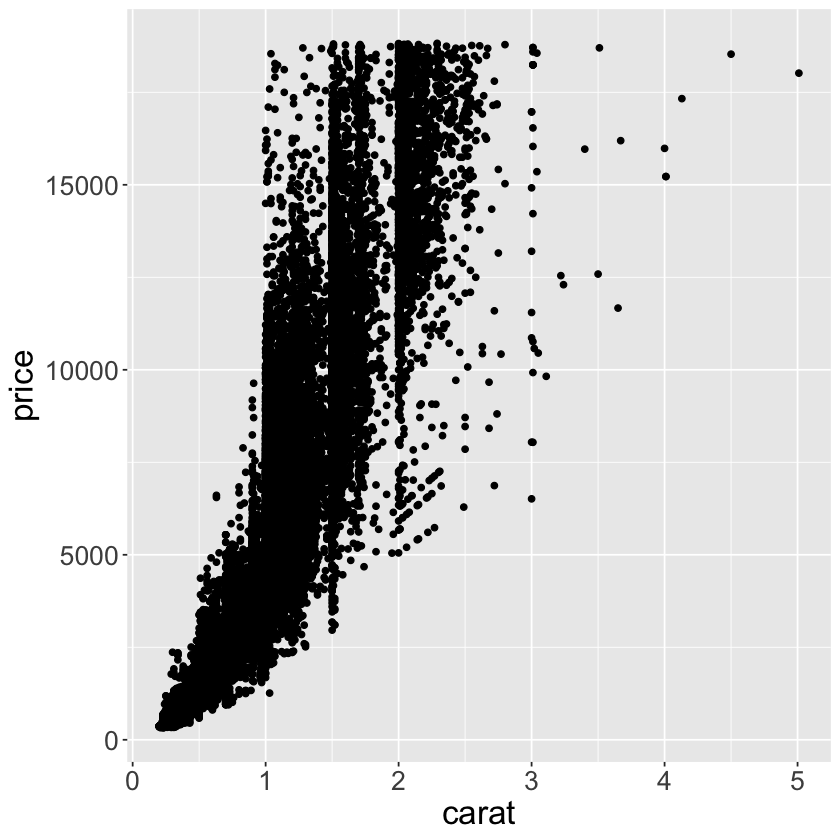

In [25]:
# one way to visualize the covariation between two continuous variables is to draw a scatterplot with `geom_point()`
# covariation can be seen as a pattern in the points
# for example, an expontential relationship between carat size and price of a diamond can be seen

ggplot(data = diamonds) +
  geom_point(mapping = aes(x = carat, y = price)) +
  theme(text = element_text(size = 20))

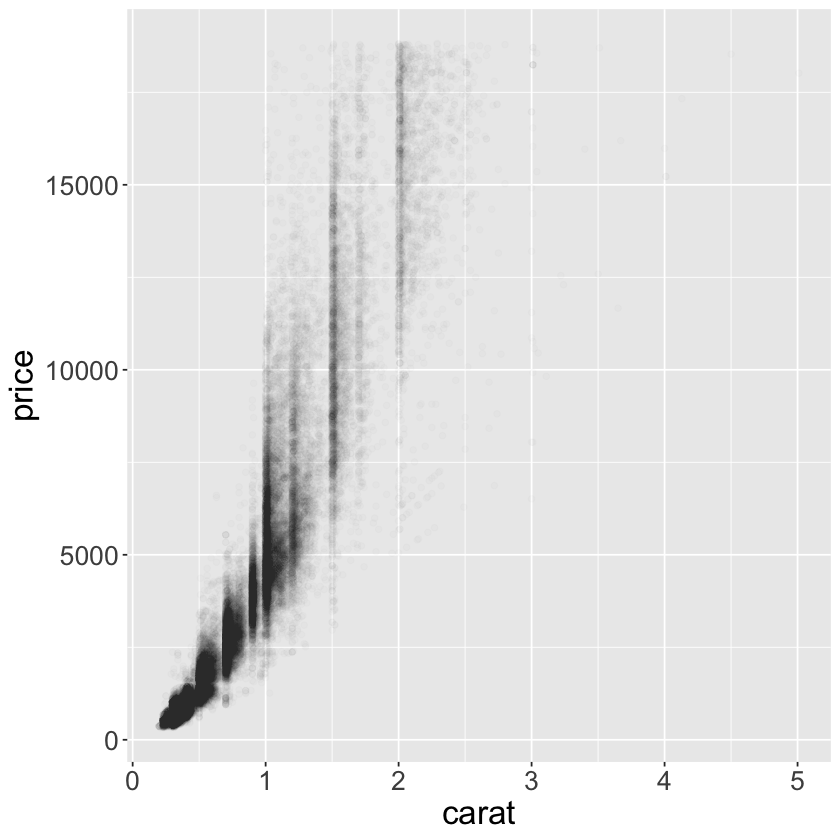

In [26]:
ggplot(data = diamonds) +
  geom_point(mapping = aes(x = carat, y = price), alpha = 1/100) +
  theme(text = element_text(size = 20))

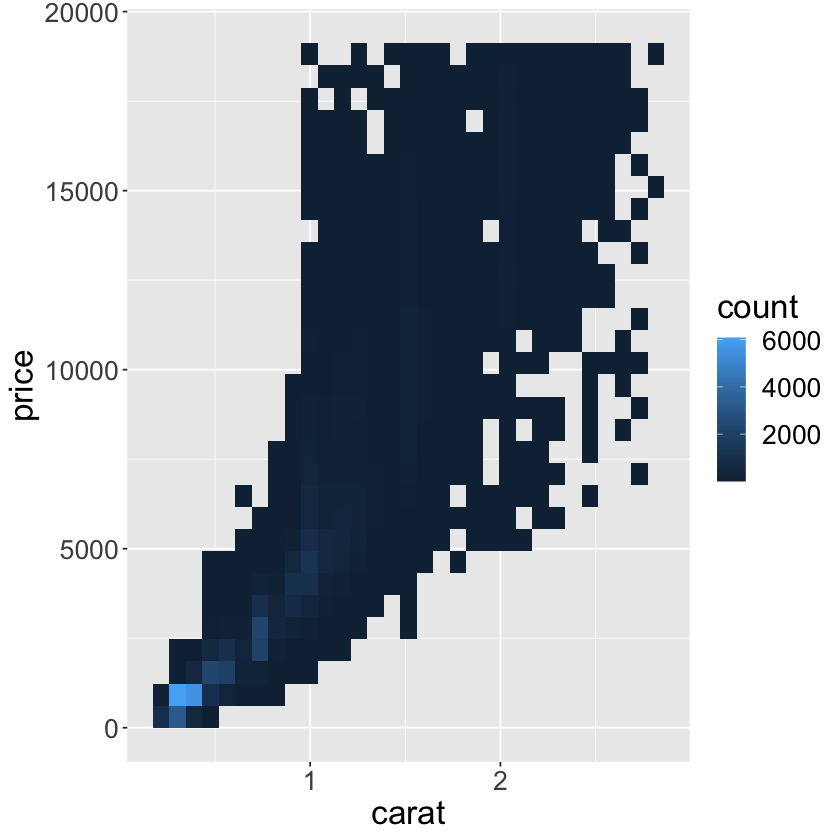

In [27]:
ggplot(data = smaller) +
  geom_bin2d(mapping = aes(x = carat, y = price)) +
  theme(text = element_text(size = 20))

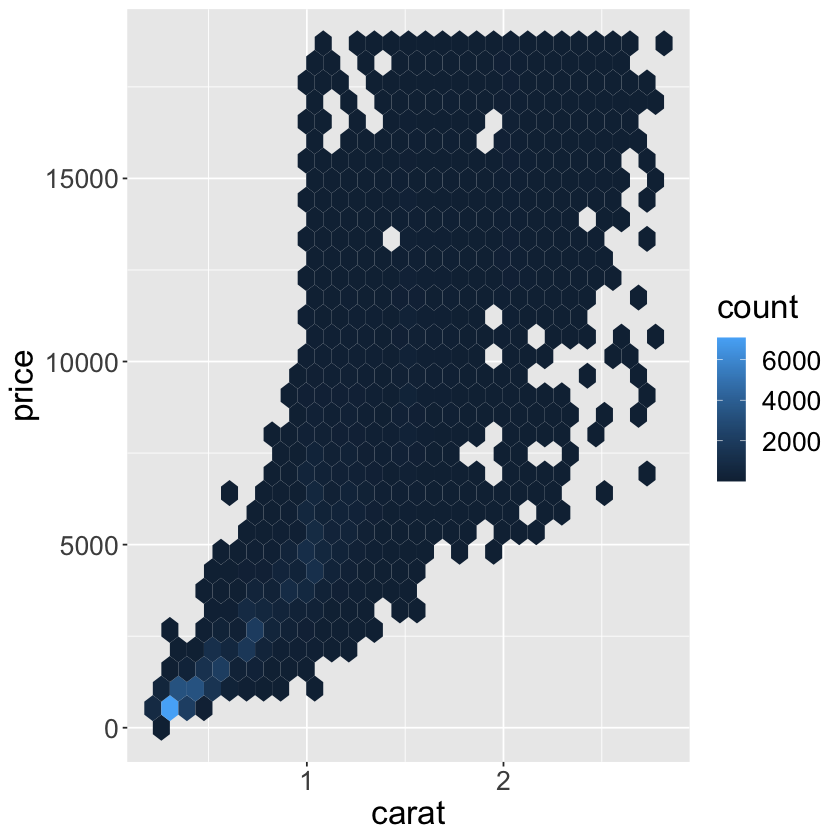

In [28]:
ggplot(data = smaller) +
  geom_hex(mapping = aes(x = carat, y = price)) +
  theme(text = element_text(size = 20))

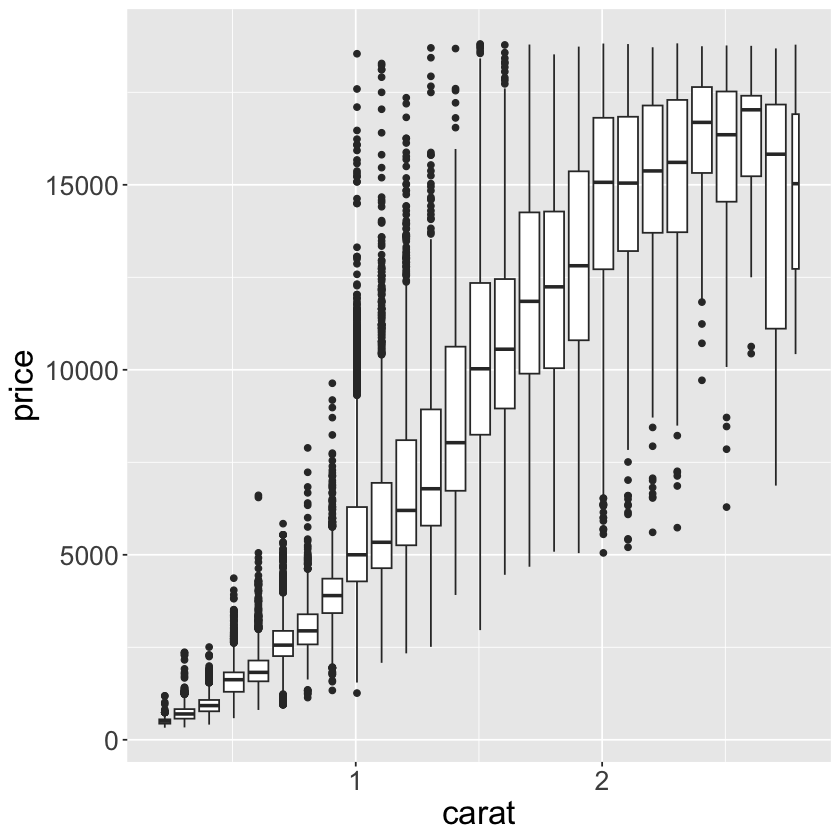

In [30]:
ggplot(data = smaller, mapping = aes(x = carat, y = price)) +
  geom_boxplot(mapping = aes(group = cut_width(x = carat, width = 0.1))) +
  theme(text = element_text(size = 20))

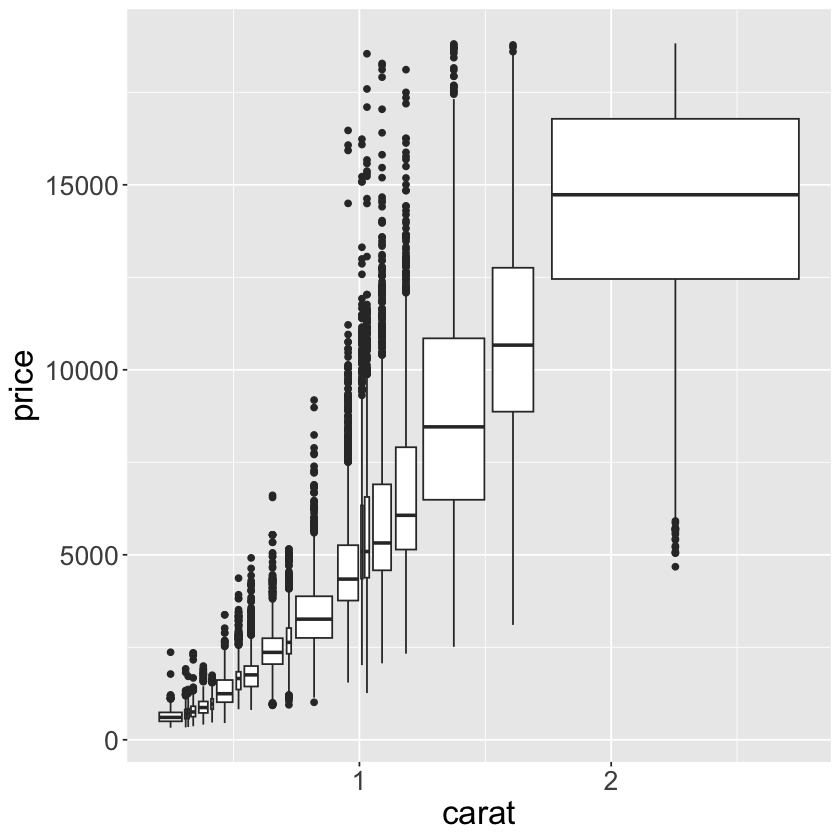

In [36]:
ggplot(data = smaller, mapping = aes(x = carat, y = price)) +
  geom_boxplot(mapping = aes(group = cut_number(x = carat, n = 20))) +
  theme(text = element_text(size = 20))

### 7.6 - Patterns and models

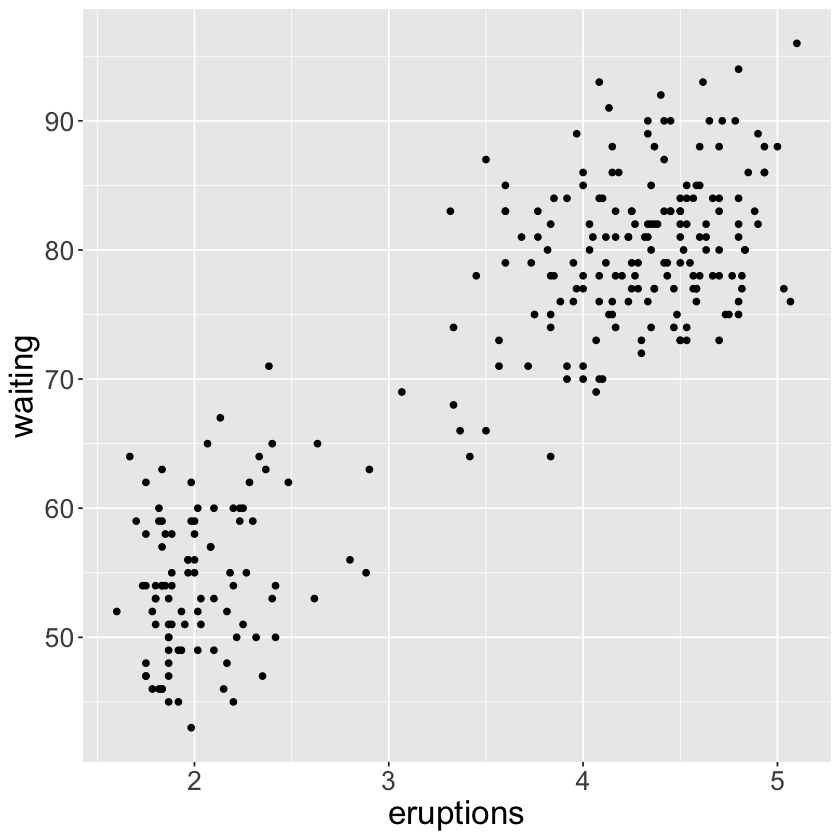

In [37]:
ggplot(data = faithful) +
  geom_point(mapping = aes(x = eruptions, y = waiting)) +
  theme(text = element_text(size = 20))

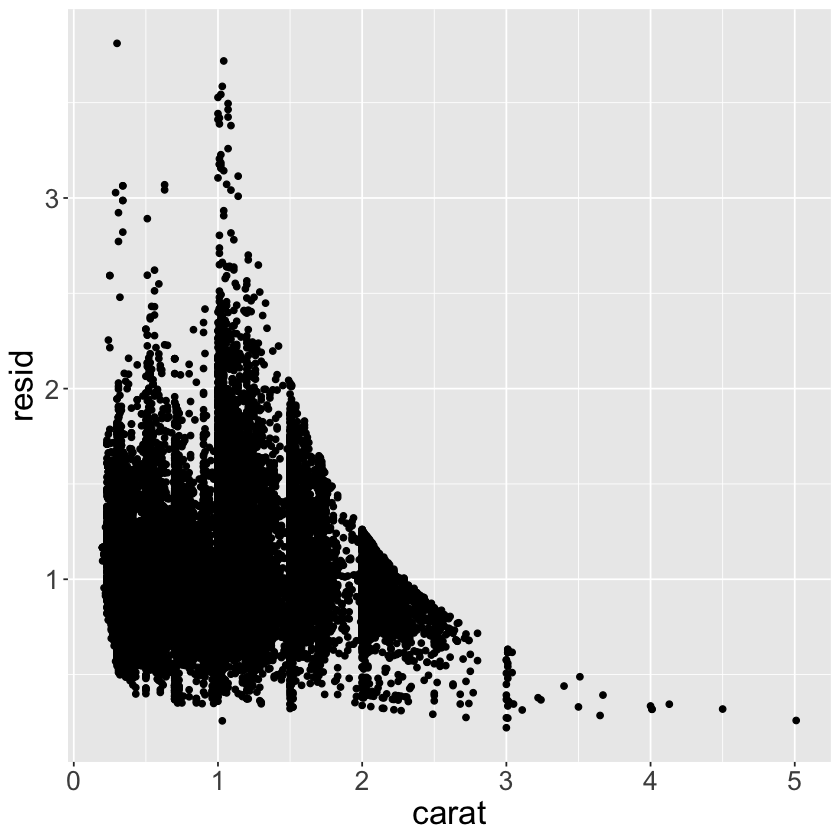

In [50]:
mod <- lm(formula = log(x = price) ~ log(x = carat), data = diamonds)

diamonds2 <-
  diamonds %>%
    add_residuals(model = mod) %>%
    mutate(resid = exp(x = resid))

ggplot(data = diamonds2) +
  geom_point(mapping = aes(x = carat, y = resid)) +
  theme(text = element_text(size = 20))

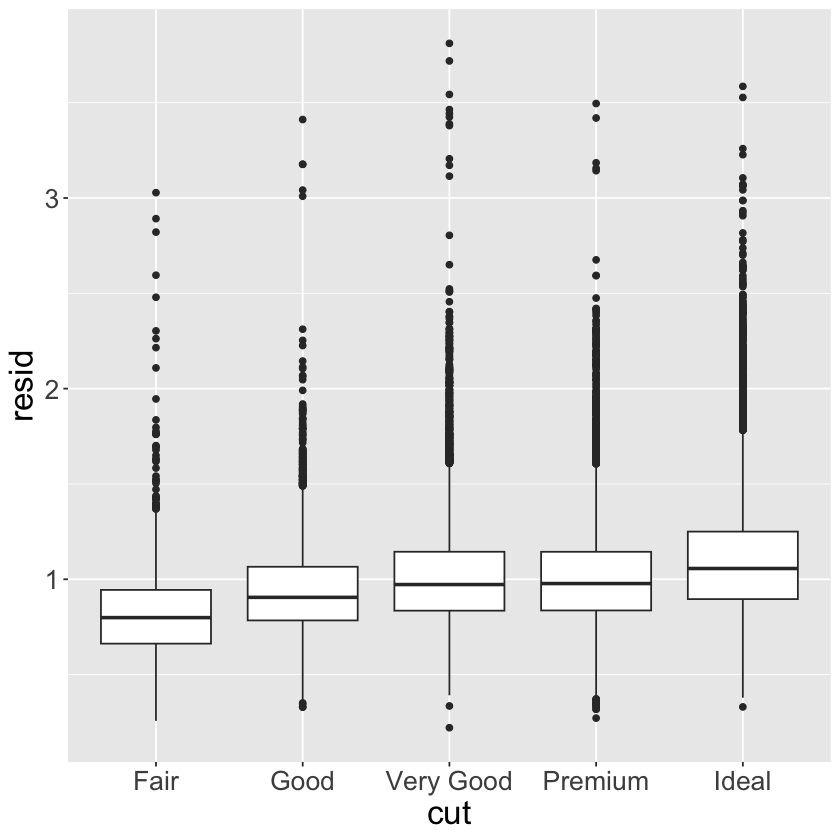

In [51]:
ggplot(data = diamonds2) +
  geom_boxplot(mapping = aes(x = cut, y = resid)) +
  theme(text = element_text(size = 20))

---

## 12 - Tidy Data

In [15]:
table1
table2
table3
table4a
table4b

country     year cases  population
1 Afghanistan 1999    745   19987071
2 Afghanistan 2000   2666   20595360
3 Brazil      1999  37737  172006362
4 Brazil      2000  80488  174504898
5 China       1999 212258 1272915272
6 China       2000 213766 1280428583

country     year type       count     
1  Afghanistan 1999 cases             745
2  Afghanistan 1999 population   19987071
3  Afghanistan 2000 cases            2666
4  Afghanistan 2000 population   20595360
5  Brazil      1999 cases           37737
6  Brazil      1999 population  172006362
7  Brazil      2000 cases           80488
8  Brazil      2000 population  174504898
9  China       1999 cases          212258
10 China       1999 population 1272915272
11 China       2000 cases          213766
12 China       2000 population 1280428583

country     year rate             
1 Afghanistan 1999 745/19987071     
2 Afghanistan 2000 2666/20595360    
3 Brazil      1999 37737/172006362  
4 Brazil      2000 80488/174504898  
5 China       1999 212258/1272915272
6 China       2000 213766/1280428583

country     1999   2000  
1 Afghanistan    745   2666
2 Brazil       37737  80488
3 China       212258 213766

country     1999       2000      
1 Afghanistan   19987071   20595360
2 Brazil       172006362  174504898
3 China       1272915272 1280428583

country     year cases  population rate    
1 Afghanistan 1999    745   19987071 0.372741
2 Afghanistan 2000   2666   20595360 1.294466
3 Brazil      1999  37737  172006362 2.193930
4 Brazil      2000  80488  174504898 4.612363
5 China       1999 212258 1272915272 1.667495
6 China       2000 213766 1280428583 1.669488

year n     
1 1999 250740
2 2000 296920

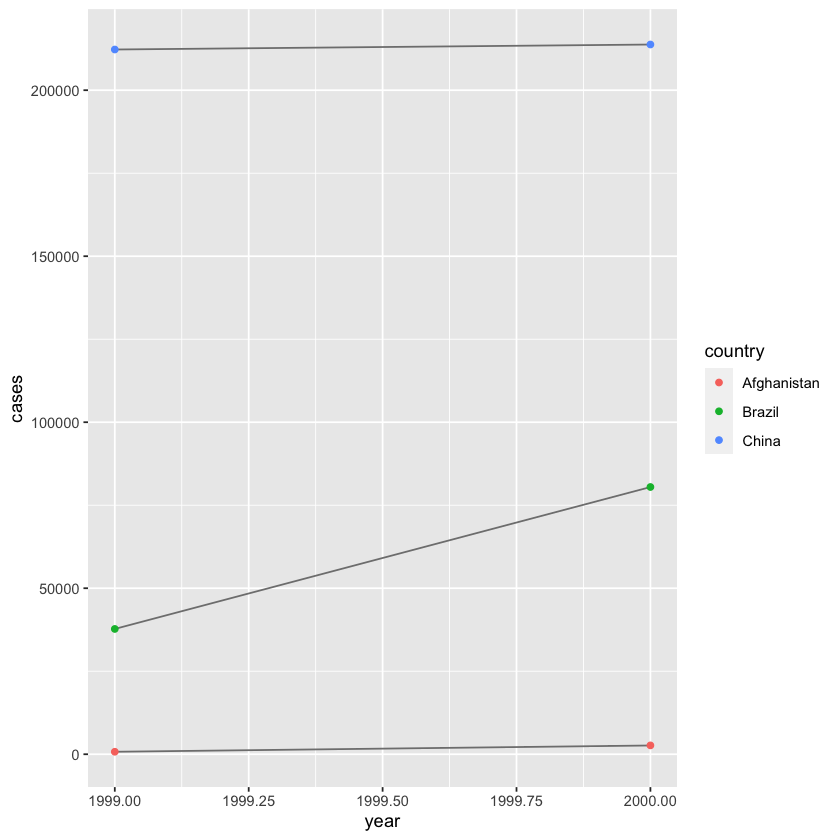

In [5]:
# Compute rate per 10,000
table1 %>%
  mutate(rate = cases / population * 10000)

# Compute cases per year
table1 %>%
  count(year, wt = cases)

# Visualize changes over time
ggplot(table1, aes(year, cases)) +
  geom_line(aes(group = country), color = "grey50") +
  geom_point(aes(color = country))

In [16]:
table4a
table4a %>%
  pivot_longer(c(`1999`,`2000`),names_to='year',values_to='cases')
table4b
table4b %>%
  pivot_longer(c(`1999`,`2000`),names_to='year',values_to='population')
tidy4a <- table4a %>%
  pivot_longer(c(`1999`,`2000`),names_to='year',values_to='cases')
tidy4b <- table4b %>%
  pivot_longer(c(`1999`,`2000`),names_to='year',values_to='population')
left_join(tidy4a,tidy4b)

country     1999   2000  
1 Afghanistan    745   2666
2 Brazil       37737  80488
3 China       212258 213766

country     year cases 
1 Afghanistan 1999    745
2 Afghanistan 2000   2666
3 Brazil      1999  37737
4 Brazil      2000  80488
5 China       1999 212258
6 China       2000 213766

country     1999       2000      
1 Afghanistan   19987071   20595360
2 Brazil       172006362  174504898
3 China       1272915272 1280428583

country     year population
1 Afghanistan 1999   19987071
2 Afghanistan 2000   20595360
3 Brazil      1999  172006362
4 Brazil      2000  174504898
5 China       1999 1272915272
6 China       2000 1280428583

Joining with `by = join_by(country, year)`


country     year cases  population
1 Afghanistan 1999    745   19987071
2 Afghanistan 2000   2666   20595360
3 Brazil      1999  37737  172006362
4 Brazil      2000  80488  174504898
5 China       1999 212258 1272915272
6 China       2000 213766 1280428583

---

## 13 - Relational data

In [11]:
# tibble `flights` connects to tibble `planes`   via variable  `tailnum`
# tibble `flights` connects to tibble `airlines` via variable  `carrier`
# tibble `flights` connects to tibble `airports` via variables `origin` and `dest`
# tibble `flights` connects to tibble `weather`  via variables `origin`, `year`, `month`, `day`, and `hour`

data(package = 'nycflights13')

Data sets in package ‘nycflights13’:

airlines                Airline names.
airports                Airport metadata
flights                 Flights data
planes                  Plane metadata.
weather                 Hourly weather data

In [4]:
# tibble `airlines` looks up the full carrier name from its abbreviated code
head(x = nycflights13::airlines, n = 6)

carrier name                    
1 9E      Endeavor Air Inc.       
2 AA      American Airlines Inc.  
3 AS      Alaska Airlines Inc.    
4 B6      JetBlue Airways         
5 DL      Delta Air Lines Inc.    
6 EV      ExpressJet Airlines Inc.

In [5]:
# tibble `airports` gives info about each airport each of which is identified by the faa airport code
head(x = nycflights13::airports, n = 6)

faa name                           lat      lon       alt  tz dst
1 04G Lansdowne Airport              41.13047 -80.61958 1044 -5 A  
2 06A Moton Field Municipal Airport  32.46057 -85.68003  264 -6 A  
3 06C Schaumburg Regional            41.98934 -88.10124  801 -6 A  
4 06N Randall Airport                41.43191 -74.39156  523 -5 A  
5 09J Jekyll Island Airport          31.07447 -81.42778   11 -5 A  
6 0A9 Elizabethton Municipal Airport 36.37122 -82.17342 1593 -5 A  
  tzone           
1 America/New_York
2 America/Chicago 
3 America/Chicago 
4 America/New_York
5 America/New_York
6 America/New_York

In [26]:
# tibble `flights`
#   foreign key - tailnum

head(x = nycflights13::flights, n = 6)

# not quite the primary key
flights %>%
  count(year, month, day, flight, tailnum) %>%
    filter(n > 1)

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 1     1   517      515             2         830      819          
2 2013 1     1   533      529             4         850      830          
3 2013 1     1   542      540             2         923      850          
4 2013 1     1   544      545            -1        1004     1022          
5 2013 1     1   554      600            -6         812      837          
6 2013 1     1   554      558            -4         740      728          
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1  11       UA      1545   N14228  EWR    IAH  227      1400     5    15    
2  20       UA      1714   N24211  LGA    IAH  227      1416     5    29    
3  33       AA      1141   N619AA  JFK    MIA  160      1089     5    40    
4 -18       B6       725   N804JB  JFK    BQN  183      1576     5    45    
5 -25       DL       461   N668DN  LGA    ATL  116       762     6     0    
6  12       UA      1696   N39463  EWR    ORD  150       719     5    58    
  time_hour          
1 2013-01-01 05:00:00
2 2013-01-01 05:00:00
3 2013-01-01 05:00:00
4 2013-01-01 05:00:00
5 2013-01-01 06:00:00
6 2013-01-01 05:00:00

year month day flight tailnum n
1  2013  2     9   303   NA      2
2  2013  2     9   655   NA      2
3  2013  2     9  1623   NA      2
4  2013  6     8  2269   N487WN  2
5  2013  6    15  2269   N230WN  2
6  2013  6    22  2269   N440LV  2
7  2013  6    29  2269   N707SA  2
8  2013  7     6  2269   N259WN  2
9  2013  8     3  2269   N446WN  2
10 2013  8    10  2269   N478WN  2
11 2013 12    15   398   NA      2

In [22]:
# tibble `planes` gives info about planes each of which is identified by its tailnum
#   primary key - variable `tailnum`

head(x = nycflights13::planes, n = 6)

planes %>%
  count(tailnum) %>%
    filter(n > 1)

tailnum year type                    manufacturer     model     engines seats
1 N10156  2004 Fixed wing multi engine EMBRAER          EMB-145XR 2        55  
2 N102UW  1998 Fixed wing multi engine AIRBUS INDUSTRIE A320-214  2       182  
3 N103US  1999 Fixed wing multi engine AIRBUS INDUSTRIE A320-214  2       182  
4 N104UW  1999 Fixed wing multi engine AIRBUS INDUSTRIE A320-214  2       182  
5 N10575  2002 Fixed wing multi engine EMBRAER          EMB-145LR 2        55  
6 N105UW  1999 Fixed wing multi engine AIRBUS INDUSTRIE A320-214  2       182  
  speed engine   
1 NA    Turbo-fan
2 NA    Turbo-fan
3 NA    Turbo-fan
4 NA    Turbo-fan
5 NA    Turbo-fan
6 NA    Turbo-fan

tailnum n

In [24]:
# tibble `weather` gives the weather at each NYC airport for each hour
#   primary key? - variables `year`, `month`, `day`, `hour`, `origin`

head(x = nycflights13::weather, n = 6)

# not quite the primary key
weather %>%
  count(year, month, day, hour, origin) %>%
    filter(n > 1)

origin year month day hour temp  dewp  humid wind_dir wind_speed wind_gust
1 EWR    2013 1     1   1    39.02 26.06 59.37 270      10.35702   NA       
2 EWR    2013 1     1   2    39.02 26.96 61.63 250       8.05546   NA       
3 EWR    2013 1     1   3    39.02 28.04 64.43 240      11.50780   NA       
4 EWR    2013 1     1   4    39.92 28.04 62.21 250      12.65858   NA       
5 EWR    2013 1     1   5    39.02 28.04 64.43 260      12.65858   NA       
6 EWR    2013 1     1   6    37.94 28.04 67.21 240      11.50780   NA       
  precip pressure visib time_hour          
1 0      1012.0   10    2013-01-01 01:00:00
2 0      1012.3   10    2013-01-01 02:00:00
3 0      1012.5   10    2013-01-01 03:00:00
4 0      1012.2   10    2013-01-01 04:00:00
5 0      1011.9   10    2013-01-01 05:00:00
6 0      1012.4   10    2013-01-01 06:00:00

year month day hour origin n
1 2013 11    3   1    EWR    2
2 2013 11    3   1    JFK    2
3 2013 11    3   1    LGA    2

In [27]:
flights2 <-
  flights %>%
    select(year:day, hour, origin, dest, tailnum, carrier)
head(x = flights2, n = 6)

year month day hour origin dest tailnum carrier
1 2013 1     1   5    EWR    IAH  N14228  UA     
2 2013 1     1   5    LGA    IAH  N24211  UA     
3 2013 1     1   5    JFK    MIA  N619AA  AA     
4 2013 1     1   5    JFK    BQN  N804JB  B6     
5 2013 1     1   6    LGA    ATL  N668DN  DL     
6 2013 1     1   5    EWR    ORD  N39463  UA

In [30]:
flights2 %>%
  select(-origin, -dest) %>%
    left_join(y = airlines, by = 'carrier') %>%
      head(n = 6)

year month day hour tailnum carrier name                  
1 2013 1     1   5    N14228  UA      United Air Lines Inc. 
2 2013 1     1   5    N24211  UA      United Air Lines Inc. 
3 2013 1     1   5    N619AA  AA      American Airlines Inc.
4 2013 1     1   5    N804JB  B6      JetBlue Airways       
5 2013 1     1   6    N668DN  DL      Delta Air Lines Inc.  
6 2013 1     1   5    N39463  UA      United Air Lines Inc.

In [32]:
flights2 %>%
  select(-origin, -dest) %>%
    mutate(
      name = airlines$name[match(carrier, airlines$carrier)]
    ) %>%
      head(n = 6)

year month day hour tailnum carrier name                  
1 2013 1     1   5    N14228  UA      United Air Lines Inc. 
2 2013 1     1   5    N24211  UA      United Air Lines Inc. 
3 2013 1     1   5    N619AA  AA      American Airlines Inc.
4 2013 1     1   5    N804JB  B6      JetBlue Airways       
5 2013 1     1   6    N668DN  DL      Delta Air Lines Inc.  
6 2013 1     1   5    N39463  UA      United Air Lines Inc.

In [52]:
x <- tribble(
  ~key, ~val_x,
     1,   'x1',
     2,   'x2',
     3,   'x3'
)

y <- tribble(
  ~key, ~val_y,
     1,   'y1',
     2,   'y2',
     4,   'y3'
)

inner_join(x = x, y = y, by = 'key')

base::merge(x = x, y = y)

key val_x val_y
1 1   x1    y1   
2 2   x2    y2

key val_x val_y
1 1   x1    y1   
2 2   x2    y2

In [53]:
# ONE TABLE HAS DUPLICATE KEYS
#   this is useful when you want to add in additional info (there is typically a one-to-many relationship)

x <- tribble(
  ~key, ~val_x,
     1,   'x1',
     2,   'x2',
     2,   'x3',
     1,   'x4'
)

y <- tribble(
  ~key, ~val_y,
     1,   'y1',
     2,   'y2'
)

left_join(x = x, y = y, by = 'key')

base::merge(x = x, y = y)

key val_x val_y
1 1   x1    y1   
2 2   x2    y2   
3 2   x3    y2   
4 1   x4    y1

key val_x val_y
1 1   x1    y1   
2 1   x4    y1   
3 2   x2    y2   
4 2   x3    y2

In [54]:
# BOTH TABLES HAVE DUPLICATE KEYS
#   this is usually an error because in neither table do the keys uniquely identify an observation
#   when you join duplicated keys you get all possible combinations, the Cartesian product

x <- tribble(
  ~key, ~val_x,
     1,   'x1',
     2,   'x2',
     2,   'x3',
     3,   'x4'
)

y <- tribble(
  ~key, ~val_y,
     1,   'y1',
     2,   'y2',
     2,   'y3',
     3,   'y4'
)

left_join(x = x, y = y, by = 'key')

base::merge(x = x, y = y)

Warning message in left_join(x = x, y = y, by = "key"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 2 of `x` matches multiple rows in `y`.
ℹ Row 2 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


key val_x val_y
1 1   x1    y1   
2 2   x2    y2   
3 2   x2    y3   
4 2   x3    y2   
5 2   x3    y3   
6 3   x4    y4

key val_x val_y
1 1   x1    y1   
2 2   x2    y2   
3 2   x2    y3   
4 2   x3    y2   
5 2   x3    y3   
6 3   x4    y4

In [59]:
# NATURAL JOIN
#   by = c('year', 'month', 'day', 'hour', 'origin')

flights2 %>%
  left_join(y = weather) %>%
    head()

Joining with `by = join_by(year, month, day, hour, origin)`


year month day hour origin dest tailnum carrier temp  dewp  humid wind_dir
1 2013 1     1   5    EWR    IAH  N14228  UA      39.02 28.04 64.43 260     
2 2013 1     1   5    LGA    IAH  N24211  UA      39.92 24.98 54.81 250     
3 2013 1     1   5    JFK    MIA  N619AA  AA      39.02 26.96 61.63 260     
4 2013 1     1   5    JFK    BQN  N804JB  B6      39.02 26.96 61.63 260     
5 2013 1     1   6    LGA    ATL  N668DN  DL      39.92 24.98 54.81 260     
6 2013 1     1   5    EWR    ORD  N39463  UA      39.02 28.04 64.43 260     
  wind_speed wind_gust precip pressure visib time_hour          
1 12.65858         NA  0      1011.9   10    2013-01-01 05:00:00
2 14.96014   21.86482  0      1011.4   10    2013-01-01 05:00:00
3 14.96014         NA  0      1012.1   10    2013-01-01 05:00:00
4 14.96014         NA  0      1012.1   10    2013-01-01 05:00:00
5 16.11092   23.01560  0      1011.7   10    2013-01-01 06:00:00
6 12.65858         NA  0      1011.9   10    2013-01-01 05:00:00

In [58]:
flights2 %>%
  left_join(y = planes, by = 'tailnum') %>%
    head()

year.x month day hour origin dest tailnum carrier year.y
1 2013   1     1   5    EWR    IAH  N14228  UA      1999  
2 2013   1     1   5    LGA    IAH  N24211  UA      1998  
3 2013   1     1   5    JFK    MIA  N619AA  AA      1990  
4 2013   1     1   5    JFK    BQN  N804JB  B6      2012  
5 2013   1     1   6    LGA    ATL  N668DN  DL      1991  
6 2013   1     1   5    EWR    ORD  N39463  UA      2012  
  type                    manufacturer model     engines seats speed engine   
1 Fixed wing multi engine BOEING       737-824   2       149   NA    Turbo-fan
2 Fixed wing multi engine BOEING       737-824   2       149   NA    Turbo-fan
3 Fixed wing multi engine BOEING       757-223   2       178   NA    Turbo-fan
4 Fixed wing multi engine AIRBUS       A320-232  2       200   NA    Turbo-fan
5 Fixed wing multi engine BOEING       757-232   2       178   NA    Turbo-fan
6 Fixed wing multi engine BOEING       737-924ER 2       191   NA    Turbo-fan

In [45]:
flights2 %>%
  left_join(y = airports, by = c('dest' = 'faa')) %>%
    head()

year month day hour origin dest tailnum carrier
1 2013 1     1   5    EWR    IAH  N14228  UA     
2 2013 1     1   5    LGA    IAH  N24211  UA     
3 2013 1     1   5    JFK    MIA  N619AA  AA     
4 2013 1     1   5    JFK    BQN  N804JB  B6     
5 2013 1     1   6    LGA    ATL  N668DN  DL     
6 2013 1     1   5    EWR    ORD  N39463  UA     
  name                            lat      lon       alt  tz dst
1 George Bush Intercontinental    29.98443 -95.34144   97 -6 A  
2 George Bush Intercontinental    29.98443 -95.34144   97 -6 A  
3 Miami Intl                      25.79325 -80.29056    8 -5 A  
4 NA                                    NA        NA   NA NA NA 
5 Hartsfield Jackson Atlanta Intl 33.63672 -84.42807 1026 -5 A  
6 Chicago Ohare Intl              41.97860 -87.90484  668 -6 A  
  tzone           
1 America/Chicago 
2 America/Chicago 
3 America/New_York
4 NA              
5 America/New_York
6 America/Chicago

In [46]:
flights2 %>%
  left_join(y = airports, by = c('origin' = 'faa')) %>%
    head()

year month day hour origin dest tailnum carrier name                lat     
1 2013 1     1   5    EWR    IAH  N14228  UA      Newark Liberty Intl 40.69250
2 2013 1     1   5    LGA    IAH  N24211  UA      La Guardia          40.77725
3 2013 1     1   5    JFK    MIA  N619AA  AA      John F Kennedy Intl 40.63975
4 2013 1     1   5    JFK    BQN  N804JB  B6      John F Kennedy Intl 40.63975
5 2013 1     1   6    LGA    ATL  N668DN  DL      La Guardia          40.77725
6 2013 1     1   5    EWR    ORD  N39463  UA      Newark Liberty Intl 40.69250
  lon       alt tz dst tzone           
1 -74.16867 18  -5 A   America/New_York
2 -73.87261 22  -5 A   America/New_York
3 -73.77893 13  -5 A   America/New_York
4 -73.77893 13  -5 A   America/New_York
5 -73.87261 22  -5 A   America/New_York
6 -74.16867 18  -5 A   America/New_York

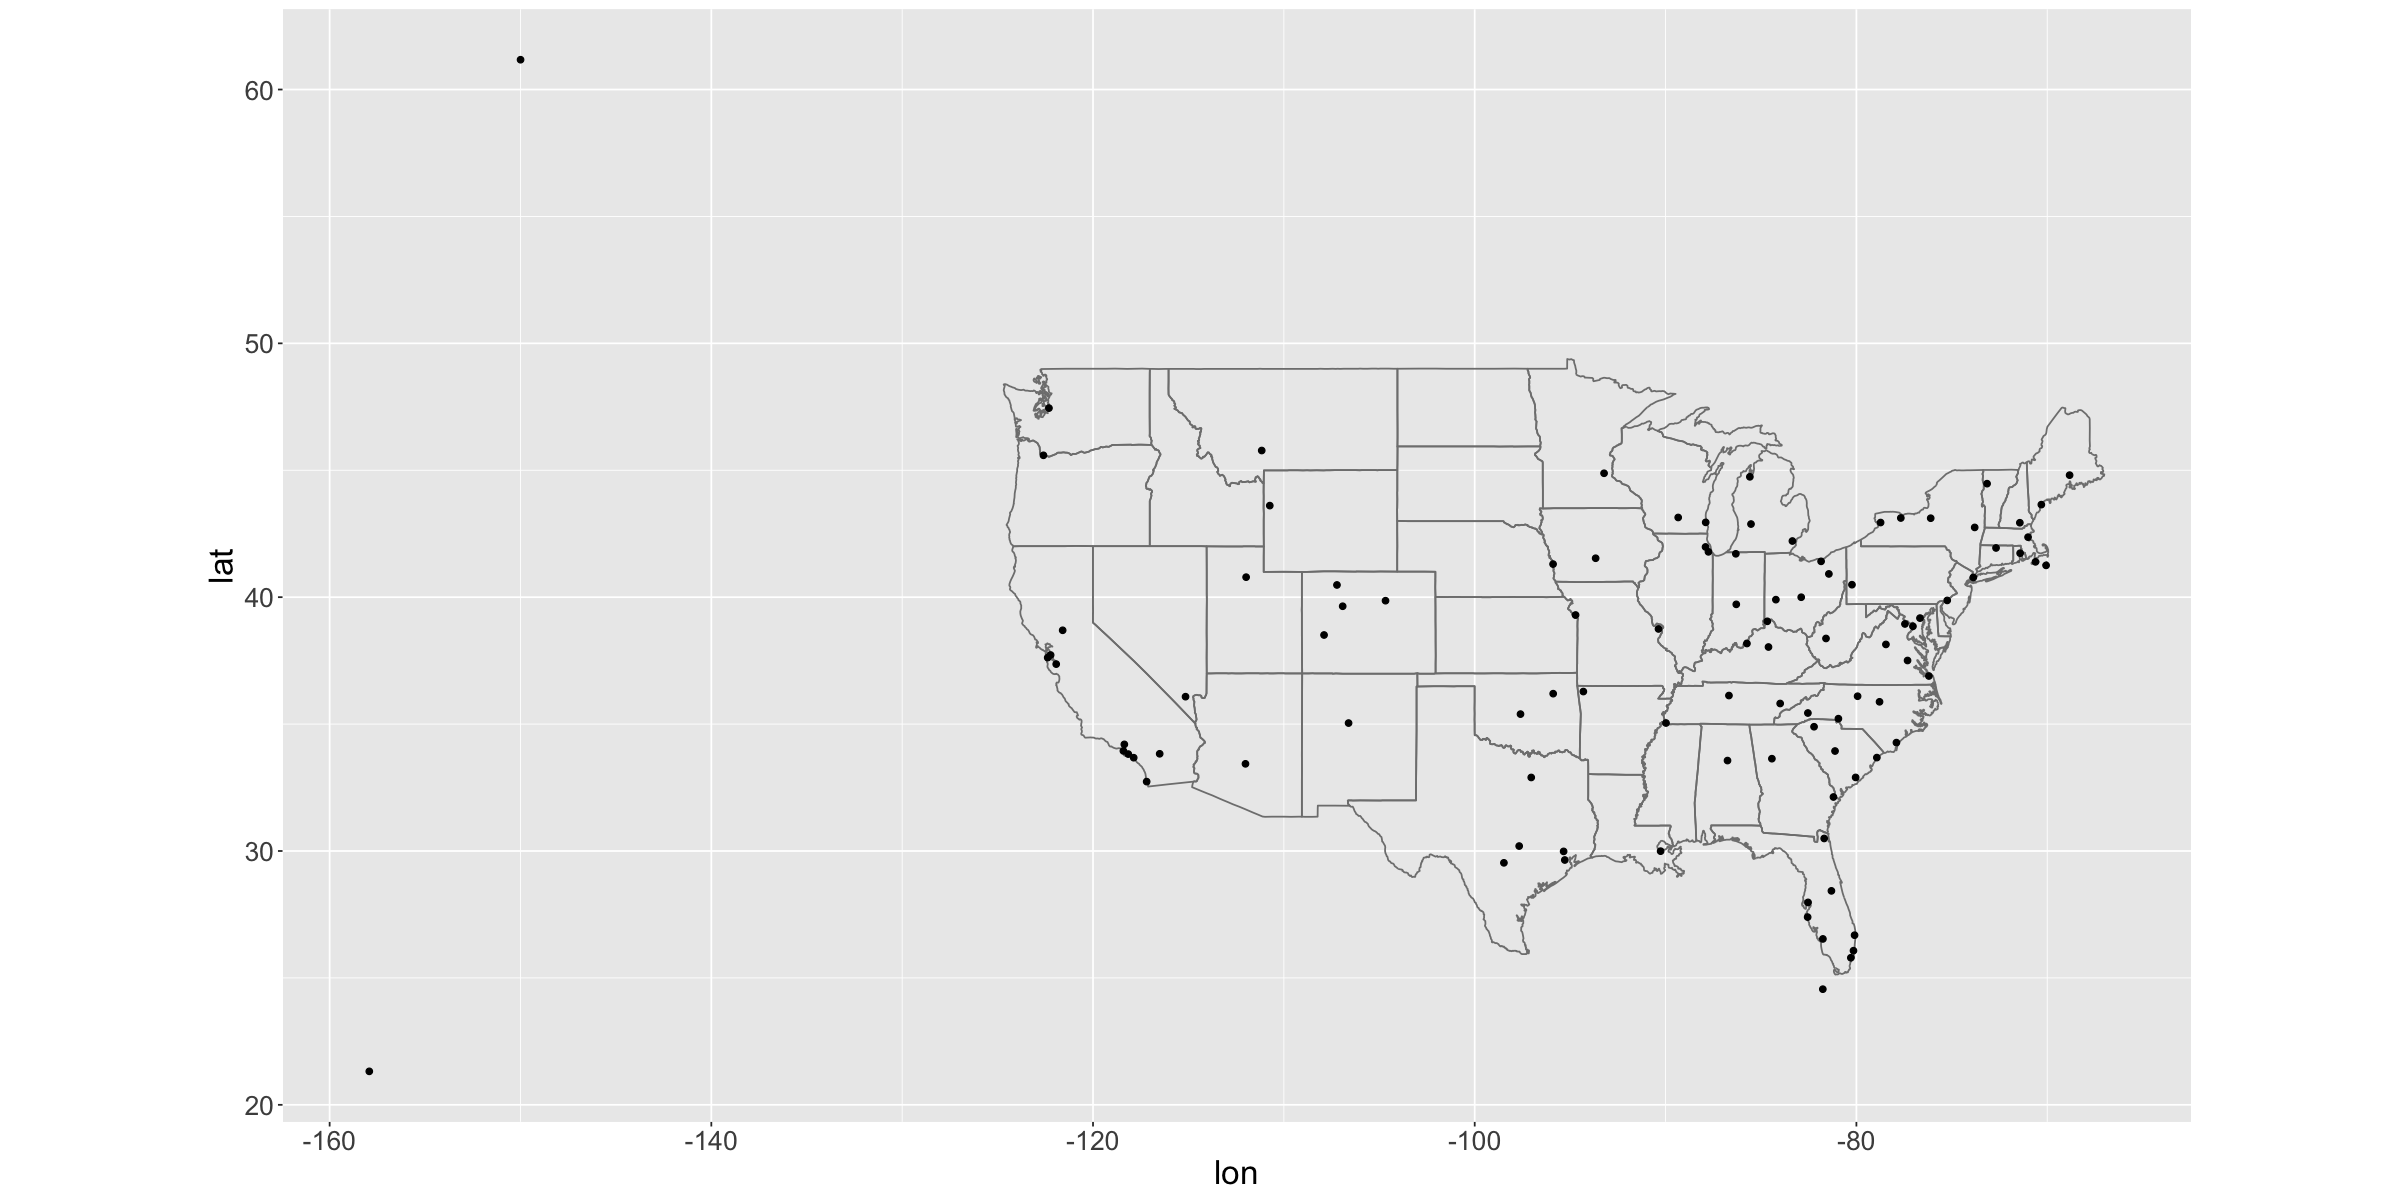

In [50]:
options(repr.plot.width=20, repr.plot.height=10)

airports %>%
  semi_join(y = flights, by = c('faa' = 'dest')) %>%
    ggplot(mapping = aes(x = lon, y = lat, size = )) +
      borders('state') +
      geom_point() +
      coord_quickmap() +
      theme(
        text=element_text(size=20)
      )

### Filtering Joins

#### Semi Join

In [71]:
x <- tribble(
  ~key, ~val_x,
     1,   'x1',
     2,   'x2',
     3,   'x3'
)

y <- tribble(
  ~key, ~val_y,
     1,   'y1',
     2,   'y2',
     4,   'y3'
)

semi_join(x = x, y = y)

Joining with `by = join_by(key)`


key val_x
1 1   x1   
2 2   x2

In [72]:
x <- tribble(
  ~key, ~val_x,
     1,   'x1',
     2,   'x2',
     2,   'x3',
     3,   'x4'
)

y <- tribble(
  ~key, ~val_y,
     1,   'y1',
     2,   'y2',
     2,   'y3',
     3,   'y4'
)

semi_join(x = x, y = y)

Joining with `by = join_by(key)`


key val_x
1 1   x1   
2 2   x2   
3 2   x3   
4 3   x4

In [73]:
top_dest <-
  flights %>%
    count(dest, sort = TRUE) %>%
      head(n = 10)
top_dest

flights %>%
  filter(dest %in% top_dest$dest) %>%
    head()

flights %>%
  semi_join(y = top_dest) %>%
    head()

dest n    
1  ORD  17283
2  ATL  17215
3  LAX  16174
4  BOS  15508
5  MCO  14082
6  CLT  14064
7  SFO  13331
8  FLL  12055
9  MIA  11728
10 DCA   9705

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 1     1   542      540             2        923      850           
2 2013 1     1   554      600            -6        812      837           
3 2013 1     1   554      558            -4        740      728           
4 2013 1     1   555      600            -5        913      854           
5 2013 1     1   557      600            -3        838      846           
6 2013 1     1   558      600            -2        753      745           
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1  33       AA      1141   N619AA  JFK    MIA  160      1089     5    40    
2 -25       DL       461   N668DN  LGA    ATL  116       762     6     0    
3  12       UA      1696   N39463  EWR    ORD  150       719     5    58    
4  19       B6       507   N516JB  EWR    FLL  158      1065     6     0    
5  -8       B6        79   N593JB  JFK    MCO  140       944     6     0    
6   8       AA       301   N3ALAA  LGA    ORD  138       733     6     0    
  time_hour          
1 2013-01-01 05:00:00
2 2013-01-01 06:00:00
3 2013-01-01 05:00:00
4 2013-01-01 06:00:00
5 2013-01-01 06:00:00
6 2013-01-01 06:00:00

Joining with `by = join_by(dest)`


year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 1     1   542      540             2        923      850           
2 2013 1     1   554      600            -6        812      837           
3 2013 1     1   554      558            -4        740      728           
4 2013 1     1   555      600            -5        913      854           
5 2013 1     1   557      600            -3        838      846           
6 2013 1     1   558      600            -2        753      745           
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1  33       AA      1141   N619AA  JFK    MIA  160      1089     5    40    
2 -25       DL       461   N668DN  LGA    ATL  116       762     6     0    
3  12       UA      1696   N39463  EWR    ORD  150       719     5    58    
4  19       B6       507   N516JB  EWR    FLL  158      1065     6     0    
5  -8       B6        79   N593JB  JFK    MCO  140       944     6     0    
6   8       AA       301   N3ALAA  LGA    ORD  138       733     6     0    
  time_hour          
1 2013-01-01 05:00:00
2 2013-01-01 06:00:00
3 2013-01-01 05:00:00
4 2013-01-01 06:00:00
5 2013-01-01 06:00:00
6 2013-01-01 06:00:00

#### Anti Join

In [74]:
x <- tribble(
  ~key, ~val_x,
     1,   'x1',
     2,   'x2',
     3,   'x3'
)

y <- tribble(
  ~key, ~val_y,
     1,   'y1',
     2,   'y2',
     4,   'y3'
)

anti_join(x = x, y = y)

Joining with `by = join_by(key)`


key val_x
1 3   x3

In [76]:
x <- tribble(
  ~key, ~val_x,
     1,   'x1',
     2,   'x2',
     2,   'x3',
     3,   'x4'
)

y <- tribble(
  ~key, ~val_y,
     1,   'y1',
     2,   'y2',
     2,   'y3',
     3,   'y4'
)

anti_join(x = x, y = y)

Joining with `by = join_by(key)`


key val_x

In [77]:
# anti joins are useful for diagnosing join mismatches
# for example, you might be interested to know that there are many `flights` that don't have a match in `planes`

flights %>%
  anti_join(y = planes, by = 'tailnum') %>%
    count(tailnum, sort = TRUE) %>%
      head()

tailnum n   
1 NA      2512
2 N725MQ   575
3 N722MQ   513
4 N723MQ   507
5 N713MQ   483
6 N735MQ   396

### 13.7 - Set operations

In [82]:
df1 <- tribble(
  ~x, ~y,
   1,  1,
   2,  1
)

df2 <- tribble(
  ~x, ~y,
   1,  1,
   1,  2
)

intersect(x = df1, y = df2)

union(x = df1, y = df2)

setdiff(x = df1, y = df2)

setdiff(x = df2, y = df1)

x y
1 1 1

x y
1 1 1
2 2 1
3 1 2

x y
1 2 1

x y
1 1 2

---

## 14 - Strings

In [5]:
string1      <- "This is a string"
string2      <- 'If I want to include a "quote" inside a string, I use single quotes'
double_quote <- "\"" # or '"'
single_quote <- '\'' # or "'"

# the printed representation of a string is not the same as the string itself
x <- c("\"", "\\")
x
writeLines(x)

[1] "\"" "\\"

"
\


In [9]:
?'"'

Quotes                  package:base                   R Documentation

_Q_u_o_t_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     Descriptions of the various uses of quoting in R.

_D_e_t_a_i_l_s:

     Three types of quotes are part of the syntax of R: single and
     double quotation marks and the backtick (or back quote, ‘`’).  In
     addition, backslash is used to escape the following character
     inside character constants.

_C_h_a_r_a_c_t_e_r _c_o_n_s_t_a_n_t_s:

     Single and double quotes delimit character constants.  They can be
     used interchangeably but double quotes are preferred (and
     character constants are printed using double quotes), so single
     quotes are normally only used to delimit character constants
     containing double quotes.

     Backslash is used to start an escape sequence inside character
     constants.  Escaping a character not in the following table is an
     error.

     Single quotes need to be escaped by 

In [11]:
x <- "\u00b5"
x

c('one', 'two', 'three')

[1] "µ"

[1] "one"   "two"   "three"

In [12]:
str_length(c('a', 'R for data science', NA))

[1]  1 18 NA

In [13]:
str_c('x', 'y', 'z')

[1] "xyz"

In [14]:
x <- c('abc', NA)

str_c('|-', x, '-|')

str_c('|-', str_replace_na(x), '-|')

[1] "|-abc-|" NA

[1] "|-abc-|" "|-NA-|"

In [15]:
str_c('prefix-', c('a', 'b', 'c'), '-suffix')

[1] "prefix-a-suffix" "prefix-b-suffix" "prefix-c-suffix"

In [16]:
name        <- 'Hadley'
time_of_day <- 'morning'
birthday    <- FALSE

str_c('Good ', time_of_day, ' ', name, if (birthday) ' and HAPPY BIRTHDAY', '.')

[1] "Good morning Hadley."

In [18]:
str_c(c('x', 'y', 'z'), collapse = ', ')

[1] "x, y, z"

In [20]:
x <- c('Apple', 'Banana', 'Pear')

str_sub(x,  1,  3)
str_sub(x, -3, -1)
str_sub(x,  1, 10)

[1] "App" "Ban" "Pea"

[1] "ple" "ana" "ear"

[1] "Apple"  "Banana" "Pear"

In [24]:
str_sub(x, 1, 1) <- str_to_lower(str_sub(x, 1, 1))

x

[1] "apple"  "banana" "pear"

In [26]:
str_to_upper(c('i', 'ı'))
str_to_upper(c('i', 'ı'), locale = 'tr')

[1] "I" "I"

[1] "İ" "I"

In [27]:
x <- c('apple', 'eggplant', 'banana')

str_sort(x, locale = 'en')  # English
str_sort(x, locale = 'haw') # Hawaiian

[1] "apple"    "banana"   "eggplant"

[1] "apple"    "eggplant" "banana"

In [28]:
x <- c('apple', 'banana', 'pear')

str_view(x, 'an')

[2] │ b<an><an>a

In [29]:
str_view(x, '.a.')

[2] │ <ban>ana
[3] │ p<ear>

In [30]:
dot <- '\\.'

dot

writeLines(dot)

[1] "\\."

\.


In [31]:
str_view(c('abc', 'a.c', 'bef'), 'a\\.c')

[2] │ <a.c>

In [32]:
x <- 'a\\b'

x

writeLines(x)

str_view(x, '\\\\')

[1] "a\\b"

a\b


[1] │ a<\>b

In [ ]:
x <- 

---

## 16 - Dates and times

In [9]:
today()

[1] "2023-06-19"

In [10]:
now()

[1] "2023-06-19 21:40:12 EDT"

In [20]:
lubridate::ymd('2017-01-31')
lubridate::mdy('January 31st, 2017')
lubridate::dmy('31-Jan-2017')
lubridate::ymd(20170131)
lubridate::ymd_hms('2017-01-31 20:11:59')
lubridate::mdy_hm('01/31/2017 08:01')
lubridate::ymd(20170131, tz = 'UTC')

[1] "2017-01-31"

[1] "2017-01-31"

[1] "2017-01-31"

[1] "2017-01-31"

[1] "2017-01-31 20:11:59 UTC"

[1] "2017-01-31 08:01:00 UTC"

[1] "2017-01-31 UTC"

---

## 19 - Functions

In [43]:
df <- tibble::tibble(
  a = rnorm(10),
  b = rnorm(10),
  c = rnorm(10),
  d = rnorm(10),
)
df$a <- (df$a - min(df$a, na.rm = TRUE)) / (max(df$a, na.rm = TRUE) - min(df$a, na.rm = TRUE))
df$b <- (df$b - min(df$b, na.rm = TRUE)) / (max(df$d, na.rm = TRUE) - min(df$b, na.rm = TRUE))
df$c <- (df$c - min(df$c, na.rm = TRUE)) / (max(df$c, na.rm = TRUE) - min(df$c, na.rm = TRUE))
df$d <- (df$d - min(df$d, na.rm = TRUE)) / (max(df$d, na.rm = TRUE) - min(df$d, na.rm = TRUE))
df

a         b         c          d         
1  0.2603453 0.0000000 0.52291366 0.17190835
2  0.4428665 0.3911715 0.00000000 0.34864602
3  0.7679751 0.2958880 0.61301233 0.00000000
4  0.0000000 0.3256557 0.03846392 1.00000000
5  0.9597766 0.3409009 0.30398213 0.38970973
6  0.7516023 0.2671197 1.00000000 0.14085417
7  1.0000000 0.4352529 0.35195509 0.08903446
8  0.3199440 0.5370480 0.57422199 0.77900010
9  0.7130083 0.0714432 0.37854517 0.07351166
10 0.1629208 0.1235444 0.53272103 0.50560502

In [51]:
rescale01 <- function (x) {
  rng <- range(x, na.rm = TRUE)
  (x - rng[1]) / (rng[2] - rng[1])
}

rescale01(c(0, 5, 10))
rescale01(c(-10, 0, 10))
rescale01(c(1, 2, 3, NA, 5))

[1] 0.0 0.5 1.0

[1] 0.0 0.5 1.0

[1] 0.00 0.25 0.50   NA 1.00

In [50]:
df <- tibble::tibble(
  a = rnorm(10),
  b = rnorm(10),
  c = rnorm(10),
  d = rnorm(10),
)
df$a <- rescale01(df$a)
df$b <- rescale01(df$b)
df$c <- rescale01(df$c)
df$d <- rescale01(df$d)
df

a         b         c          d        
1  0.5620421 0.4772677 0.00000000 0.2779846
2  0.0000000 0.1481486 0.20080052 0.2611846
3  0.3120153 0.8396613 0.04548743 0.4313317
4  0.5319523 0.6228401 0.47050875 0.9074133
5  0.4530802 0.3482687 0.33315823 0.1256405
6  0.4333381 1.0000000 0.33140720 0.5639065
7  0.4721171 0.5706066 0.14447456 0.7455952
8  0.1415588 0.0000000 0.15490717 1.0000000
9  1.0000000 0.3948759 1.00000000 0.0000000
10 0.3231058 0.6069666 0.73818349 0.9683428

In [52]:
x <- c(1:10, Inf)

rescale01(x)

[1]   0   0   0   0   0   0   0   0   0   0 NaN

In [53]:
rescale01 <- function (x) {
  rng <- range(x, na.rm = TRUE, finite = TRUE)
  (x - rng[1]) / (rng[2] - rng[1])
}

x <- c(1:10, Inf)

rescale01(x)

[1] 0.0000000 0.1111111 0.2222222 0.3333333 0.4444444 0.5555556 0.6666667
 [8] 0.7777778 0.8888889 1.0000000       Inf

### Exercise 19.2.1

#### 1

[1] Why is `TRUE` not a parameter to `rescale01`? What would happen if `x` contained a single missing value, and `na.rm` was `FALSE`?

In [66]:
rescale01 <- function (x, remove_missing_data = TRUE, finite_data = TRUE) {
  rng <- range(x, na.rm = remove_missing_data, finite = finite_data)
  (x - rng[1]) / (rng[2] - rng[1])
}

rescale01(c(0, 5, 10),       FALSE, FALSE)
rescale01(c(-10, 0, 10),     FALSE, FALSE)
rescale01(c(1, 2, 3, NA, 5), FALSE, FALSE)
rescale01(c(1:10, Inf),      FALSE, FALSE)

rescale01(c(0, 5, 10),       FALSE, TRUE)
rescale01(c(-10, 0, 10),     FALSE, TRUE)
rescale01(c(1, 2, 3, NA, 5), FALSE, TRUE)
rescale01(c(1:10, Inf),      FALSE, TRUE)

rescale01(c(0, 5, 10),       TRUE, FALSE)
rescale01(c(-10, 0, 10),     TRUE, FALSE)
rescale01(c(1, 2, 3, NA, 5), TRUE, FALSE)
rescale01(c(1:10, Inf),      TRUE, FALSE)

rescale01(c(0, 5, 10),       TRUE, TRUE)
rescale01(c(-10, 0, 10),     TRUE, TRUE)
rescale01(c(1, 2, 3, NA, 5), TRUE, TRUE)
rescale01(c(1:10, Inf),      TRUE, TRUE)

[1] 0.0 0.5 1.0

[1] 0.0 0.5 1.0

[1] NA NA NA NA NA

[1]   0   0   0   0   0   0   0   0   0   0 NaN

[1] 0.0 0.5 1.0

[1] 0.0 0.5 1.0

[1] 0.00 0.25 0.50   NA 1.00

[1] 0.0000000 0.1111111 0.2222222 0.3333333 0.4444444 0.5555556 0.6666667
 [8] 0.7777778 0.8888889 1.0000000       Inf

[1] 0.0 0.5 1.0

[1] 0.0 0.5 1.0

[1] 0.00 0.25 0.50   NA 1.00

[1]   0   0   0   0   0   0   0   0   0   0 NaN

[1] 0.0 0.5 1.0

[1] 0.0 0.5 1.0

[1] 0.00 0.25 0.50   NA 1.00

[1] 0.0000000 0.1111111 0.2222222 0.3333333 0.4444444 0.5555556 0.6666667
 [8] 0.7777778 0.8888889 1.0000000       Inf

#### 2

[2] In the second variant of `rescale01()`, infinite values are left unchanged. Rewrite `rescale01()` so that `-Inf` is mapped to 0, and `Inf` is mapped to 1.

In [84]:
rescale01 <- function (x) {
  rng <- range(x, na.rm = TRUE, finite = TRUE)
  y   <- (x - rng[1]) / (rng[2] - rng[1])
  y[y == -Inf] <- 0
  y[y ==  Inf] <- 1
  y
}

x <- c(1:10, Inf)

rescale01(x)

[1] 0.0000000 0.1111111 0.2222222 0.3333333 0.4444444 0.5555556 0.6666667
 [8] 0.7777778 0.8888889 1.0000000 1.0000000

#### 3

[3] Practice turning the following code snippets into functions. Think about what each function does. What would you call it? How many arguments does it need? Can you rewrite it to be more expressive or less duplicative?

In [106]:
x <- c(1:10, NA, NA)
x

# proportion of null values
prop_na <- function (x) {
  mean(is.na(x))
}

prop_na(x)

[1]  1  2  3  4  5  6  7  8  9 10 NA NA

[1] 0.1666667

In [107]:
x <- c(1:10, NA, NA)
x

# standardization, sum to unity
sum_to_one <- function (x, na.rm = FALSE) {
  x / sum(x, na.rm = na.rm)
}

sum_to_one(x)
sum_to_one(x, TRUE)

[1]  1  2  3  4  5  6  7  8  9 10 NA NA

[1] NA NA NA NA NA NA NA NA NA NA NA NA

[1] 0.01818182 0.03636364 0.05454545 0.07272727 0.09090909 0.10909091
 [7] 0.12727273 0.14545455 0.16363636 0.18181818         NA         NA

In [110]:
# coefficient of variation
coef_variation <- function (x, na.rm = FALSE) {
  sd(x, na.rm = na.rm) / mean(x, na.rm = na.rm)
}

x <- c(1:10, NA, NA)

coef_variation(x)
coef_variation(x, TRUE)

[1]  1  2  3  4  5  6  7  8  9 10 NA NA

[1] NA

[1] 0.5504819

#### 4

[4] Write your own functions to compute the variance and skewness of a numeric vector.

$
\begin{aligned}
\text{Var}(x)
= \frac{1}{n - 1} \sum_{i=1}^n (x_i - \bar{x})^2
\end{aligned}
$

where

$
\begin{aligned}
\bar{x}
= \frac{1}{n} \sum_i^n x_i
\end{aligned}
$

$
\begin{aligned}
\text{Skew}(x)
= \frac{\frac{1}{n - 2} (\sum_{i=1}^n (x_i - \bar{x})^3)}{\text{Var}(x)^\frac{3}{2}}
\end{aligned}
$

In [113]:
variance <- function (x, na.rm = FALSE) {
  n      <- length(x)
  m      <- mean(x, na.rm = na.rm)
  sq_err <- (x - m)^2
  sum(sq_err) / (n - 1)
}

var(1:10)
variance(1:10)

[1] 9.166667

[1] 9.166667

In [115]:
skewness <- function (x, na.rm = FALSE) {
  n <- length(x)
  m <- mean(x, na.rm = na.rm)
  v <- var(x,  na.rm = na.rm)
  (sum((x - m)^3) / (n - 2)) / v^(3/2)
}

skewness(c(1, 2, 3, 100))

[1] 1.498751

#### 5

[5] Write `both_na()`, a function that takes two vectors of the same length and returns the number of positions that have an `NA` in both vectors.

In [1]:
both_na <- function (x, y) {
  sum(is.na(x) & is.na(y))
}

In [2]:
x <- c(NA, NA,  1, 2)
y <- c(NA,  1, NA, 2)

both_na(x, y)

[1] 1

In [3]:
x <- c(NA, NA,  1, 2, NA, NA, 1)
y <- c(NA,  1, NA, 2, NA, NA, 1)

both_na(x, y)

[1] 3

#### 6

[6] What do the following functions do? Why are they useful even though they are so short?

```r
is_directory <- function (x) file.info(x)$isdir
is_readable  <- function (x) file.access(x, 4) == 0
```

In [4]:
# The function `is_directory()` checks whether the path in `x` is a directory.
is_directory <- function (x) file.info(x)$isdir

In [5]:
# The function `is_readable()` checks whether the path in `x` is readable (i.e., whether the file exists and the user has permission to open it).
is_readable <- function (x) file.access(x, 4) == 0

#### 7

[7] Read the [complete lyrics](https://en.wikipedia.org/wiki/Little_Bunny_Foo_Foo) to "Little Bunny Foo Foo". There's a lot of duplication in this song. Extend the initial piping example to recreate the complete song, and use functions to reduce the duplication.

### 19.4 Conditional execution

In [10]:
# Here's a simple function that uses an `if` statement.
# The goal of this function is to return a logical vector describing whether or not each element of a vector is named.
# This function takes advantage of the standard return rule: a function returns the last value that it computed. Here that is either one of the two branches of the `if` statement.

has_name <- function (x) {
  nms <- names(x)
  if (is.null(nms)) {
    rep(FALSE, length(x))
  } else {
    !is.na(nms) & nms != ""
  }
}

### 19.5 Function arguments

In [16]:
# Compute confidence interval around mean using normal approximation

mean_ci <- function (x, conf = 0.95) {
  se    <- sd(x) / sqrt(length(x))
  alpha <- 1 - conf
  mean(x) + se * qnorm(c(alpha / 2, 1 - alpha / 2))
}

x <- runif(100)

mean_ci(x)
mean_ci(x, conf = 0.99)

[1] 0.4600979 0.5741816

[1] 0.4421740 0.5921055

#### 19.5.2 Checking values

In [18]:
# weighted mean summary statistic
wt_mean <- function (x, w) {
  sum(x * w) / sum(w)
}

# weighted variance summary statistic
wt_var  <- function (x, w) {
  mu <- wt_mean(x, w)
  sum(w * (x - mu)^2) / sum(w)
}

# weighted standard deviation summary statistic
wt_sd   <- function (x, w) {
  sqrt(wt_var(x, w))
}

In [19]:
# What happens if `x` and `w` are not the same length?
#   In this case, we don't get an error because of R's recycling rules.

x <- 1:6
w <- 1:3

x
w

wt_mean(x, w)

[1] 1 2 3 4 5 6

[1] 1 2 3

[1] 7.666667

In [20]:
# weighted mean summary statistic
wt_mean <- function (x, w) {
  if (length(x) != length(w)) {
    stop("`x` and `w` must be the same length", call. = FALSE)
  }
  sum(x * w) / sum(w)
}

# weighted variance summary statistic
wt_var  <- function (x, w) {
  mu <- wt_mean(x, w)
  sum(w * (x - mu)^2) / sum(w)
}

# weighted standard deviation summary statistic
wt_sd   <- function (x, w) {
  sqrt(wt_var(x, w))
}

---

## 20 - Vectors

In [52]:
letters

[1] "a" "b" "c" "d" "e" "f" "g" "h" "i" "j" "k" "l" "m" "n" "o" "p" "q" "r" "s"
[20] "t" "u" "v" "w" "x" "y" "z"

In [53]:
typeof(letters)

[1] "character"

In [54]:
1:10

[1]  1  2  3  4  5  6  7  8  9 10

In [55]:
typeof(1:10)

[1] "integer"

In [57]:
x <- list('a', 'b', 1:10)
x

[[1]]
[1] "a"

[[2]]
[1] "b"

[[3]]
 [1]  1  2  3  4  5  6  7  8  9 10

In [58]:
length(x)

[1] 3

### Logical

In [59]:
1:10 %% 3 == 0

[1] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE

In [60]:
c(TRUE, TRUE, FALSE, NA)

[1]  TRUE  TRUE FALSE    NA

### Numeric

In [61]:
typeof(1)

[1] "double"

In [62]:
typeof(1L)

[1] "integer"

In [63]:
1.5L

[1] 1.5

In [72]:
x <- sqrt(x = 2) ^ 2
x
x - 2
x == 2
near(x = x, y = 2)

[1] 2

[1] 4.440892e-16

[1] FALSE

[1] TRUE

In [73]:
c(-1, 0, 1) / 0

[1] -Inf  NaN  Inf

In [74]:
is.finite(0)
is.finite(Inf)
is.finite(-Inf)
is.finite(NA)
is.finite(NaN)

[1] TRUE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

In [75]:
is.infinite(0)
is.infinite(Inf)
is.infinite(-Inf)
is.infinite(NA)
is.infinite(NaN)

[1] FALSE

[1] TRUE

[1] TRUE

[1] FALSE

[1] FALSE

In [77]:
is.na(0)
is.na(Inf)
is.na(-Inf)
is.na(NA)
is.na(NaN)

[1] FALSE

[1] FALSE

[1] FALSE

[1] TRUE

[1] TRUE

In [76]:
is.nan(0)
is.nan(Inf)
is.nan(-Inf)
is.nan(NA)
is.nan(NaN)

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] TRUE

### Character

In [84]:
# `y` doesn't take up 1000x as much memory as `x`, because each element of `y` is just a pointer to that same string
# a pointer is 8 bytes, so 1000 pointers to a 152 B string is 8 x 1000 + 152 = 8.14 kB

x <- 'This is a reasonably long string.'
pryr::object_size(x)

y <- rep(x, 1000)
pryr::object_size(y)

152 B

8.14 kB

### Missing values

In [87]:
# each type of atomic vector has its own missing value

NA            # logical
NA_integer_   # integer
NA_real_      # double
NA_character_ # character

[1] NA

[1] NA

[1] NA

[1] NA

### 20.4 - Using atomic vectors

#### 20.4.1 - Coercion

In [88]:
x <- sample(20, 100, replace = TRUE)
x

[1] 16 20 11  5 18 19  6 17  2 12 12 12  5  9 17 18  9 19  3 11  4  3  1 12 11
 [26]  7  6 13 10 14 15  9  4  2  9  7 20 11 16  9 14 18  9 19 16 19  7 16  4 18
 [51] 16 14  1 14  4 10  6  5 17 11  7  9 17 15  2 18  4 11  9  6  4 12 11  9 19
 [76]  8 13  5  6  4  6  5  2 20  4 18 11  2 10 16 19  4 11 15  3 20 19 13 10  9

In [89]:
y <- x > 10
y

[1]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE
 [13] FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE
 [25]  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
 [37]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE
 [49] FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE
 [61] FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE
 [73]  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [85] FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE
 [97]  TRUE  TRUE FALSE FALSE

In [90]:
# How many are greater than 10?

sum(y)

[1] 51

In [91]:
# What proportion are greater than 10?

mean(y)

[1] 0.51

In [92]:
typeof(c(TRUE, 1L))

[1] "integer"

In [93]:
typeof(c(1L, 1.5))

[1] "double"

In [94]:
typeof(c(1.5, 'a'))

[1] "character"

#### 20.4.2 - Test functions

In [105]:
purrr::is_logical(TRUE)
purrr::is_logical(1L)
purrr::is_logical(1.5)
purrr::is_logical('a')

[1] TRUE

[1] FALSE

[1] FALSE

[1] FALSE

In [108]:
purrr::is_integer(TRUE)
purrr::is_integer(1L)
purrr::is_integer(1.5)
purrr::is_integer('a')

[1] FALSE

[1] TRUE

[1] FALSE

[1] FALSE

In [109]:
purrr::is_double(TRUE)
purrr::is_double(1L)
purrr::is_double(1.5)
purrr::is_double('a')

[1] FALSE

[1] FALSE

[1] TRUE

[1] FALSE

In [111]:
purrr::is_character(TRUE)
purrr::is_character(1L)
purrr::is_character(1.5)
purrr::is_character('a')

[1] FALSE

[1] FALSE

[1] FALSE

[1] TRUE

In [112]:
purrr::is_atomic(TRUE)
purrr::is_atomic(1L)
purrr::is_atomic(1.5)
purrr::is_atomic('a')

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

In [113]:
purrr::is_list(TRUE)
purrr::is_list(1L)
purrr::is_list(1.5)
purrr::is_list('a')

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

In [114]:
purrr::is_vector(TRUE)
purrr::is_vector(1L)
purrr::is_vector(1.5)
purrr::is_vector('a')

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

In [117]:
sample(x = 10) + 100

[1] 109 106 102 108 110 101 103 105 104 107

In [122]:
runif(n = 10) > 0.5

[1]  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE

In [124]:
1:10 + 1:2

[1]  2  4  4  6  6  8  8 10 10 12

In [125]:
1:10 + 1:3

Warning message in 1:10 + 1:3:
"longitud de objeto mayor no es m'ultiplo de la longitud de uno menor"


[1]  2  4  6  5  7  9  8 10 12 11

In [127]:
tibble(x = 1:4, y = 1:2)

ERROR: [1m[33mError[39m in `tibble()`:[22m
[1m[22m[33m![39m Tibble columns must have compatible sizes.
[36m*[39m Size 4: Existing data.
[36m*[39m Size 2: Column `y`.
[36mi[39m Only values of size one are recycled.


In [129]:
tibble(x = 1:4, y = rep(1:2, 2))

x y
1 1 1
2 2 2
3 3 1
4 4 2

In [130]:
tibble(x = 1:4, y = rep(1:2, each = 2))

x y
1 1 1
2 2 1
3 3 2
4 4 2

#### 20.4.4 - Naming vectors

In [131]:
c(x = 1, y = 2, z = 4)

x y z 
1 2 4

In [132]:
purrr::set_names(1:3, c('a', 'b', 'c'))

a b c 
1 2 3

#### 20.4.5 - Subsetting

In [137]:
x <- c('one', 'two', 'three', 'four', 'five')
x
x[c(3,2,5)]
x[c(1,1,5,5,5,2)]
x[c(-1,-3,-5)]
x[0]

[1] "one"   "two"   "three" "four"  "five"

[1] "three" "two"   "five"

[1] "one"  "one"  "five" "five" "five" "two"

[1] "two"  "four"

character(0)

In [140]:
x <- c(10, 3, NA, 5, 8, 1, NA)
x
x[!is.na(x)]
x[x %% 2 == 0]

[1] 10  3 NA  5  8  1 NA

[1] 10  3  5  8  1

[1] 10 NA  8 NA

In [142]:
x <- c(abc = 1, def = 2, xyz = 5)
x
x[c('xyz', 'def')]

abc def xyz 
  1   2   5

xyz def 
  5   2

### 20.5 - Recursive vectors (lists)

In [144]:
x <- list(1, 2, 3)
x

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 3

In [146]:
str(object = x)

List of 3
 $ : num 1
 $ : num 2
 $ : num 3


In [147]:
x_named <- list(a = 1, b = 2, c = 3)
x_named

$a
[1] 1

$b
[1] 2

$c
[1] 3

In [148]:
str(object = x_named)

List of 3
 $ a: num 1
 $ b: num 2
 $ c: num 3


In [149]:
y <- list('a', 1L, 1.5, TRUE)
y

[[1]]
[1] "a"

[[2]]
[1] 1

[[3]]
[1] 1.5

[[4]]
[1] TRUE

In [150]:
str(object = y)

List of 4
 $ : chr "a"
 $ : int 1
 $ : num 1.5
 $ : logi TRUE


#### 20.5.1 - Visualizing lists

In [152]:
x1 <- list(c(1, 2), c(3, 4))
x2 <- list(list(1, 2), list(3, 4))
x3 <- list(1, list(2, list(3)))

x1
x2
x3

str(x1)
str(x2)
str(x3)

[[1]]
[1] 1 2

[[2]]
[1] 3 4

[[1]]
[[1]][[1]]
[1] 1

[[1]][[2]]
[1] 2


[[2]]
[[2]][[1]]
[1] 3

[[2]][[2]]
[1] 4

[[1]]
[1] 1

[[2]]
[[2]][[1]]
[1] 2

[[2]][[2]]
[[2]][[2]][[1]]
[1] 3

List of 2
 $ : num [1:2] 1 2
 $ : num [1:2] 3 4
List of 2
 $ :List of 2
  ..$ : num 1
  ..$ : num 2
 $ :List of 2
  ..$ : num 3
  ..$ : num 4
List of 2
 $ : num 1
 $ :List of 2
  ..$ : num 2
  ..$ :List of 1
  .. ..$ : num 3


#### 20.5.2 - Subsetting

In [161]:
a <- list(a = 1:3, b = 'a string', c = pi, d = list(-1, -5))
a

$a
[1] 1 2 3

$b
[1] "a string"

$c
[1] 3.141593

$d
$d[[1]]
[1] -1

$d[[2]]
[1] -5

In [162]:
a[1:2]

$a
[1] 1 2 3

$b
[1] "a string"

In [163]:
a[4]

$d
$d[[1]]
[1] -1

$d[[2]]
[1] -5

In [158]:
a[[4]]

[[1]]
[1] -1

[[2]]
[1] -5

In [164]:
a[[4]][1]

[[1]]
[1] -1

In [165]:
a[[4]][[1]]

[1] -1

In [159]:
a$a

[1] 1 2 3

In [160]:
a[['a']]

[1] 1 2 3

### 20.6 - Attributes

In [168]:
x <- 1:10

attr(x, 'greeting')
attr(x, 'greeting') <- 'Hi!'
attr(x, 'farewell') <- 'Bye!'
attributes(x)

NULL

$greeting
[1] "Hi!"

$farewell
[1] "Bye!"

In [169]:
# the call to "UseMethod" means that this is a generic function
# and it will call a specific method based on the class of the first argument

as.Date

function (x, ...) 
UseMethod("as.Date")
<bytecode: 0x1073501c8>
<environment: namespace:base>

In [171]:
# list all the methods for a generic function with `methods()`

methods(generic.function = 'as.Date')

[1] as.Date.POSIXct*    as.Date.POSIXlt*    as.Date.character* 
[4] as.Date.default*    as.Date.factor*     as.Date.numeric*   
[7] as.Date.vctrs_sclr* as.Date.vctrs_vctr*
see '?methods' for accessing help and source code

In [175]:
# see the specific implementation of a method with `getS3method()`

getS3method(f = 'as.Date', class = 'default')
getS3method(f = 'as.Date', class = 'numeric')

function (x, ...) 
{
    if (inherits(x, "Date")) 
        x
    else if (is.null(x)) 
        .Date(numeric())
    else if (is.logical(x) && all(is.na(x))) 
        .Date(as.numeric(x))
    else stop(gettextf("do not know how to convert '%s' to class %s", 
        deparse1(substitute(x)), dQuote("Date")), domain = NA)
}
<bytecode: 0x17be61600>
<environment: namespace:base>

function (x, origin, ...) 
if (missing(origin)) .Date(x) else as.Date(origin, ...) + x
<bytecode: 0x11f0df250>
<environment: namespace:base>

### 20.7 - Augmented vectors

#### 20.7.1 - Factors

In [176]:
x <- factor(c('ab', 'cd', 'ab'), levels = c('ab', 'cd', 'ef'))
x

[1] ab cd ab
Levels: ab cd ef

In [177]:
typeof(x)

[1] "integer"

In [178]:
attributes(x)

$levels
[1] "ab" "cd" "ef"

$class
[1] "factor"

#### 20.7.2 Dates and datetimes

In [190]:
x <- as.Date('1971-01-01')
x

unclass(x = x)
typeof(x = x)
attributes(x = x)

[1] "1971-01-01"

[1] 365

[1] "double"

$class
[1] "Date"

In [186]:
x <- lubridate::ymd_hm('1970-01-01 01:00')
x

[1] "1970-01-01 01:00:00 UTC"

---

## Bibliography

Wickham, Hadley; Mine Çetinkaya-Rundel; & Garrett Grolemund. _R for Data Science: Import, Tidy, Transform, Visualize, and Model Data_. 1st Ed. O'Reilly. [Home](https://r4ds.had.co.nz/).

---